In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
from matplotlib.animation import FuncAnimation, PillowWriter
import os
import imageio
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
from copy import copy

In [2]:
nRacesWomen = 20
results = pd.read_excel('../../data/WC2023-Results.xlsx', index_col = 3, sheet_name='GenF', header = [1, 2])
#results.reset_index()
results.columns = list(map(lambda x: x[0] + '_' + x[1], list(results.columns)))
results.reset_index()
natDict = dict(zip(results.index, results['CLASSIFICA_NAZ.']))
columnsErase = list(filter(lambda x: x.find('Unnamed') != -1, list(results.columns)))
columnsErase += ['HOL_MS.1', 'HOL_PU', 'CLASSIFICA_NAZ.'] # Eliminating cancelled race, unused column and nationality
results = results.drop(columns = columnsErase)
results = results.iloc[:,:nRacesWomen]
results = results.fillna(0)
transposedResults = results.transpose()
transposedResults = transposedResults.astype(int)
resultsCumulative = transposedResults.cumsum(axis = 0)
resultsCumulative.index = resultsCumulative.index.set_names(['race'])
resultsCumulative.head()

,index,Unnamed: 0_level_0_Unnamed: 0_level_1,Unnamed: 1_level_0_POS,Unnamed: 2_level_0_TOT,CLASSIFICA_NAZ.,KON_IN,KON_SP,KON_PU,HOC_SP,HOC_PU,...,RUH_MS.1,ANT_SP.1,ANT_PU.1,NMĚ_SP.1,NMĚ_PU.1,ÖST_IN.1,ÖST_MS.1,HOL_SP.1,HOL_PU.1,HOL_MS.2
0,AKHATOVA L.,NaN,88,0,KAZ,0.0,0.0,NaN,0.0,NaN,...,NaN,89.0,NaN,88.0,NaN,84.0,NaN,93.0,NaN,NaN
1,ANDERSSON S.,NaN,78,10,SWE,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN
2,ARNEKLEIV J.,NaN,60,49,NOR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.0,24.0,33.0,NaN,NaN
3,AUCHENTALLER H.,NaN,57,61,ITA,NaN,NaN,NaN,NaN,NaN,...,NaN,42.0,33.0,57.0,30.0,17.0,22.0,85.0,NaN,NaN
4,AVVAKUMOVA E.,NaN,78,10,KOR,NaN,NaN,NaN,0.0,0.0,...,NaN,51.0,53.0,47.0,57.0,35.0,NaN,77.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,YEGOROVA P.,NaN,88,0,KAZ,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,ZDOUC D.,NaN,38,136,AUT,8.0,0.0,8.0,7.0,0.0,...,NaN,26.0,27.0,56.0,45.0,18.0,NaN,40.0,NaN,NaN
142,ZDRAVKOVA M.,NaN,88,0,BUL,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,90.0,NaN,93.0,NaN,NaN,NaN,NaN
143,ZORC K.,NaN,88,0,SLO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,0,0,0,0,0,5,34,0,0,0,...,19,50,15,0,3,0,8,0,0,0
KON_SP,0,0,0,0,0,5,49,13,0,0,...,19,80,60,0,35,0,8,0,0,0
KON_PU,0,0,0,0,0,5,60,23,0,0,...,19,114,84,0,110,0,16,0,0,0
HOC_SP,0,0,0,0,0,5,72,43,0,0,...,19,125,103,0,146,0,23,0,0,0
HOC_PU,0,0,0,0,0,5,103,43,0,0,...,19,152,129,0,174,0,23,0,0,0


<BarContainer object of 145 artists>

(139.5, 145.5)

<BarContainer object of 145 artists>

(139.5, 145.5)

<BarContainer object of 145 artists>

(139.5, 145.5)

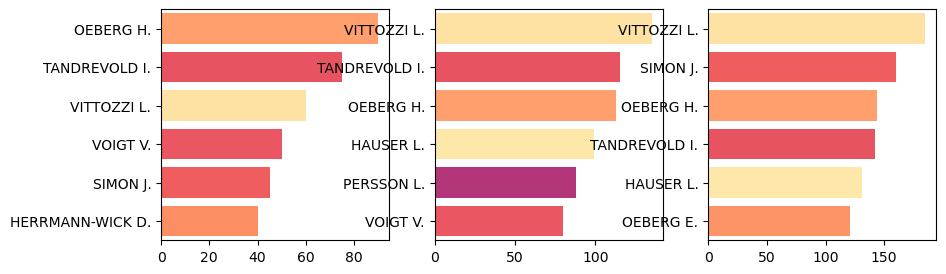

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
colors = plt.cm.magma(np.random.uniform(0, 1, len(list(resultsCumulative.columns))))
races = list(resultsCumulative.index)


for ax, race in zip(axes.flatten(), races):
    tmp = resultsCumulative.loc[race]
    y = resultsCumulative.loc[race].rank(method = 'first').values
    width = tmp.values
    ax.barh(y = y, width = width, color = colors, tick_label = tmp.index)
    ax.set_ylim(bottom = len(y) - 5.5, top = len(y) + 0.5)
plt.show()

In [4]:
intermediateSteps = 25
dfTransition = resultsCumulative.copy()
dfTransition = dfTransition.reset_index()
dfTransition.index = dfTransition.index * intermediateSteps
lastIdx = dfTransition.index[-1] + 1
dfExpanded = dfTransition.reindex(range(lastIdx))
dfExpanded['race'] = dfExpanded['race'].fillna(method='ffill')
dfExpanded = dfExpanded.set_index('race')
dfExpanded.head()

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,0.0,0.0,0.0,0.0,0.0,5.0,34.0,0.0,0.0,0.0,...,19.0,50.0,15.0,0.0,3.0,0.0,8.0,0.0,0.0,0.0
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfRankExpanded = dfExpanded.rank(axis = 1, method = 'first')
dfRankExpanded.head()

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,1.0,2.0,3.0,4.0,5.0,110.0,138.0,6.0,7.0,8.0,...,124.0,142.0,120.0,101.0,108.0,102.0,113.0,103.0,104.0,105.0
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KON_IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dfExpanded = dfExpanded.interpolate(method = 'linear')
dfExpanded.head()

,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,0.0,0.0,0.0,0.0,0.0,5.0,34.0,0.00,0.0,0.0,...,19.0,50.0,15.0,0.0,3.00,0.0,8.0,0.0,0.0,0.0
KON_IN,0.0,0.0,0.0,0.0,0.0,5.0,34.6,0.52,0.0,0.0,...,19.0,51.2,16.8,0.0,4.28,0.0,8.0,0.0,0.0,0.0
KON_IN,0.0,0.0,0.0,0.0,0.0,5.0,35.2,1.04,0.0,0.0,...,19.0,52.4,18.6,0.0,5.56,0.0,8.0,0.0,0.0,0.0
KON_IN,0.0,0.0,0.0,0.0,0.0,5.0,35.8,1.56,0.0,0.0,...,19.0,53.6,20.4,0.0,6.84,0.0,8.0,0.0,0.0,0.0
KON_IN,0.0,0.0,0.0,0.0,0.0,5.0,36.4,2.08,0.0,0.0,...,19.0,54.8,22.2,0.0,8.12,0.0,8.0,0.0,0.0,0.0


In [7]:
dfRankExpanded = dfRankExpanded.interpolate(method = 'linear')
dfRankExpanded.head()


,AKHATOVA L.,ANDERSSON S.,ARNEKLEIV J.,AUCHENTALLER H.,AVVAKUMOVA E.,BASERGA A.,BATOVSKA-F.,BENDIKA B.,BIELECKA D.,BILOSIUK O.,...,VOBORNIKOVA T.,VOIGT V.,WEIDEL A.,WEN Y.,WIERER D.,YEGOROVA P.,ZDOUC D.,ZDRAVKOVA M.,ZORC K.,ZUK K.
race,,,,,,,,,,,,,,,,,,,,,
KON_IN,1.0,2.0,3.0,4.0,5.0,110.0,138.00,6.00,7.00,8.00,...,124.00,142.00,120.00,101.0,108.00,102.0,113.0,103.0,104.0,105.0
KON_IN,1.0,2.0,3.0,4.0,5.0,109.6,137.76,10.04,6.96,7.96,...,123.52,141.92,120.56,100.6,108.68,101.6,112.6,102.6,103.6,104.6
KON_IN,1.0,2.0,3.0,4.0,5.0,109.2,137.52,14.08,6.92,7.92,...,123.04,141.84,121.12,100.2,109.36,101.2,112.2,102.2,103.2,104.2
KON_IN,1.0,2.0,3.0,4.0,5.0,108.8,137.28,18.12,6.88,7.88,...,122.56,141.76,121.68,99.8,110.04,100.8,111.8,101.8,102.8,103.8
KON_IN,1.0,2.0,3.0,4.0,5.0,108.4,137.04,22.16,6.84,7.84,...,122.08,141.68,122.24,99.4,110.72,100.4,111.4,101.4,102.4,103.4


In [8]:
list(reversed(sorted(dict(dfRankExpanded.iloc[0]).items(), key = lambda x: x[1])))[:5]

[('OEBERG H.', 145.0),
 ('TANDREVOLD I.', 144.0),
 ('VITTOZZI L.', 143.0),
 ('VOIGT V.', 142.0),
 ('SIMON J.', 141.0)]

In [9]:
# Primary and secondary colors dictionary
colorsDict = {'RUS':['blue', 'red'], 'NOR':['firebrick', 'mediumblue'], 'GER':['orange', 'black'],
'BLR':['red', 'forestgreen'], 'UKR':['deepskyblue', 'darkkhaki'], 'SWE':['dodgerblue', 'gold'], 'FRA':['darkblue', 'darkblue'],
'ITA':['dodgerblue', 'dodgerblue'],'CZE':['royalblue', 'red'],'FIN':['white', 'mediumblue'],'CAN':['red', 'white'],
'SVK':['red', 'blue'],'KAZ':['skyblue', 'khaki'],'POL':['white', 'orangered'], 'SUI':['white', 'red'],'AUT':['firebrick', 'white'],
'JPN':['white', 'firebrick'],'SLO':['blue', 'white'],'USA':['firebrick', 'navy'],'EST':['black', 'steelblue'],'BUL':['darkgreen', 'red'],
'LAT':['brown', 'white'],'ROU':['blue', 'gold'], 'LTU':['forestgreen', 'gold'], 'CHN':['red', 'yellow'], 'MDA':['mediumblue', 'orangered'],
'BEL':['black', 'gold'], 'KOR':['white', 'firebrick'], 'CRO':['white', 'red'], 'GBR':['navy', 'red'], 'AUS':['gold', 'gold'], 
'ARM':['blue', 'gold'], 'SRB':['white', 'midnightblue'], 'ESP':['red', 'yellow'],
  'NZL':['black', 'white'], 'AND':['mediumblue', 'gold'], 'GRL':['red', 'white']}

In [10]:
#pd.DataFrame(nnatDict.values(), columns=Nation)
counts_per_ath = pd.DataFrame(np.unique(np.array(list(natDict.values()))), columns = ['Nation'])
counts_per_ath.index = counts_per_ath['Nation']


counts_per_ath.head()

,Nation
Nation,
AUS,AUS
AUT,AUT
BEL,BEL
BUL,BUL
CAN,CAN


In [11]:
# Adding the colors
counts_per_ath['primary_color'] = counts_per_ath.index.map(colorsDict)
counts_per_ath['secondary_color'] = counts_per_ath.apply(lambda x: x.primary_color[-1], axis=1)
counts_per_ath['primary_color'] = counts_per_ath.apply(lambda x: x.primary_color[0], axis=1)

counts_per_ath.head()

,Nation,primary_color,secondary_color
Nation,,,
AUS,AUS,gold,gold
AUT,AUT,firebrick,white
BEL,BEL,black,gold
BUL,BUL,darkgreen,red
CAN,CAN,red,white


In [12]:
converter = {'KON': 'Kontiolahti', 'HOC': 'Hochfilzen', 'LGB': 'Annecy', 'POK': 'Pokljuka', 'RUH': 'Ruhpolding',\
             'ANT': 'Anterselva', 'NMĚ': 'Nove Mesto', 'ÖST': 'Ostersund', 'HOL': 'Holmenkollen',\
                'IN': 'Individuale', 'PU': 'Inseguimento', 'SP': 'Sprint', 'MS': 'Mass Start'}

In [13]:
list(map(lambda x: converter[x], dfRankExpanded.index[355].split('_')))

['Nove Mesto', 'Sprint']

Text(0.5, 1.0, 'Individuale di Kontiolahti')

(139.5, 145.5)

(0.0, 112.5)

[]

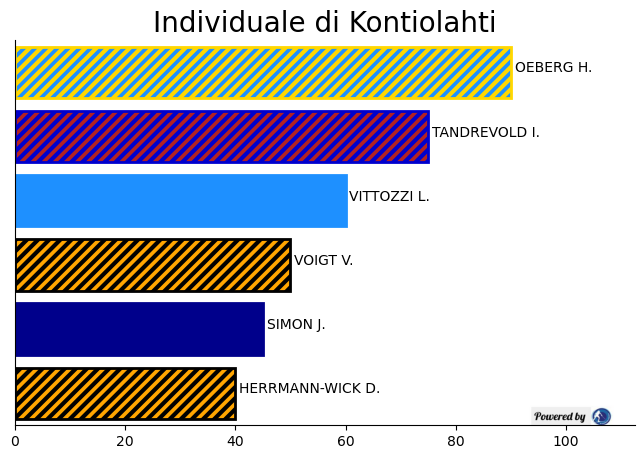

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
import matplotlib
colorBack = matplotlib.colors.to_rgba('lightskyblue', alpha = 0.5)
labels = dfExpanded.columns
img = matplotlib.image.imread('poweredBy.jpg')
for i, ax in enumerate([ax], start = 0):
    names = list(reversed(sorted(dict(dfRankExpanded.iloc[i]).items(), key = lambda x: x[1])))[:6]
    y = dfRankExpanded.iloc[i]
    
    width = dfExpanded.iloc[i]
    widthsPlotted = np.sort(np.array(width))[::-1][:7]
    heightsPlotted = np.sort(np.array(y))[::-1][:7]
    maxWidth = np.max(width)
    nations = []
    for i in range(6):
        _ = ax.text(x = width[names[i][0]] + 0.7, y = y[names[i][0]], s = names[i][0], fontsize = 10);
        nations.append(natDict[names[i][0]])
    annotations = list(map(lambda x: converter[x], dfRankExpanded.index[i].split('_')))
    #ax.text(f'{annotations[1]}\n{annotations[0]}', (np.max(widthsPlotted), np.min(heightsPlotted) + 1), fontsize = 20)
    #ax.text(np.max(widthsPlotted)-maxWidth/5 ,np.min(heightsPlotted) + 1, f'{annotations[1]} di\n{annotations[0]}', fontsize = 20,\
     #       bbox=dict(facecolor=colorBack, edgecolor= 'black', linewidth=2, boxstyle='round,pad=0.5'))
    ax.set_title(f'{annotations[1]} di {annotations[0]}', fontsize = 20)
    barList = ax.barh(y = y, width = width)
    ax.imshow(img, extent=[maxWidth ,maxWidth+ maxWidth/4, 139 + 0.1 , 139+1.1], aspect='auto')
    ax.set_ylim(bottom = len(y) - 5.5, top = len(y) + 0.5)
    #ax.set_ylim(bottom = 0, top = 5 + 0.5)
    ax.set_xlim(left = 0, right = maxWidth + maxWidth/4)
    
    colorsList = [colorsDict[nat] for nat in nations]
    primaryColors = list(map(lambda x: x[0], colorsList))
    secondaryColors = list(map(lambda x: x[1], colorsList))
    #print(counts_per_ath['primary_color'])
    for bar, height, width, main_color, hatch_color in zip([barList[i] for i in range(1, 7)], heightsPlotted,\
                                                           widthsPlotted, primaryColors, secondaryColors):
        
        #print(list(zip(ax.containers[0][:5:-1], counts_per_ath['primary_color'], counts_per_ath['secondary_color'])))
        #print(list(reversed(ax.containers[0])))
        rect = matplotlib.patches.Rectangle((0, height-0.4), width, bar.get_height(), hatch='///', linewidth=0)
        rect.set_facecolor(main_color)
        rect.set_edgecolor(hatch_color)
        rect.set_linewidth(2)
        _ = ax.add_patch(rect)
        matplotlib.rcParams['hatch.linewidth'] = 3
        #bar.set_facecolor(main_color)
        #bar.set_edgecolor(hatch_color)
        #bar.set_hatch('//')

    # Setting tick labels
    ax.set_yticks([])
    ax.spines[['right', 'top']].set_visible(False)

plt.show()

In [15]:
dfRankExpanded.index[intermediateSteps]

'KON_SP'

In [16]:
dfExpanded.index[(intermediateSteps + 20) - (intermediateSteps + 20)%intermediateSteps]
(intermediateSteps + 20) - (intermediateSteps + 20)%intermediateSteps

'KON_SP'

25

In [17]:
# frames between transitions
n_frames = 1
nIndex = len(dfExpanded.index)
labels = dfExpanded.columns
print('Creating charts\n')
filenames = []
path = '../../'
for j in tqdm(np.arange(0, nIndex)):
    
    
    
    if j % intermediateSteps == 0:
        annotations = list(map(lambda x: converter[x], dfRankExpanded.index[j].split('_')))
        title = f'{annotations[1]} di {annotations[0]}'
        rangeFrames = 5
    else:
        annotations = list(map(lambda x: converter[x], dfRankExpanded.index[j+intermediateSteps - ((j+intermediateSteps)%intermediateSteps)].split('_')))
        title = f'{annotations[1]} di {annotations[0]}'
        rangeFrames = 1
    for i in np.arange(0, rangeFrames):
        
        #y_temp = (y + (y_path / n_frames) * i)
        
        
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        names = list(reversed(sorted(dict(dfRankExpanded.iloc[j]).items(), key = lambda x: x[1])))[:6]
        y =  dfRankExpanded.iloc[j]
        width = dfExpanded.iloc[j]
        widthsPlotted = np.sort(np.array(width))[::-1][:7]
        heightsPlotted = np.sort(np.array(y))[::-1][:7]
        maxWidth = np.max(width)
        #print(np.sort(np.array(width))[::-1])
        
        nations = []
        for k in range(6):
            ax.text(x = width[names[k][0]] + width[names[k][0]]/100, y = y[names[k][0]], s = names[k][0], fontsize = 10);
            nations.append(natDict[names[k][0]])
        
    #ax.text(f'{annotations[1]}\n{annotations[0]}', (np.max(widthsPlotted), np.min(heightsPlotted) + 1), fontsize = 20)
    #ax.text(np.max(widthsPlotted)-maxWidth/5 ,np.min(heightsPlotted) + 1, f'{annotations[1]} di\n{annotations[0]}', fontsize = 20,\
     #       bbox=dict(facecolor=colorBack, edgecolor= 'black', linewidth=2, boxstyle='round,pad=0.5'))
        ax.set_title(title, fontsize = 20)
        ax.set_xlabel('Punti', fontsize = 15)
        ax.barh(y = y, width = width, color = colors, alpha = 0)
        ax.set_ylim(bottom = len(y) - 5.5, top = len(y) + 0.5)
        ax.set_xlim(left = 0, right = maxWidth + maxWidth/4)
        ax.imshow(img, extent=[maxWidth ,maxWidth+ maxWidth/4, 139 + 0.1 , 139+1.1], aspect='auto')
        colorsList = [colorsDict[nat] for nat in nations]
        primaryColors = list(map(lambda x: x[0], colorsList))
        secondaryColors = list(map(lambda x: x[1], colorsList))
        #plt.title(f'Epoch {j}', fontsize=16);
        #plt.xlabel('Digit', fontsize=14)
        #plt.ylabel('Estimated probability', fontsize=14)
        #plt.grid(alpha=0.5, axis='y')
        for bar, height, width, main_color, hatch_color in zip([barList[l] for l in range(1, 7)], heightsPlotted,\
                                                           widthsPlotted, primaryColors, secondaryColors):
        
        #print(list(zip(ax.containers[0][:5:-1], counts_per_ath['primary_color'], counts_per_ath['secondary_color'])))
        #print(list(reversed(ax.containers[0])))
            rect = matplotlib.patches.Rectangle((0, height-0.4), width, bar.get_height(), hatch='///', linewidth=0)
            rect.set_facecolor(main_color)
            rect.set_edgecolor(hatch_color)
            rect.set_linewidth(2)
            _ = ax.add_patch(rect)
            matplotlib.rcParams['hatch.linewidth'] = 3
        ax.set_yticks([])
        ax.spines[['right', 'top']].set_visible(False)
        # build file name and append to list of file names
        filename = f'frame_{j}_{i}.png'
        filenames.append(path + filename)
        # last frame of each viz stays longer 
        #if (i == n_frames):
         #   for i in range(1):
          #      filenames.append(filename)
        # save img
        plt.savefig(path + filename)
        plt.close()

# Build GIF

with imageio.get_writer('raceWomen2.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)


# Remove files
for filename in set(filenames):
    os.remove(filename)


Creating charts



  0%|          | 0/476 [00:00<?, ?it/s]

Text(90.9, 145.0, 'OEBERG H.')

Text(75.75, 144.0, 'TANDREVOLD I.')

Text(60.6, 143.0, 'VITTOZZI L.')

Text(50.5, 142.0, 'VOIGT V.')

Text(45.45, 141.0, 'SIMON J.')

Text(40.4, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 112.5)

[]

Text(90.9, 145.0, 'OEBERG H.')

Text(75.75, 144.0, 'TANDREVOLD I.')

Text(60.6, 143.0, 'VITTOZZI L.')

Text(50.5, 142.0, 'VOIGT V.')

Text(45.45, 141.0, 'SIMON J.')

Text(40.4, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 112.5)

[]

Text(90.9, 145.0, 'OEBERG H.')

Text(75.75, 144.0, 'TANDREVOLD I.')

Text(60.6, 143.0, 'VITTOZZI L.')

Text(50.5, 142.0, 'VOIGT V.')

Text(45.45, 141.0, 'SIMON J.')

Text(40.4, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 112.5)

[]

Text(90.9, 145.0, 'OEBERG H.')

Text(75.75, 144.0, 'TANDREVOLD I.')

Text(60.6, 143.0, 'VITTOZZI L.')

Text(50.5, 142.0, 'VOIGT V.')

Text(45.45, 141.0, 'SIMON J.')

Text(40.4, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 112.5)

[]

Text(90.9, 145.0, 'OEBERG H.')

Text(75.75, 144.0, 'TANDREVOLD I.')

Text(60.6, 143.0, 'VITTOZZI L.')

Text(50.5, 142.0, 'VOIGT V.')

Text(45.45, 141.0, 'SIMON J.')

Text(40.4, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Individuale di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 112.5)

[]

  0%|          | 1/476 [00:02<20:02,  2.53s/it]

Text(91.8292, 144.92, 'OEBERG H.')

Text(77.366, 144.0, 'TANDREVOLD I.')

Text(63.63, 143.08, 'VITTOZZI L.')

Text(51.712, 141.92, 'VOIGT V.')

Text(46.46, 140.84, 'SIMON J.')

Text(42.016, 139.96, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 113.65)

[]

  0%|          | 2/476 [00:03<10:56,  1.38s/it]

Text(92.75840000000001, 144.84, 'OEBERG H.')

Text(78.982, 144.0, 'TANDREVOLD I.')

Text(66.66, 143.16, 'VITTOZZI L.')

Text(52.924, 141.84, 'VOIGT V.')

Text(47.47, 140.68, 'SIMON J.')

Text(43.632000000000005, 139.92, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 114.80000000000001)

[]

  1%|          | 3/476 [00:03<07:37,  1.03it/s]

Text(93.6876, 144.76, 'OEBERG H.')

Text(80.598, 144.0, 'TANDREVOLD I.')

Text(69.69, 143.24, 'VITTOZZI L.')

Text(54.136, 141.76, 'VOIGT V.')

Text(48.48, 140.52, 'SIMON J.')

Text(45.248, 139.88, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 115.95)

[]

  1%|          | 4/476 [00:04<06:06,  1.29it/s]

Text(94.61680000000001, 144.68, 'OEBERG H.')

Text(82.214, 144.0, 'TANDREVOLD I.')

Text(72.72, 143.32, 'VITTOZZI L.')

Text(55.348, 141.68, 'VOIGT V.')

Text(49.49, 140.36, 'SIMON J.')

Text(46.864, 139.84, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 117.10000000000001)

[]

  1%|          | 5/476 [00:04<05:31,  1.42it/s]

Text(95.54599999999999, 144.6, 'OEBERG H.')

Text(83.83, 144.0, 'TANDREVOLD I.')

Text(75.75, 143.4, 'VITTOZZI L.')

Text(56.56, 141.6, 'VOIGT V.')

Text(50.5, 140.2, 'SIMON J.')

Text(48.48, 139.8, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 118.25)

[]

  1%|▏         | 6/476 [00:05<05:01,  1.56it/s]

Text(96.4752, 144.52, 'OEBERG H.')

Text(85.446, 144.0, 'TANDREVOLD I.')

Text(78.78, 143.48, 'VITTOZZI L.')

Text(57.772000000000006, 141.52, 'VOIGT V.')

Text(51.51, 140.04, 'SIMON J.')

Text(50.096000000000004, 139.76, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 119.39999999999999)

[]

  1%|▏         | 7/476 [00:05<04:27,  1.75it/s]

Text(97.4044, 144.44, 'OEBERG H.')

Text(87.062, 144.0, 'TANDREVOLD I.')

Text(81.81, 143.56, 'VITTOZZI L.')

Text(58.984, 141.44, 'VOIGT V.')

Text(52.52, 139.88, 'SIMON J.')

Text(51.712, 139.72, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 120.55)

[]

  2%|▏         | 8/476 [00:06<04:11,  1.86it/s]

Text(98.3336, 144.36, 'OEBERG H.')

Text(88.678, 144.0, 'TANDREVOLD I.')

Text(84.84, 143.64, 'VITTOZZI L.')

Text(60.196, 141.36, 'VOIGT V.')

Text(53.53, 139.72, 'SIMON J.')

Text(53.327999999999996, 139.68, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 121.7)

[]

  2%|▏         | 9/476 [00:06<03:57,  1.96it/s]

Text(99.2628, 144.28, 'OEBERG H.')

Text(90.29400000000001, 144.0, 'TANDREVOLD I.')

Text(87.87, 143.72, 'VITTOZZI L.')

Text(61.407999999999994, 141.28, 'VOIGT V.')

Text(54.943999999999996, 139.64, 'HERRMANN-WICK D.')

Text(54.54, 139.56, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 122.85)

[]

  2%|▏         | 10/476 [00:07<04:05,  1.90it/s]

Text(100.19200000000001, 144.2, 'OEBERG H.')

Text(91.91, 144.0, 'TANDREVOLD I.')

Text(90.9, 143.8, 'VITTOZZI L.')

Text(62.62, 141.2, 'VOIGT V.')

Text(56.56, 139.6, 'HERRMANN-WICK D.')

Text(55.55, 139.4, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 124.0)

[]

  2%|▏         | 11/476 [00:07<03:52,  2.00it/s]

Text(101.1212, 144.12, 'OEBERG H.')

Text(93.526, 144.0, 'TANDREVOLD I.')

Text(93.93, 143.88, 'VITTOZZI L.')

Text(63.832, 141.12, 'VOIGT V.')

Text(58.176, 139.56, 'HERRMANN-WICK D.')

Text(56.56, 139.24, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 125.15)

[]

  3%|▎         | 12/476 [00:08<04:21,  1.77it/s]

Text(102.05040000000001, 144.04, 'OEBERG H.')

Text(95.142, 144.0, 'TANDREVOLD I.')

Text(96.96, 143.96, 'VITTOZZI L.')

Text(65.04400000000001, 141.04, 'VOIGT V.')

Text(59.792, 139.52, 'HERRMANN-WICK D.')

Text(57.57, 139.08, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 126.30000000000001)

[]

  3%|▎         | 13/476 [00:08<04:17,  1.80it/s]

Text(99.99, 144.04, 'VITTOZZI L.')

Text(96.758, 144.0, 'TANDREVOLD I.')

Text(102.9796, 143.96, 'OEBERG H.')

Text(66.256, 140.96, 'VOIGT V.')

Text(61.407999999999994, 139.48, 'HERRMANN-WICK D.')

Text(58.58, 138.92, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 127.45000000000002)

[]

  3%|▎         | 14/476 [00:09<04:11,  1.84it/s]

Text(103.02, 144.12, 'VITTOZZI L.')

Text(98.37400000000001, 144.0, 'TANDREVOLD I.')

Text(103.9088, 143.88, 'OEBERG H.')

Text(67.468, 140.88, 'VOIGT V.')

Text(63.02400000000001, 139.44, 'HERRMANN-WICK D.')

Text(59.59, 138.76, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 128.6)

[]

  3%|▎         | 15/476 [00:09<03:58,  1.93it/s]

Text(106.05, 144.2, 'VITTOZZI L.')

Text(99.99, 144.0, 'TANDREVOLD I.')

Text(104.838, 143.8, 'OEBERG H.')

Text(68.68, 140.8, 'VOIGT V.')

Text(64.64, 139.4, 'HERRMANN-WICK D.')

Text(60.6, 138.6, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 131.25)

[]

  3%|▎         | 16/476 [00:10<03:58,  1.93it/s]

Text(109.08, 144.28, 'VITTOZZI L.')

Text(101.606, 144.0, 'TANDREVOLD I.')

Text(105.7672, 143.72, 'OEBERG H.')

Text(69.892, 140.72, 'VOIGT V.')

Text(66.256, 139.36, 'HERRMANN-WICK D.')

Text(61.61, 138.44, 'SIMON J.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 135.0)

[]

  4%|▎         | 17/476 [00:10<03:57,  1.93it/s]

Text(112.11, 144.36, 'VITTOZZI L.')

Text(103.22200000000001, 144.0, 'TANDREVOLD I.')

Text(106.6964, 143.64, 'OEBERG H.')

Text(71.104, 140.64, 'VOIGT V.')

Text(67.872, 139.32, 'HERRMANN-WICK D.')

Text(69.488, 138.44, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 138.75)

[]

  4%|▍         | 18/476 [00:11<03:46,  2.02it/s]

Text(115.14, 144.44, 'VITTOZZI L.')

Text(104.838, 144.0, 'TANDREVOLD I.')

Text(107.6256, 143.56, 'OEBERG H.')

Text(72.31599999999999, 140.56, 'VOIGT V.')

Text(69.488, 139.28, 'HERRMANN-WICK D.')

Text(71.91199999999999, 138.76, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 142.5)

[]

  4%|▍         | 19/476 [00:11<03:49,  1.99it/s]

Text(118.17, 144.52, 'VITTOZZI L.')

Text(106.45400000000001, 144.0, 'TANDREVOLD I.')

Text(108.5548, 143.48, 'OEBERG H.')

Text(73.52799999999999, 140.48, 'VOIGT V.')

Text(71.104, 139.24, 'HERRMANN-WICK D.')

Text(74.336, 139.08, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 146.25)

[]

  4%|▍         | 20/476 [00:12<03:44,  2.03it/s]

Text(121.2, 144.6, 'VITTOZZI L.')

Text(108.07, 144.0, 'TANDREVOLD I.')

Text(109.48400000000001, 143.4, 'OEBERG H.')

Text(74.74, 140.4, 'VOIGT V.')

Text(76.76, 139.4, 'PERSSON L.')

Text(72.72, 139.2, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 150.0)

[]

  4%|▍         | 21/476 [00:12<04:13,  1.80it/s]

Text(124.23, 144.68, 'VITTOZZI L.')

Text(109.68599999999999, 144.0, 'TANDREVOLD I.')

Text(110.41319999999999, 143.32, 'OEBERG H.')

Text(75.952, 140.32, 'VOIGT V.')

Text(79.18400000000001, 139.72, 'PERSSON L.')

Text(74.336, 139.16, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 153.75)

[]

  5%|▍         | 22/476 [00:13<03:59,  1.89it/s]

Text(127.26, 144.76, 'VITTOZZI L.')

Text(111.302, 144.0, 'TANDREVOLD I.')

Text(111.34240000000001, 143.24, 'OEBERG H.')

Text(77.164, 140.24, 'VOIGT V.')

Text(81.608, 140.04, 'PERSSON L.')

Text(75.952, 139.12, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 157.5)

[]

  5%|▍         | 23/476 [00:13<04:03,  1.86it/s]

Text(130.29, 144.84, 'VITTOZZI L.')

Text(112.918, 144.0, 'TANDREVOLD I.')

Text(112.27159999999999, 143.16, 'OEBERG H.')

Text(84.03199999999998, 140.36, 'PERSSON L.')

Text(78.37599999999999, 140.16, 'VOIGT V.')

Text(92.718, 139.76, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 161.25)

[]

  5%|▌         | 24/476 [00:14<03:55,  1.92it/s]

Text(133.32, 144.92, 'VITTOZZI L.')

Text(114.534, 144.0, 'TANDREVOLD I.')

Text(113.2008, 143.08, 'OEBERG H.')

Text(96.354, 140.88, 'HAUSER L.')

Text(86.45599999999999, 140.68, 'PERSSON L.')

Text(79.588, 140.08, 'VOIGT V.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 165.0)

[]

  5%|▌         | 25/476 [00:14<03:54,  1.92it/s]

Text(136.35, 145.0, 'VITTOZZI L.')

Text(116.15, 144.0, 'TANDREVOLD I.')

Text(114.13, 143.0, 'OEBERG H.')

Text(99.99, 142.0, 'HAUSER L.')

Text(88.88, 141.0, 'PERSSON L.')

Text(80.8, 140.0, 'VOIGT V.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 168.75)

[]

Text(136.35, 145.0, 'VITTOZZI L.')

Text(116.15, 144.0, 'TANDREVOLD I.')

Text(114.13, 143.0, 'OEBERG H.')

Text(99.99, 142.0, 'HAUSER L.')

Text(88.88, 141.0, 'PERSSON L.')

Text(80.8, 140.0, 'VOIGT V.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 168.75)

[]

Text(136.35, 145.0, 'VITTOZZI L.')

Text(116.15, 144.0, 'TANDREVOLD I.')

Text(114.13, 143.0, 'OEBERG H.')

Text(99.99, 142.0, 'HAUSER L.')

Text(88.88, 141.0, 'PERSSON L.')

Text(80.8, 140.0, 'VOIGT V.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 168.75)

[]

Text(136.35, 145.0, 'VITTOZZI L.')

Text(116.15, 144.0, 'TANDREVOLD I.')

Text(114.13, 143.0, 'OEBERG H.')

Text(99.99, 142.0, 'HAUSER L.')

Text(88.88, 141.0, 'PERSSON L.')

Text(80.8, 140.0, 'VOIGT V.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 168.75)

[]

Text(136.35, 145.0, 'VITTOZZI L.')

Text(116.15, 144.0, 'TANDREVOLD I.')

Text(114.13, 143.0, 'OEBERG H.')

Text(99.99, 142.0, 'HAUSER L.')

Text(88.88, 141.0, 'PERSSON L.')

Text(80.8, 140.0, 'VOIGT V.')

Text(0.5, 1.0, 'Sprint di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 168.75)

[]

  5%|▌         | 26/476 [00:17<08:10,  1.09s/it]

Text(138.37, 145.0, 'VITTOZZI L.')

Text(117.2408, 143.92, 'TANDREVOLD I.')

Text(115.38239999999999, 143.0, 'OEBERG H.')

Text(101.2828, 141.96, 'HAUSER L.')

Text(90.092, 140.92, 'PERSSON L.')

Text(82.1736, 139.88, 'VOIGT V.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 171.25)

[]

  6%|▌         | 27/476 [00:17<06:53,  1.09it/s]

Text(140.39, 145.0, 'VITTOZZI L.')

Text(118.3316, 143.84, 'TANDREVOLD I.')

Text(116.6348, 143.0, 'OEBERG H.')

Text(102.57560000000001, 141.92, 'HAUSER L.')

Text(91.304, 140.84, 'PERSSON L.')

Text(83.5472, 139.76, 'VOIGT V.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 173.75)

[]

  6%|▌         | 28/476 [00:18<06:42,  1.11it/s]

Text(142.41, 145.0, 'VITTOZZI L.')

Text(119.4224, 143.76, 'TANDREVOLD I.')

Text(117.88719999999999, 143.0, 'OEBERG H.')

Text(103.86840000000001, 141.88, 'HAUSER L.')

Text(92.51599999999999, 140.76, 'PERSSON L.')

Text(84.9208, 139.64, 'VOIGT V.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 176.25)

[]

  6%|▌         | 29/476 [00:19<05:45,  1.29it/s]

Text(144.43, 145.0, 'VITTOZZI L.')

Text(120.5132, 143.68, 'TANDREVOLD I.')

Text(119.13959999999999, 143.0, 'OEBERG H.')

Text(105.16120000000001, 141.84, 'HAUSER L.')

Text(93.728, 140.68, 'PERSSON L.')

Text(86.2944, 139.52, 'VOIGT V.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 178.75)

[]

  6%|▋         | 30/476 [00:19<05:04,  1.46it/s]

Text(146.45, 145.0, 'VITTOZZI L.')

Text(121.604, 143.6, 'TANDREVOLD I.')

Text(120.392, 143.0, 'OEBERG H.')

Text(106.45400000000001, 141.8, 'HAUSER L.')

Text(94.94, 140.6, 'PERSSON L.')

Text(87.66799999999999, 139.4, 'VOIGT V.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 181.25)

[]

  7%|▋         | 31/476 [00:20<04:45,  1.56it/s]

Text(148.47, 145.0, 'VITTOZZI L.')

Text(122.6948, 143.52, 'TANDREVOLD I.')

Text(121.6444, 143.0, 'OEBERG H.')

Text(107.74680000000001, 141.76, 'HAUSER L.')

Text(96.152, 140.52, 'PERSSON L.')

Text(89.0416, 139.28, 'VOIGT V.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 183.75)

[]

  7%|▋         | 32/476 [00:20<04:17,  1.72it/s]

Text(150.49, 145.0, 'VITTOZZI L.')

Text(123.7856, 143.44, 'TANDREVOLD I.')

Text(122.89680000000001, 143.0, 'OEBERG H.')

Text(109.03960000000001, 141.72, 'HAUSER L.')

Text(97.364, 140.44, 'PERSSON L.')

Text(90.4152, 139.16, 'VOIGT V.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 186.25)

[]

  7%|▋         | 33/476 [00:21<04:05,  1.80it/s]

Text(152.51, 145.0, 'VITTOZZI L.')

Text(124.8764, 143.36, 'TANDREVOLD I.')

Text(124.14920000000001, 143.0, 'OEBERG H.')

Text(110.33239999999999, 141.68, 'HAUSER L.')

Text(98.576, 140.36, 'PERSSON L.')

Text(99.788, 139.24, 'SIMON J.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 188.75)

[]

  7%|▋         | 34/476 [00:21<04:08,  1.78it/s]

Text(154.53, 145.0, 'VITTOZZI L.')

Text(125.9672, 143.28, 'TANDREVOLD I.')

Text(125.4016, 143.0, 'OEBERG H.')

Text(111.62519999999999, 141.64, 'HAUSER L.')

Text(99.788, 140.28, 'PERSSON L.')

Text(103.424, 139.52, 'SIMON J.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 191.25)

[]

  7%|▋         | 35/476 [00:22<03:53,  1.89it/s]

Text(156.55, 145.0, 'VITTOZZI L.')

Text(127.05799999999999, 143.2, 'TANDREVOLD I.')

Text(126.65400000000001, 143.0, 'OEBERG H.')

Text(112.91799999999999, 141.6, 'HAUSER L.')

Text(101.0, 140.2, 'PERSSON L.')

Text(107.06, 139.8, 'SIMON J.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 193.75)

[]

  8%|▊         | 36/476 [00:22<03:48,  1.93it/s]

Text(158.57, 145.0, 'VITTOZZI L.')

Text(128.1488, 143.12, 'TANDREVOLD I.')

Text(127.9064, 143.0, 'OEBERG H.')

Text(114.21079999999999, 141.56, 'HAUSER L.')

Text(102.212, 140.12, 'PERSSON L.')

Text(110.696, 140.08, 'SIMON J.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 196.25)

[]

  8%|▊         | 37/476 [00:23<03:46,  1.94it/s]

Text(160.59, 145.0, 'VITTOZZI L.')

Text(129.2396, 143.04, 'TANDREVOLD I.')

Text(129.15879999999999, 143.0, 'OEBERG H.')

Text(115.5036, 141.52, 'HAUSER L.')

Text(114.33200000000001, 140.36, 'SIMON J.')

Text(103.424, 140.04, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 198.75)

[]

  8%|▊         | 38/476 [00:23<03:52,  1.88it/s]

Text(162.61, 145.0, 'VITTOZZI L.')

Text(130.4112, 143.0, 'OEBERG H.')

Text(130.3304, 142.96, 'TANDREVOLD I.')

Text(116.7964, 141.48, 'HAUSER L.')

Text(117.96800000000002, 140.64, 'SIMON J.')

Text(104.636, 139.96, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 201.25)

[]

  8%|▊         | 39/476 [00:24<03:42,  1.96it/s]

Text(164.63, 145.0, 'VITTOZZI L.')

Text(131.6636, 143.0, 'OEBERG H.')

Text(131.4212, 142.88, 'TANDREVOLD I.')

Text(118.0892, 141.44, 'HAUSER L.')

Text(121.604, 140.92, 'SIMON J.')

Text(105.848, 139.88, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 203.75)

[]

  8%|▊         | 40/476 [00:24<03:33,  2.04it/s]

Text(166.65, 145.0, 'VITTOZZI L.')

Text(132.916, 143.0, 'OEBERG H.')

Text(132.512, 142.8, 'TANDREVOLD I.')

Text(119.382, 141.4, 'HAUSER L.')

Text(125.24, 141.2, 'SIMON J.')

Text(107.06, 139.8, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 206.25)

[]

  9%|▊         | 41/476 [00:25<03:38,  1.99it/s]

Text(168.67, 145.0, 'VITTOZZI L.')

Text(134.1684, 143.0, 'OEBERG H.')

Text(133.6028, 142.72, 'TANDREVOLD I.')

Text(128.876, 141.48, 'SIMON J.')

Text(120.6748, 141.36, 'HAUSER L.')

Text(108.272, 139.72, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 208.75)

[]

  9%|▉         | 42/476 [00:26<04:43,  1.53it/s]

Text(170.69, 145.0, 'VITTOZZI L.')

Text(135.42079999999999, 143.0, 'OEBERG H.')

Text(134.6936, 142.64, 'TANDREVOLD I.')

Text(132.512, 141.76, 'SIMON J.')

Text(121.9676, 141.32, 'HAUSER L.')

Text(109.48400000000001, 139.64, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 211.25)

[]

  9%|▉         | 43/476 [00:26<04:35,  1.57it/s]

Text(172.71, 145.0, 'VITTOZZI L.')

Text(136.67319999999998, 143.0, 'OEBERG H.')

Text(135.7844, 142.56, 'TANDREVOLD I.')

Text(136.14800000000002, 142.04, 'SIMON J.')

Text(123.26039999999999, 141.28, 'HAUSER L.')

Text(110.696, 139.56, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 213.75)

[]

  9%|▉         | 44/476 [00:27<04:26,  1.62it/s]

Text(174.73, 145.0, 'VITTOZZI L.')

Text(137.9256, 143.0, 'OEBERG H.')

Text(136.8752, 142.48, 'TANDREVOLD I.')

Text(139.784, 142.32, 'SIMON J.')

Text(124.55319999999999, 141.24, 'HAUSER L.')

Text(111.908, 139.48, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 216.25)

[]

  9%|▉         | 45/476 [00:28<04:31,  1.59it/s]

Text(176.75, 145.0, 'VITTOZZI L.')

Text(139.178, 143.0, 'OEBERG H.')

Text(143.42, 142.6, 'SIMON J.')

Text(137.966, 142.4, 'TANDREVOLD I.')

Text(125.84599999999999, 141.2, 'HAUSER L.')

Text(113.12, 139.4, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 218.75)

[]

 10%|▉         | 46/476 [00:28<04:26,  1.62it/s]

Text(178.77, 145.0, 'VITTOZZI L.')

Text(140.4304, 143.0, 'OEBERG H.')

Text(147.056, 142.88, 'SIMON J.')

Text(139.0568, 142.32, 'TANDREVOLD I.')

Text(127.13879999999999, 141.16, 'HAUSER L.')

Text(114.33200000000001, 139.32, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 221.25)

[]

 10%|▉         | 47/476 [00:29<04:05,  1.75it/s]

Text(180.79, 145.0, 'VITTOZZI L.')

Text(150.69199999999998, 143.16, 'SIMON J.')

Text(141.68280000000001, 143.0, 'OEBERG H.')

Text(140.14759999999998, 142.24, 'TANDREVOLD I.')

Text(128.4316, 141.12, 'HAUSER L.')

Text(114.938, 139.4, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 223.75)

[]

 10%|█         | 48/476 [00:29<04:02,  1.77it/s]

Text(182.81, 145.0, 'VITTOZZI L.')

Text(154.328, 143.44, 'SIMON J.')

Text(142.9352, 143.0, 'OEBERG H.')

Text(141.2384, 142.16, 'TANDREVOLD I.')

Text(129.7244, 141.08, 'HAUSER L.')

Text(117.362, 139.6, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 226.25)

[]

 10%|█         | 49/476 [00:30<03:45,  1.89it/s]

Text(184.83, 145.0, 'VITTOZZI L.')

Text(157.964, 143.72, 'SIMON J.')

Text(144.1876, 143.0, 'OEBERG H.')

Text(142.32920000000001, 142.08, 'TANDREVOLD I.')

Text(131.0172, 141.04, 'HAUSER L.')

Text(119.786, 139.8, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 228.75)

[]

 11%|█         | 50/476 [00:30<03:42,  1.91it/s]

Text(186.85, 145.0, 'VITTOZZI L.')

Text(161.6, 144.0, 'SIMON J.')

Text(145.44, 143.0, 'OEBERG H.')

Text(143.42, 142.0, 'TANDREVOLD I.')

Text(132.31, 141.0, 'HAUSER L.')

Text(122.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 231.25)

[]

Text(186.85, 145.0, 'VITTOZZI L.')

Text(161.6, 144.0, 'SIMON J.')

Text(145.44, 143.0, 'OEBERG H.')

Text(143.42, 142.0, 'TANDREVOLD I.')

Text(132.31, 141.0, 'HAUSER L.')

Text(122.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 231.25)

[]

Text(186.85, 145.0, 'VITTOZZI L.')

Text(161.6, 144.0, 'SIMON J.')

Text(145.44, 143.0, 'OEBERG H.')

Text(143.42, 142.0, 'TANDREVOLD I.')

Text(132.31, 141.0, 'HAUSER L.')

Text(122.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 231.25)

[]

Text(186.85, 145.0, 'VITTOZZI L.')

Text(161.6, 144.0, 'SIMON J.')

Text(145.44, 143.0, 'OEBERG H.')

Text(143.42, 142.0, 'TANDREVOLD I.')

Text(132.31, 141.0, 'HAUSER L.')

Text(122.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 231.25)

[]

Text(186.85, 145.0, 'VITTOZZI L.')

Text(161.6, 144.0, 'SIMON J.')

Text(145.44, 143.0, 'OEBERG H.')

Text(143.42, 142.0, 'TANDREVOLD I.')

Text(132.31, 141.0, 'HAUSER L.')

Text(122.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Kontiolahti')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 231.25)

[]

 11%|█         | 51/476 [00:33<08:02,  1.14s/it]

Text(187.77919999999997, 144.96, 'VITTOZZI L.')

Text(164.024, 144.04, 'SIMON J.')

Text(147.05599999999998, 142.96, 'OEBERG H.')

Text(144.5512, 141.92, 'TANDREVOLD I.')

Text(133.4816, 140.88, 'HAUSER L.')

Text(124.23, 140.04, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 232.39999999999998)

[]

 11%|█         | 52/476 [00:33<06:36,  1.07it/s]

Text(188.7084, 144.92, 'VITTOZZI L.')

Text(166.448, 144.08, 'SIMON J.')

Text(148.672, 142.92, 'OEBERG H.')

Text(145.6824, 141.84, 'TANDREVOLD I.')

Text(134.6532, 140.76, 'HAUSER L.')

Text(126.25, 140.08, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 233.55)

[]

 11%|█         | 53/476 [00:34<05:51,  1.20it/s]

Text(189.6376, 144.88, 'VITTOZZI L.')

Text(168.87199999999999, 144.12, 'SIMON J.')

Text(150.288, 142.88, 'OEBERG H.')

Text(146.8136, 141.76, 'TANDREVOLD I.')

Text(135.82479999999998, 140.64, 'HAUSER L.')

Text(128.27, 140.12, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 234.7)

[]

 11%|█▏        | 54/476 [00:34<05:05,  1.38it/s]

Text(190.5668, 144.84, 'VITTOZZI L.')

Text(171.296, 144.16, 'SIMON J.')

Text(151.904, 142.84, 'OEBERG H.')

Text(147.9448, 141.68, 'TANDREVOLD I.')

Text(136.9964, 140.52, 'HAUSER L.')

Text(130.29, 140.16, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 235.85000000000002)

[]

 12%|█▏        | 55/476 [00:35<04:40,  1.50it/s]

Text(191.49599999999998, 144.8, 'VITTOZZI L.')

Text(173.72, 144.2, 'SIMON J.')

Text(153.52, 142.8, 'OEBERG H.')

Text(149.076, 141.6, 'TANDREVOLD I.')

Text(138.168, 140.4, 'HAUSER L.')

Text(132.31, 140.2, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 237.0)

[]

 12%|█▏        | 56/476 [00:36<05:12,  1.34it/s]

Text(192.42520000000002, 144.76, 'VITTOZZI L.')

Text(176.144, 144.24, 'SIMON J.')

Text(155.136, 142.76, 'OEBERG H.')

Text(150.2072, 141.52, 'TANDREVOLD I.')

Text(139.33960000000002, 140.28, 'HAUSER L.')

Text(134.33, 140.24, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 238.15)

[]

 12%|█▏        | 57/476 [00:36<04:34,  1.53it/s]

Text(193.3544, 144.72, 'VITTOZZI L.')

Text(178.568, 144.28, 'SIMON J.')

Text(156.75199999999998, 142.72, 'OEBERG H.')

Text(151.3384, 141.44, 'TANDREVOLD I.')

Text(136.35, 140.28, 'OEBERG E.')

Text(140.5112, 140.16, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 239.3)

[]

 12%|█▏        | 58/476 [00:37<04:16,  1.63it/s]

Text(194.2836, 144.68, 'VITTOZZI L.')

Text(180.992, 144.32, 'SIMON J.')

Text(158.36800000000002, 142.68, 'OEBERG H.')

Text(152.4696, 141.36, 'TANDREVOLD I.')

Text(138.37, 140.32, 'OEBERG E.')

Text(141.68280000000001, 140.04, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 240.45000000000002)

[]

 12%|█▏        | 59/476 [00:37<04:09,  1.67it/s]

Text(195.2128, 144.64, 'VITTOZZI L.')

Text(183.416, 144.36, 'SIMON J.')

Text(159.984, 142.64, 'OEBERG H.')

Text(153.60080000000002, 141.28, 'TANDREVOLD I.')

Text(140.39, 140.36, 'OEBERG E.')

Text(142.8544, 139.92, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 241.6)

[]

 13%|█▎        | 60/476 [00:38<03:56,  1.76it/s]

Text(196.142, 144.6, 'VITTOZZI L.')

Text(185.84, 144.4, 'SIMON J.')

Text(161.6, 142.6, 'OEBERG H.')

Text(154.732, 141.2, 'TANDREVOLD I.')

Text(142.41, 140.4, 'OEBERG E.')

Text(144.02599999999998, 139.8, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 242.75)

[]

 13%|█▎        | 61/476 [00:38<03:54,  1.77it/s]

Text(197.0712, 144.56, 'VITTOZZI L.')

Text(188.264, 144.44, 'SIMON J.')

Text(163.216, 142.56, 'OEBERG H.')

Text(155.8632, 141.12, 'TANDREVOLD I.')

Text(144.43, 140.44, 'OEBERG E.')

Text(145.1976, 139.68, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 243.9)

[]

 13%|█▎        | 62/476 [00:39<03:48,  1.81it/s]

Text(198.00039999999998, 144.52, 'VITTOZZI L.')

Text(190.68800000000002, 144.48, 'SIMON J.')

Text(164.832, 142.52, 'OEBERG H.')

Text(156.99439999999998, 141.04, 'TANDREVOLD I.')

Text(146.45, 140.48, 'OEBERG E.')

Text(146.36919999999998, 139.56, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 245.04999999999998)

[]

 13%|█▎        | 63/476 [00:39<03:36,  1.91it/s]

Text(193.112, 144.52, 'SIMON J.')

Text(198.92960000000002, 144.48, 'VITTOZZI L.')

Text(166.448, 142.48, 'OEBERG H.')

Text(158.1256, 140.96, 'TANDREVOLD I.')

Text(148.47, 140.52, 'OEBERG E.')

Text(147.5408, 139.44, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 246.20000000000002)

[]

 13%|█▎        | 64/476 [00:40<03:51,  1.78it/s]

Text(195.536, 144.56, 'SIMON J.')

Text(199.8588, 144.44, 'VITTOZZI L.')

Text(168.064, 142.44, 'OEBERG H.')

Text(159.2568, 140.88, 'TANDREVOLD I.')

Text(150.49, 140.56, 'OEBERG E.')

Text(156.954, 139.48, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 247.35)

[]

 14%|█▎        | 65/476 [00:40<03:52,  1.76it/s]

Text(197.96, 144.6, 'SIMON J.')

Text(200.788, 144.4, 'VITTOZZI L.')

Text(169.68, 142.4, 'OEBERG H.')

Text(160.388, 140.8, 'TANDREVOLD I.')

Text(152.51, 140.6, 'OEBERG E.')

Text(160.59, 139.8, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 248.5)

[]

 14%|█▍        | 66/476 [00:41<03:47,  1.80it/s]

Text(200.38400000000001, 144.64, 'SIMON J.')

Text(201.7172, 144.36, 'VITTOZZI L.')

Text(171.296, 142.36, 'OEBERG H.')

Text(161.5192, 140.72, 'TANDREVOLD I.')

Text(154.53, 140.64, 'OEBERG E.')

Text(164.226, 140.12, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 249.65)

[]

 14%|█▍        | 67/476 [00:41<03:40,  1.85it/s]

Text(202.80800000000002, 144.68, 'SIMON J.')

Text(202.6464, 144.32, 'VITTOZZI L.')

Text(172.91199999999998, 142.32, 'OEBERG H.')

Text(156.55, 140.68, 'OEBERG E.')

Text(162.6504, 140.64, 'TANDREVOLD I.')

Text(167.862, 140.44, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 251.0)

[]

 14%|█▍        | 68/476 [00:42<03:44,  1.82it/s]

Text(205.232, 144.72, 'SIMON J.')

Text(203.5756, 144.28, 'VITTOZZI L.')

Text(174.52800000000002, 142.28, 'OEBERG H.')

Text(171.49800000000002, 140.76, 'HERRMANN-WICK D.')

Text(158.57, 140.72, 'OEBERG E.')

Text(163.7816, 140.56, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 254.0)

[]

 14%|█▍        | 69/476 [00:43<03:48,  1.78it/s]

Text(207.656, 144.76, 'SIMON J.')

Text(204.5048, 144.24, 'VITTOZZI L.')

Text(176.144, 142.24, 'OEBERG H.')

Text(175.13400000000001, 141.08, 'HERRMANN-WICK D.')

Text(160.59, 140.76, 'OEBERG E.')

Text(164.9128, 140.48, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 257.0)

[]

 15%|█▍        | 70/476 [00:43<03:48,  1.78it/s]

Text(210.08, 144.8, 'SIMON J.')

Text(205.434, 144.2, 'VITTOZZI L.')

Text(177.76, 142.2, 'OEBERG H.')

Text(178.77, 141.4, 'HERRMANN-WICK D.')

Text(162.61, 140.8, 'OEBERG E.')

Text(166.044, 140.4, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 260.0)

[]

 15%|█▍        | 71/476 [00:44<03:49,  1.77it/s]

Text(212.50400000000002, 144.84, 'SIMON J.')

Text(206.3632, 144.16, 'VITTOZZI L.')

Text(179.376, 142.16, 'OEBERG H.')

Text(182.40600000000003, 141.72, 'HERRMANN-WICK D.')

Text(164.63, 140.84, 'OEBERG E.')

Text(167.17520000000002, 140.32, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 263.0)

[]

 15%|█▌        | 72/476 [00:44<03:39,  1.84it/s]

Text(214.928, 144.88, 'SIMON J.')

Text(207.29240000000001, 144.12, 'VITTOZZI L.')

Text(180.992, 142.12, 'OEBERG H.')

Text(186.042, 142.04, 'HERRMANN-WICK D.')

Text(166.65, 140.88, 'OEBERG E.')

Text(168.3064, 140.24, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 266.0)

[]

 15%|█▌        | 73/476 [00:45<03:48,  1.76it/s]

Text(217.35199999999998, 144.92, 'SIMON J.')

Text(208.2216, 144.08, 'VITTOZZI L.')

Text(189.678, 142.36, 'HERRMANN-WICK D.')

Text(182.608, 142.08, 'OEBERG H.')

Text(168.67, 140.92, 'OEBERG E.')

Text(169.4376, 140.16, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 269.0)

[]

 16%|█▌        | 74/476 [00:45<03:37,  1.85it/s]

Text(219.77599999999998, 144.96, 'SIMON J.')

Text(209.1508, 144.04, 'VITTOZZI L.')

Text(193.314, 142.68, 'HERRMANN-WICK D.')

Text(184.22400000000002, 142.04, 'OEBERG H.')

Text(170.69, 140.96, 'OEBERG E.')

Text(170.56879999999998, 140.08, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 272.0)

[]

 16%|█▌        | 75/476 [00:46<03:45,  1.78it/s]

Text(222.2, 145.0, 'SIMON J.')

Text(210.08, 144.0, 'VITTOZZI L.')

Text(196.95, 143.0, 'HERRMANN-WICK D.')

Text(185.84, 142.0, 'OEBERG H.')

Text(172.71, 141.0, 'OEBERG E.')

Text(171.7, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 275.0)

[]

Text(222.2, 145.0, 'SIMON J.')

Text(210.08, 144.0, 'VITTOZZI L.')

Text(196.95, 143.0, 'HERRMANN-WICK D.')

Text(185.84, 142.0, 'OEBERG H.')

Text(172.71, 141.0, 'OEBERG E.')

Text(171.7, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 275.0)

[]

Text(222.2, 145.0, 'SIMON J.')

Text(210.08, 144.0, 'VITTOZZI L.')

Text(196.95, 143.0, 'HERRMANN-WICK D.')

Text(185.84, 142.0, 'OEBERG H.')

Text(172.71, 141.0, 'OEBERG E.')

Text(171.7, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 275.0)

[]

Text(222.2, 145.0, 'SIMON J.')

Text(210.08, 144.0, 'VITTOZZI L.')

Text(196.95, 143.0, 'HERRMANN-WICK D.')

Text(185.84, 142.0, 'OEBERG H.')

Text(172.71, 141.0, 'OEBERG E.')

Text(171.7, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 275.0)

[]

Text(222.2, 145.0, 'SIMON J.')

Text(210.08, 144.0, 'VITTOZZI L.')

Text(196.95, 143.0, 'HERRMANN-WICK D.')

Text(185.84, 142.0, 'OEBERG H.')

Text(172.71, 141.0, 'OEBERG E.')

Text(171.7, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 275.0)

[]

 16%|█▌        | 76/476 [00:49<08:46,  1.32s/it]

Text(225.83599999999998, 145.0, 'SIMON J.')

Text(211.45360000000002, 143.96, 'VITTOZZI L.')

Text(198.768, 142.96, 'HERRMANN-WICK D.')

Text(187.2944, 141.88, 'OEBERG H.')

Text(174.73, 140.96, 'OEBERG E.')

Text(174.73, 140.16, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 279.5)

[]

 16%|█▌        | 77/476 [00:50<07:10,  1.08s/it]

Text(229.47199999999998, 145.0, 'SIMON J.')

Text(212.8272, 143.92, 'VITTOZZI L.')

Text(200.58599999999998, 142.92, 'HERRMANN-WICK D.')

Text(188.7488, 141.76, 'OEBERG H.')

Text(176.75, 140.92, 'OEBERG E.')

Text(177.76, 140.32, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 284.0)

[]

 16%|█▋        | 78/476 [00:50<06:00,  1.10it/s]

Text(233.108, 145.0, 'SIMON J.')

Text(214.20080000000002, 143.88, 'VITTOZZI L.')

Text(202.404, 142.88, 'HERRMANN-WICK D.')

Text(190.20319999999998, 141.64, 'OEBERG H.')

Text(178.77, 140.88, 'OEBERG E.')

Text(180.79, 140.48, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 288.5)

[]

 17%|█▋        | 79/476 [00:51<05:20,  1.24it/s]

Text(236.744, 145.0, 'SIMON J.')

Text(215.5744, 143.84, 'VITTOZZI L.')

Text(204.22199999999998, 142.84, 'HERRMANN-WICK D.')

Text(191.6576, 141.52, 'OEBERG H.')

Text(180.79, 140.84, 'OEBERG E.')

Text(183.82, 140.64, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 293.0)

[]

 17%|█▋        | 80/476 [00:51<04:47,  1.38it/s]

Text(240.38, 145.0, 'SIMON J.')

Text(216.948, 143.8, 'VITTOZZI L.')

Text(206.04, 142.8, 'HERRMANN-WICK D.')

Text(193.112, 141.4, 'OEBERG H.')

Text(186.85, 140.8, 'TANDREVOLD I.')

Text(182.81, 140.8, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 297.5)

[]

 17%|█▋        | 81/476 [00:52<04:21,  1.51it/s]

Text(244.016, 145.0, 'SIMON J.')

Text(218.3216, 143.76, 'VITTOZZI L.')

Text(207.858, 142.76, 'HERRMANN-WICK D.')

Text(194.5664, 141.28, 'OEBERG H.')

Text(189.88, 140.96, 'TANDREVOLD I.')

Text(184.83, 140.76, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 302.0)

[]

 17%|█▋        | 82/476 [00:52<04:14,  1.55it/s]

Text(247.652, 145.0, 'SIMON J.')

Text(219.6952, 143.72, 'VITTOZZI L.')

Text(209.676, 142.72, 'HERRMANN-WICK D.')

Text(196.0208, 141.16, 'OEBERG H.')

Text(192.91, 141.12, 'TANDREVOLD I.')

Text(186.85, 140.72, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 306.5)

[]

 17%|█▋        | 83/476 [00:53<03:53,  1.68it/s]

Text(251.288, 145.0, 'SIMON J.')

Text(221.06879999999998, 143.68, 'VITTOZZI L.')

Text(211.494, 142.68, 'HERRMANN-WICK D.')

Text(195.94, 141.28, 'TANDREVOLD I.')

Text(197.4752, 141.04, 'OEBERG H.')

Text(188.87, 140.68, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 311.0)

[]

 18%|█▊        | 84/476 [00:53<03:46,  1.73it/s]

Text(254.924, 145.0, 'SIMON J.')

Text(222.44240000000002, 143.64, 'VITTOZZI L.')

Text(213.31199999999998, 142.64, 'HERRMANN-WICK D.')

Text(198.97, 141.44, 'TANDREVOLD I.')

Text(198.92960000000002, 140.92, 'OEBERG H.')

Text(190.89, 140.64, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 315.5)

[]

 18%|█▊        | 85/476 [00:54<03:35,  1.82it/s]

Text(258.56, 145.0, 'SIMON J.')

Text(223.816, 143.6, 'VITTOZZI L.')

Text(215.13, 142.6, 'HERRMANN-WICK D.')

Text(202.0, 141.6, 'TANDREVOLD I.')

Text(200.38400000000001, 140.8, 'OEBERG H.')

Text(192.91, 140.6, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 320.0)

[]

 18%|█▊        | 86/476 [00:54<03:42,  1.75it/s]

Text(262.196, 145.0, 'SIMON J.')

Text(225.1896, 143.56, 'VITTOZZI L.')

Text(216.948, 142.56, 'HERRMANN-WICK D.')

Text(205.03, 141.76, 'TANDREVOLD I.')

Text(201.8384, 140.68, 'OEBERG H.')

Text(194.93, 140.56, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 324.5)

[]

 18%|█▊        | 87/476 [00:55<03:43,  1.74it/s]

Text(265.832, 145.0, 'SIMON J.')

Text(226.5632, 143.52, 'VITTOZZI L.')

Text(218.766, 142.52, 'HERRMANN-WICK D.')

Text(208.06, 141.92, 'TANDREVOLD I.')

Text(203.2928, 140.56, 'OEBERG H.')

Text(196.95, 140.52, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 329.0)

[]

 18%|█▊        | 88/476 [00:56<03:48,  1.70it/s]

Text(269.468, 145.0, 'SIMON J.')

Text(227.9368, 143.48, 'VITTOZZI L.')

Text(220.584, 142.48, 'HERRMANN-WICK D.')

Text(211.09, 142.08, 'TANDREVOLD I.')

Text(198.97, 140.48, 'OEBERG E.')

Text(204.7472, 140.44, 'OEBERG H.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 333.5)

[]

 19%|█▊        | 89/476 [00:56<03:53,  1.66it/s]

Text(273.104, 145.0, 'SIMON J.')

Text(229.3104, 143.44, 'VITTOZZI L.')

Text(222.402, 142.44, 'HERRMANN-WICK D.')

Text(214.12, 142.24, 'TANDREVOLD I.')

Text(200.99, 140.44, 'OEBERG E.')

Text(206.20159999999998, 140.32, 'OEBERG H.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 338.0)

[]

 19%|█▉        | 90/476 [00:57<04:02,  1.59it/s]

Text(276.74, 145.0, 'SIMON J.')

Text(230.684, 143.4, 'VITTOZZI L.')

Text(217.15, 142.4, 'TANDREVOLD I.')

Text(224.22, 142.4, 'HERRMANN-WICK D.')

Text(203.01, 140.4, 'OEBERG E.')

Text(207.656, 140.2, 'OEBERG H.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 342.5)

[]

 19%|█▉        | 91/476 [00:58<04:21,  1.47it/s]

Text(280.37600000000003, 145.0, 'SIMON J.')

Text(232.05759999999998, 143.36, 'VITTOZZI L.')

Text(220.18, 142.56, 'TANDREVOLD I.')

Text(226.038, 142.36, 'HERRMANN-WICK D.')

Text(205.03, 140.36, 'OEBERG E.')

Text(206.44400000000002, 140.28, 'DAVIDOVA M.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 347.0)

[]

 19%|█▉        | 92/476 [00:59<04:55,  1.30it/s]

Text(284.012, 145.0, 'SIMON J.')

Text(233.43120000000002, 143.32, 'VITTOZZI L.')

Text(223.21, 142.72, 'TANDREVOLD I.')

Text(227.856, 142.32, 'HERRMANN-WICK D.')

Text(208.86800000000002, 140.36, 'DAVIDOVA M.')

Text(207.05, 140.32, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 351.5)

[]

 20%|█▉        | 93/476 [01:00<05:44,  1.11it/s]

Text(287.648, 145.0, 'SIMON J.')

Text(234.8048, 143.28, 'VITTOZZI L.')

Text(226.24, 142.88, 'TANDREVOLD I.')

Text(229.674, 142.28, 'HERRMANN-WICK D.')

Text(211.292, 140.44, 'DAVIDOVA M.')

Text(209.07, 140.28, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 356.0)

[]

 20%|█▉        | 94/476 [01:01<05:49,  1.09it/s]

Text(291.284, 145.0, 'SIMON J.')

Text(236.1784, 143.24, 'VITTOZZI L.')

Text(229.27, 143.04, 'TANDREVOLD I.')

Text(231.492, 142.24, 'HERRMANN-WICK D.')

Text(213.716, 140.52, 'DAVIDOVA M.')

Text(211.09, 140.24, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 360.5)

[]

 20%|█▉        | 95/476 [01:02<05:43,  1.11it/s]

Text(294.92, 145.0, 'SIMON J.')

Text(237.552, 143.2, 'VITTOZZI L.')

Text(232.3, 143.2, 'TANDREVOLD I.')

Text(233.31, 142.2, 'HERRMANN-WICK D.')

Text(216.14, 140.6, 'DAVIDOVA M.')

Text(213.11, 140.2, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 365.0)

[]

 20%|██        | 96/476 [01:02<05:24,  1.17it/s]

Text(298.55600000000004, 145.0, 'SIMON J.')

Text(235.33, 143.36, 'TANDREVOLD I.')

Text(238.9256, 143.16, 'VITTOZZI L.')

Text(235.12800000000001, 142.16, 'HERRMANN-WICK D.')

Text(218.564, 140.68, 'DAVIDOVA M.')

Text(215.13, 140.16, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 369.5)

[]

 20%|██        | 97/476 [01:03<05:28,  1.15it/s]

Text(302.192, 145.0, 'SIMON J.')

Text(238.36, 143.52, 'TANDREVOLD I.')

Text(240.2992, 143.12, 'VITTOZZI L.')

Text(236.946, 142.12, 'HERRMANN-WICK D.')

Text(220.988, 140.76, 'DAVIDOVA M.')

Text(217.15, 140.12, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 374.0)

[]

 21%|██        | 98/476 [01:04<05:30,  1.14it/s]

Text(305.82800000000003, 145.0, 'SIMON J.')

Text(241.39, 143.68, 'TANDREVOLD I.')

Text(241.6728, 143.08, 'VITTOZZI L.')

Text(238.764, 142.08, 'HERRMANN-WICK D.')

Text(223.41199999999998, 140.84, 'DAVIDOVA M.')

Text(219.17, 140.08, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 378.5)

[]

 21%|██        | 99/476 [01:05<05:35,  1.12it/s]

Text(309.464, 145.0, 'SIMON J.')

Text(244.42, 143.84, 'TANDREVOLD I.')

Text(243.04639999999998, 143.04, 'VITTOZZI L.')

Text(240.582, 142.04, 'HERRMANN-WICK D.')

Text(225.83599999999998, 140.92, 'DAVIDOVA M.')

Text(221.19, 140.04, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 383.0)

[]

 21%|██        | 100/476 [01:07<07:46,  1.24s/it]

Text(313.1, 145.0, 'SIMON J.')

Text(247.45, 144.0, 'TANDREVOLD I.')

Text(244.42, 143.0, 'VITTOZZI L.')

Text(242.4, 142.0, 'HERRMANN-WICK D.')

Text(228.26, 141.0, 'DAVIDOVA M.')

Text(223.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 387.5)

[]

Text(313.1, 145.0, 'SIMON J.')

Text(247.45, 144.0, 'TANDREVOLD I.')

Text(244.42, 143.0, 'VITTOZZI L.')

Text(242.4, 142.0, 'HERRMANN-WICK D.')

Text(228.26, 141.0, 'DAVIDOVA M.')

Text(223.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 387.5)

[]

Text(313.1, 145.0, 'SIMON J.')

Text(247.45, 144.0, 'TANDREVOLD I.')

Text(244.42, 143.0, 'VITTOZZI L.')

Text(242.4, 142.0, 'HERRMANN-WICK D.')

Text(228.26, 141.0, 'DAVIDOVA M.')

Text(223.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 387.5)

[]

Text(313.1, 145.0, 'SIMON J.')

Text(247.45, 144.0, 'TANDREVOLD I.')

Text(244.42, 143.0, 'VITTOZZI L.')

Text(242.4, 142.0, 'HERRMANN-WICK D.')

Text(228.26, 141.0, 'DAVIDOVA M.')

Text(223.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 387.5)

[]

Text(313.1, 145.0, 'SIMON J.')

Text(247.45, 144.0, 'TANDREVOLD I.')

Text(244.42, 143.0, 'VITTOZZI L.')

Text(242.4, 142.0, 'HERRMANN-WICK D.')

Text(228.26, 141.0, 'DAVIDOVA M.')

Text(223.21, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Hochfilzen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 387.5)

[]

 21%|██        | 101/476 [01:11<13:15,  2.12s/it]

Text(314.15040000000005, 145.0, 'SIMON J.')

Text(248.3792, 143.92, 'TANDREVOLD I.')

Text(246.036, 143.0, 'VITTOZZI L.')

Text(244.824, 142.08, 'HERRMANN-WICK D.')

Text(229.27, 140.92, 'DAVIDOVA M.')

Text(224.58360000000002, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 388.8)

[]

 21%|██▏       | 102/476 [01:12<10:09,  1.63s/it]

Text(315.20079999999996, 145.0, 'SIMON J.')

Text(249.3084, 143.84, 'TANDREVOLD I.')

Text(247.652, 143.0, 'VITTOZZI L.')

Text(247.24800000000002, 142.16, 'HERRMANN-WICK D.')

Text(230.28, 140.84, 'DAVIDOVA M.')

Text(225.9572, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 390.09999999999997)

[]

 22%|██▏       | 103/476 [01:13<08:28,  1.36s/it]

Text(316.2512, 145.0, 'SIMON J.')

Text(250.2376, 143.76, 'TANDREVOLD I.')

Text(249.268, 143.0, 'VITTOZZI L.')

Text(249.672, 142.24, 'HERRMANN-WICK D.')

Text(231.29, 140.76, 'DAVIDOVA M.')

Text(227.3308, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 391.4)

[]

 22%|██▏       | 104/476 [01:13<06:56,  1.12s/it]

Text(317.3016, 145.0, 'SIMON J.')

Text(251.1668, 143.68, 'TANDREVOLD I.')

Text(250.88400000000001, 143.0, 'VITTOZZI L.')

Text(252.096, 142.32, 'HERRMANN-WICK D.')

Text(232.3, 140.68, 'DAVIDOVA M.')

Text(228.7044, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 392.70000000000005)

[]

 22%|██▏       | 105/476 [01:14<05:51,  1.05it/s]

Text(318.352, 145.0, 'SIMON J.')

Text(252.096, 143.6, 'TANDREVOLD I.')

Text(252.5, 143.0, 'VITTOZZI L.')

Text(254.52, 142.4, 'HERRMANN-WICK D.')

Text(233.31, 140.6, 'DAVIDOVA M.')

Text(230.078, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 394.0)

[]

 22%|██▏       | 106/476 [01:15<05:29,  1.12it/s]

Text(319.4024, 145.0, 'SIMON J.')

Text(253.0252, 143.52, 'TANDREVOLD I.')

Text(254.11599999999999, 143.0, 'VITTOZZI L.')

Text(256.944, 142.48, 'HERRMANN-WICK D.')

Text(234.32, 140.52, 'DAVIDOVA M.')

Text(231.45159999999998, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 395.3)

[]

 22%|██▏       | 107/476 [01:15<05:06,  1.20it/s]

Text(320.45279999999997, 145.0, 'SIMON J.')

Text(253.9544, 143.44, 'TANDREVOLD I.')

Text(255.732, 143.0, 'VITTOZZI L.')

Text(259.368, 142.56, 'HERRMANN-WICK D.')

Text(235.33, 140.44, 'DAVIDOVA M.')

Text(232.82520000000002, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 396.59999999999997)

[]

 23%|██▎       | 108/476 [01:16<05:18,  1.16it/s]

Text(321.5032, 145.0, 'SIMON J.')

Text(254.8836, 143.36, 'TANDREVOLD I.')

Text(257.348, 143.0, 'VITTOZZI L.')

Text(261.792, 142.64, 'HERRMANN-WICK D.')

Text(236.34, 140.36, 'DAVIDOVA M.')

Text(234.1988, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 397.9)

[]

 23%|██▎       | 109/476 [01:17<04:58,  1.23it/s]

Text(322.5536, 145.0, 'SIMON J.')

Text(255.8128, 143.28, 'TANDREVOLD I.')

Text(258.964, 143.0, 'VITTOZZI L.')

Text(264.216, 142.72, 'HERRMANN-WICK D.')

Text(237.35, 140.28, 'DAVIDOVA M.')

Text(235.57240000000002, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 399.20000000000005)

[]

 23%|██▎       | 110/476 [01:18<05:09,  1.18it/s]

Text(323.604, 145.0, 'SIMON J.')

Text(256.74199999999996, 143.2, 'TANDREVOLD I.')

Text(260.58, 143.0, 'VITTOZZI L.')

Text(266.64, 142.8, 'HERRMANN-WICK D.')

Text(238.36, 140.2, 'DAVIDOVA M.')

Text(236.946, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 400.5)

[]

 23%|██▎       | 111/476 [01:18<04:35,  1.32it/s]

Text(324.6544, 145.0, 'SIMON J.')

Text(257.6712, 143.12, 'TANDREVOLD I.')

Text(262.196, 143.0, 'VITTOZZI L.')

Text(269.06399999999996, 142.88, 'HERRMANN-WICK D.')

Text(239.37, 140.12, 'DAVIDOVA M.')

Text(238.3196, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 401.8)

[]

 24%|██▎       | 112/476 [01:19<04:14,  1.43it/s]

Text(325.70480000000003, 145.0, 'SIMON J.')

Text(258.60040000000004, 143.04, 'TANDREVOLD I.')

Text(263.812, 143.0, 'VITTOZZI L.')

Text(271.488, 142.96, 'HERRMANN-WICK D.')

Text(240.38, 140.04, 'DAVIDOVA M.')

Text(239.6932, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 403.1)

[]

 24%|██▎       | 113/476 [01:19<03:55,  1.54it/s]

Text(326.7552, 145.0, 'SIMON J.')

Text(273.912, 143.04, 'HERRMANN-WICK D.')

Text(265.428, 143.0, 'VITTOZZI L.')

Text(259.52959999999996, 142.96, 'TANDREVOLD I.')

Text(241.0668, 140.0, 'OEBERG E.')

Text(241.39, 139.96, 'DAVIDOVA M.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 404.4)

[]

 24%|██▍       | 114/476 [01:20<03:46,  1.60it/s]

Text(327.8056, 145.0, 'SIMON J.')

Text(276.336, 143.12, 'HERRMANN-WICK D.')

Text(267.044, 143.0, 'VITTOZZI L.')

Text(260.4588, 142.88, 'TANDREVOLD I.')

Text(242.44039999999998, 140.0, 'OEBERG E.')

Text(242.4, 139.88, 'DAVIDOVA M.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 405.7)

[]

 24%|██▍       | 115/476 [01:21<03:58,  1.52it/s]

Text(328.856, 145.0, 'SIMON J.')

Text(278.76, 143.2, 'HERRMANN-WICK D.')

Text(268.66, 143.0, 'VITTOZZI L.')

Text(261.38800000000003, 142.8, 'TANDREVOLD I.')

Text(243.814, 140.0, 'OEBERG E.')

Text(243.41, 139.8, 'DAVIDOVA M.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 407.0)

[]

 24%|██▍       | 116/476 [01:21<04:00,  1.50it/s]

Text(329.90639999999996, 145.0, 'SIMON J.')

Text(281.18399999999997, 143.28, 'HERRMANN-WICK D.')

Text(270.276, 143.0, 'VITTOZZI L.')

Text(262.3172, 142.72, 'TANDREVOLD I.')

Text(245.1876, 140.0, 'OEBERG E.')

Text(244.42, 139.72, 'DAVIDOVA M.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 408.29999999999995)

[]

 25%|██▍       | 117/476 [01:22<04:01,  1.49it/s]

Text(330.9568, 145.0, 'SIMON J.')

Text(283.608, 143.36, 'HERRMANN-WICK D.')

Text(271.892, 143.0, 'VITTOZZI L.')

Text(263.2464, 142.64, 'TANDREVOLD I.')

Text(246.5612, 140.0, 'OEBERG E.')

Text(242.4, 139.72, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 409.6)

[]

 25%|██▍       | 118/476 [01:23<03:39,  1.63it/s]

Text(332.0072, 145.0, 'SIMON J.')

Text(286.032, 143.44, 'HERRMANN-WICK D.')

Text(273.50800000000004, 143.0, 'VITTOZZI L.')

Text(264.1756, 142.56, 'TANDREVOLD I.')

Text(247.9348, 140.0, 'OEBERG E.')

Text(245.43, 139.88, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 410.90000000000003)

[]

 25%|██▌       | 119/476 [01:23<03:31,  1.69it/s]

Text(333.0576, 145.0, 'SIMON J.')

Text(288.456, 143.52, 'HERRMANN-WICK D.')

Text(275.12399999999997, 143.0, 'VITTOZZI L.')

Text(265.1048, 142.48, 'TANDREVOLD I.')

Text(248.46, 140.04, 'PERSSON L.')

Text(249.3084, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 412.2)

[]

 25%|██▌       | 120/476 [01:24<03:29,  1.70it/s]

Text(334.108, 145.0, 'SIMON J.')

Text(290.88, 143.6, 'HERRMANN-WICK D.')

Text(276.74, 143.0, 'VITTOZZI L.')

Text(266.034, 142.4, 'TANDREVOLD I.')

Text(251.49, 140.2, 'PERSSON L.')

Text(250.682, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 413.5)

[]

 25%|██▌       | 121/476 [01:24<03:48,  1.55it/s]

Text(335.1584, 145.0, 'SIMON J.')

Text(293.304, 143.68, 'HERRMANN-WICK D.')

Text(278.356, 143.0, 'VITTOZZI L.')

Text(266.9632, 142.32, 'TANDREVOLD I.')

Text(254.52, 140.36, 'PERSSON L.')

Text(252.0556, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 414.79999999999995)

[]

 26%|██▌       | 122/476 [01:25<04:18,  1.37it/s]

Text(336.2088, 145.0, 'SIMON J.')

Text(295.728, 143.76, 'HERRMANN-WICK D.')

Text(279.972, 143.0, 'VITTOZZI L.')

Text(267.8924, 142.24, 'TANDREVOLD I.')

Text(257.55, 140.52, 'PERSSON L.')

Text(253.4292, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 416.1)

[]

 26%|██▌       | 123/476 [01:26<04:27,  1.32it/s]

Text(337.2592, 145.0, 'SIMON J.')

Text(298.152, 143.84, 'HERRMANN-WICK D.')

Text(281.588, 143.0, 'VITTOZZI L.')

Text(268.82160000000005, 142.16, 'TANDREVOLD I.')

Text(260.58, 140.68, 'PERSSON L.')

Text(254.8028, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 417.40000000000003)

[]

 26%|██▌       | 124/476 [01:27<04:25,  1.33it/s]

Text(338.3096, 145.0, 'SIMON J.')

Text(300.576, 143.92, 'HERRMANN-WICK D.')

Text(283.20399999999995, 143.0, 'VITTOZZI L.')

Text(269.75079999999997, 142.08, 'TANDREVOLD I.')

Text(263.61, 140.84, 'PERSSON L.')

Text(256.1764, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 418.7)

[]

 26%|██▋       | 125/476 [01:28<04:20,  1.35it/s]

Text(339.36, 145.0, 'SIMON J.')

Text(303.0, 144.0, 'HERRMANN-WICK D.')

Text(284.82, 143.0, 'VITTOZZI L.')

Text(270.68, 142.0, 'TANDREVOLD I.')

Text(266.64, 141.0, 'PERSSON L.')

Text(257.55, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 420.0)

[]

Text(339.36, 145.0, 'SIMON J.')

Text(303.0, 144.0, 'HERRMANN-WICK D.')

Text(284.82, 143.0, 'VITTOZZI L.')

Text(270.68, 142.0, 'TANDREVOLD I.')

Text(266.64, 141.0, 'PERSSON L.')

Text(257.55, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 420.0)

[]

Text(339.36, 145.0, 'SIMON J.')

Text(303.0, 144.0, 'HERRMANN-WICK D.')

Text(284.82, 143.0, 'VITTOZZI L.')

Text(270.68, 142.0, 'TANDREVOLD I.')

Text(266.64, 141.0, 'PERSSON L.')

Text(257.55, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 420.0)

[]

Text(339.36, 145.0, 'SIMON J.')

Text(303.0, 144.0, 'HERRMANN-WICK D.')

Text(284.82, 143.0, 'VITTOZZI L.')

Text(270.68, 142.0, 'TANDREVOLD I.')

Text(266.64, 141.0, 'PERSSON L.')

Text(257.55, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 420.0)

[]

Text(339.36, 145.0, 'SIMON J.')

Text(303.0, 144.0, 'HERRMANN-WICK D.')

Text(284.82, 143.0, 'VITTOZZI L.')

Text(270.68, 142.0, 'TANDREVOLD I.')

Text(266.64, 141.0, 'PERSSON L.')

Text(257.55, 140.0, 'OEBERG E.')

Text(0.5, 1.0, 'Sprint di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 420.0)

[]

 26%|██▋       | 126/476 [01:32<11:08,  1.91s/it]

Text(341.784, 145.0, 'SIMON J.')

Text(304.4544, 143.92, 'HERRMANN-WICK D.')

Text(287.85, 143.04, 'VITTOZZI L.')

Text(272.7, 141.96, 'TANDREVOLD I.')

Text(268.25600000000003, 140.96, 'PERSSON L.')

Text(261.18600000000004, 140.12, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 423.0)

[]

 27%|██▋       | 127/476 [01:33<08:53,  1.53s/it]

Text(344.208, 145.0, 'SIMON J.')

Text(305.9088, 143.84, 'HERRMANN-WICK D.')

Text(290.88, 143.08, 'VITTOZZI L.')

Text(274.72, 141.92, 'TANDREVOLD I.')

Text(269.872, 140.92, 'PERSSON L.')

Text(264.822, 140.24, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 426.0)

[]

 27%|██▋       | 128/476 [01:34<07:19,  1.26s/it]

Text(346.632, 145.0, 'SIMON J.')

Text(307.3632, 143.76, 'HERRMANN-WICK D.')

Text(293.91, 143.12, 'VITTOZZI L.')

Text(276.74, 141.88, 'TANDREVOLD I.')

Text(271.488, 140.88, 'PERSSON L.')

Text(268.458, 140.36, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 429.0)

[]

 27%|██▋       | 129/476 [01:34<06:00,  1.04s/it]

Text(349.05600000000004, 145.0, 'SIMON J.')

Text(308.81759999999997, 143.68, 'HERRMANN-WICK D.')

Text(296.94, 143.16, 'VITTOZZI L.')

Text(278.76, 141.84, 'TANDREVOLD I.')

Text(273.104, 140.84, 'PERSSON L.')

Text(272.094, 140.48, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 432.0)

[]

 27%|██▋       | 130/476 [01:35<05:18,  1.09it/s]

Text(351.48, 145.0, 'SIMON J.')

Text(310.272, 143.6, 'HERRMANN-WICK D.')

Text(299.97, 143.2, 'VITTOZZI L.')

Text(280.78, 141.8, 'TANDREVOLD I.')

Text(274.72, 140.8, 'PERSSON L.')

Text(275.73, 140.6, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 435.0)

[]

 28%|██▊       | 131/476 [01:35<04:26,  1.30it/s]

Text(353.904, 145.0, 'SIMON J.')

Text(311.7264, 143.52, 'HERRMANN-WICK D.')

Text(303.0, 143.24, 'VITTOZZI L.')

Text(282.8, 141.76, 'TANDREVOLD I.')

Text(276.336, 140.76, 'PERSSON L.')

Text(279.36600000000004, 140.72, 'OEBERG E.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 438.0)

[]

 28%|██▊       | 132/476 [01:36<03:52,  1.48it/s]

Text(356.32800000000003, 145.0, 'SIMON J.')

Text(313.1808, 143.44, 'HERRMANN-WICK D.')

Text(306.03, 143.28, 'VITTOZZI L.')

Text(284.82, 141.72, 'TANDREVOLD I.')

Text(283.002, 140.84, 'OEBERG E.')

Text(277.952, 140.72, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 441.0)

[]

 28%|██▊       | 133/476 [01:36<03:44,  1.53it/s]

Text(358.752, 145.0, 'SIMON J.')

Text(314.6352, 143.36, 'HERRMANN-WICK D.')

Text(309.06, 143.32, 'VITTOZZI L.')

Text(286.84, 141.68, 'TANDREVOLD I.')

Text(286.63800000000003, 140.96, 'OEBERG E.')

Text(279.568, 140.68, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 444.0)

[]

 28%|██▊       | 134/476 [01:37<03:41,  1.54it/s]

Text(361.17600000000004, 145.0, 'SIMON J.')

Text(312.09, 143.36, 'VITTOZZI L.')

Text(316.08959999999996, 143.28, 'HERRMANN-WICK D.')

Text(288.86, 141.64, 'TANDREVOLD I.')

Text(290.274, 141.08, 'OEBERG E.')

Text(281.18399999999997, 140.64, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 447.0)

[]

 28%|██▊       | 135/476 [01:37<03:26,  1.65it/s]

Text(363.6, 145.0, 'SIMON J.')

Text(315.12, 143.4, 'VITTOZZI L.')

Text(317.544, 143.2, 'HERRMANN-WICK D.')

Text(290.88, 141.6, 'TANDREVOLD I.')

Text(293.91, 141.2, 'OEBERG E.')

Text(282.8, 140.6, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 450.0)

[]

 29%|██▊       | 136/476 [01:38<03:30,  1.62it/s]

Text(366.024, 145.0, 'SIMON J.')

Text(318.15, 143.44, 'VITTOZZI L.')

Text(318.99839999999995, 143.12, 'HERRMANN-WICK D.')

Text(292.9, 141.56, 'TANDREVOLD I.')

Text(297.54600000000005, 141.32, 'OEBERG E.')

Text(284.416, 140.56, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 453.0)

[]

 29%|██▉       | 137/476 [01:38<03:15,  1.73it/s]

Text(368.44800000000004, 145.0, 'SIMON J.')

Text(321.18, 143.48, 'VITTOZZI L.')

Text(320.45279999999997, 143.04, 'HERRMANN-WICK D.')

Text(294.92, 141.52, 'TANDREVOLD I.')

Text(301.182, 141.44, 'OEBERG E.')

Text(286.032, 140.52, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 456.0)

[]

 29%|██▉       | 138/476 [01:39<03:15,  1.73it/s]

Text(370.872, 145.0, 'SIMON J.')

Text(324.21, 143.52, 'VITTOZZI L.')

Text(321.90720000000005, 142.96, 'HERRMANN-WICK D.')

Text(304.818, 141.56, 'OEBERG E.')

Text(296.94, 141.48, 'TANDREVOLD I.')

Text(287.648, 140.48, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 459.0)

[]

 29%|██▉       | 139/476 [01:40<03:05,  1.82it/s]

Text(373.29600000000005, 145.0, 'SIMON J.')

Text(327.24, 143.56, 'VITTOZZI L.')

Text(323.3616, 142.88, 'HERRMANN-WICK D.')

Text(308.45399999999995, 141.68, 'OEBERG E.')

Text(298.96, 141.44, 'TANDREVOLD I.')

Text(289.26399999999995, 140.44, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 462.0)

[]

 29%|██▉       | 140/476 [01:40<02:58,  1.88it/s]

Text(375.72, 145.0, 'SIMON J.')

Text(330.27, 143.6, 'VITTOZZI L.')

Text(324.81600000000003, 142.8, 'HERRMANN-WICK D.')

Text(312.09, 141.8, 'OEBERG E.')

Text(300.98, 141.4, 'TANDREVOLD I.')

Text(290.88, 140.4, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 465.0)

[]

 30%|██▉       | 141/476 [01:41<02:53,  1.93it/s]

Text(378.144, 145.0, 'SIMON J.')

Text(333.3, 143.64, 'VITTOZZI L.')

Text(326.2704, 142.72, 'HERRMANN-WICK D.')

Text(315.726, 141.92, 'OEBERG E.')

Text(303.0, 141.36, 'TANDREVOLD I.')

Text(292.49600000000004, 140.36, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 468.0)

[]

 30%|██▉       | 142/476 [01:41<02:55,  1.91it/s]

Text(380.568, 145.0, 'SIMON J.')

Text(336.33, 143.68, 'VITTOZZI L.')

Text(327.7248, 142.64, 'HERRMANN-WICK D.')

Text(319.36199999999997, 142.04, 'OEBERG E.')

Text(305.02, 141.32, 'TANDREVOLD I.')

Text(294.11199999999997, 140.32, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 471.0)

[]

 30%|███       | 143/476 [01:42<02:55,  1.90it/s]

Text(382.99199999999996, 145.0, 'SIMON J.')

Text(339.36, 143.72, 'VITTOZZI L.')

Text(329.17920000000004, 142.56, 'HERRMANN-WICK D.')

Text(322.998, 142.16, 'OEBERG E.')

Text(307.04, 141.28, 'TANDREVOLD I.')

Text(295.728, 140.28, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 474.0)

[]

 30%|███       | 144/476 [01:42<03:07,  1.77it/s]

Text(385.416, 145.0, 'SIMON J.')

Text(342.39, 143.76, 'VITTOZZI L.')

Text(330.6336, 142.48, 'HERRMANN-WICK D.')

Text(326.63399999999996, 142.28, 'OEBERG E.')

Text(309.06, 141.24, 'TANDREVOLD I.')

Text(297.344, 140.24, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 477.0)

[]

 30%|███       | 145/476 [01:43<03:08,  1.75it/s]

Text(387.84, 145.0, 'SIMON J.')

Text(345.42, 143.8, 'VITTOZZI L.')

Text(330.27, 142.4, 'OEBERG E.')

Text(332.088, 142.4, 'HERRMANN-WICK D.')

Text(311.08, 141.2, 'TANDREVOLD I.')

Text(298.96, 140.2, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 480.0)

[]

 31%|███       | 146/476 [01:43<03:06,  1.77it/s]

Text(390.26399999999995, 145.0, 'SIMON J.')

Text(348.45, 143.84, 'VITTOZZI L.')

Text(333.906, 142.52, 'OEBERG E.')

Text(333.5424, 142.32, 'HERRMANN-WICK D.')

Text(313.1, 141.16, 'TANDREVOLD I.')

Text(300.576, 140.16, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 483.0)

[]

 31%|███       | 147/476 [01:44<03:07,  1.75it/s]

Text(392.688, 145.0, 'SIMON J.')

Text(351.48, 143.88, 'VITTOZZI L.')

Text(337.542, 142.64, 'OEBERG E.')

Text(334.9968, 142.24, 'HERRMANN-WICK D.')

Text(315.12, 141.12, 'TANDREVOLD I.')

Text(302.192, 140.12, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 486.0)

[]

 31%|███       | 148/476 [01:45<03:15,  1.68it/s]

Text(395.11199999999997, 145.0, 'SIMON J.')

Text(354.51, 143.92, 'VITTOZZI L.')

Text(341.178, 142.76, 'OEBERG E.')

Text(336.45120000000003, 142.16, 'HERRMANN-WICK D.')

Text(317.14, 141.08, 'TANDREVOLD I.')

Text(303.808, 140.08, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 489.0)

[]

 31%|███▏      | 149/476 [01:45<03:15,  1.67it/s]

Text(397.536, 145.0, 'SIMON J.')

Text(357.54, 143.96, 'VITTOZZI L.')

Text(344.81399999999996, 142.88, 'OEBERG E.')

Text(337.9056, 142.08, 'HERRMANN-WICK D.')

Text(319.16, 141.04, 'TANDREVOLD I.')

Text(305.424, 140.04, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 492.0)

[]

 32%|███▏      | 150/476 [01:46<03:07,  1.74it/s]

Text(399.96, 145.0, 'SIMON J.')

Text(360.57, 144.0, 'VITTOZZI L.')

Text(348.45, 143.0, 'OEBERG E.')

Text(339.36, 142.0, 'HERRMANN-WICK D.')

Text(321.18, 141.0, 'TANDREVOLD I.')

Text(307.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 495.0)

[]

Text(399.96, 145.0, 'SIMON J.')

Text(360.57, 144.0, 'VITTOZZI L.')

Text(348.45, 143.0, 'OEBERG E.')

Text(339.36, 142.0, 'HERRMANN-WICK D.')

Text(321.18, 141.0, 'TANDREVOLD I.')

Text(307.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 495.0)

[]

Text(399.96, 145.0, 'SIMON J.')

Text(360.57, 144.0, 'VITTOZZI L.')

Text(348.45, 143.0, 'OEBERG E.')

Text(339.36, 142.0, 'HERRMANN-WICK D.')

Text(321.18, 141.0, 'TANDREVOLD I.')

Text(307.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 495.0)

[]

Text(399.96, 145.0, 'SIMON J.')

Text(360.57, 144.0, 'VITTOZZI L.')

Text(348.45, 143.0, 'OEBERG E.')

Text(339.36, 142.0, 'HERRMANN-WICK D.')

Text(321.18, 141.0, 'TANDREVOLD I.')

Text(307.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 495.0)

[]

Text(399.96, 145.0, 'SIMON J.')

Text(360.57, 144.0, 'VITTOZZI L.')

Text(348.45, 143.0, 'OEBERG E.')

Text(339.36, 142.0, 'HERRMANN-WICK D.')

Text(321.18, 141.0, 'TANDREVOLD I.')

Text(307.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 495.0)

[]

 32%|███▏      | 151/476 [01:49<06:41,  1.24s/it]

Text(402.99, 145.0, 'SIMON J.')

Text(361.21639999999996, 143.96, 'VITTOZZI L.')

Text(350.47, 143.04, 'OEBERG E.')

Text(340.168, 142.0, 'HERRMANN-WICK D.')

Text(322.43240000000003, 141.0, 'TANDREVOLD I.')

Text(308.0096, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 498.75)

[]

 32%|███▏      | 152/476 [01:49<06:13,  1.15s/it]

Text(406.02, 145.0, 'SIMON J.')

Text(361.8628, 143.92, 'VITTOZZI L.')

Text(352.49, 143.08, 'OEBERG E.')

Text(340.976, 142.0, 'HERRMANN-WICK D.')

Text(323.6848, 141.0, 'TANDREVOLD I.')

Text(308.9792, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 502.5)

[]

 32%|███▏      | 153/476 [01:51<06:33,  1.22s/it]

Text(409.05, 145.0, 'SIMON J.')

Text(362.5092, 143.88, 'VITTOZZI L.')

Text(354.51, 143.12, 'OEBERG E.')

Text(341.784, 142.0, 'HERRMANN-WICK D.')

Text(324.9372, 141.0, 'TANDREVOLD I.')

Text(309.9488, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 506.25)

[]

 32%|███▏      | 154/476 [01:52<05:58,  1.11s/it]

Text(412.08, 145.0, 'SIMON J.')

Text(363.1556, 143.84, 'VITTOZZI L.')

Text(356.53, 143.16, 'OEBERG E.')

Text(342.592, 142.0, 'HERRMANN-WICK D.')

Text(326.1896, 141.0, 'TANDREVOLD I.')

Text(310.91839999999996, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 510.0)

[]

 33%|███▎      | 155/476 [01:53<05:37,  1.05s/it]

Text(415.11, 145.0, 'SIMON J.')

Text(363.80199999999996, 143.8, 'VITTOZZI L.')

Text(358.55, 143.2, 'OEBERG E.')

Text(343.4, 142.0, 'HERRMANN-WICK D.')

Text(327.442, 141.0, 'TANDREVOLD I.')

Text(311.88800000000003, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 513.75)

[]

 33%|███▎      | 156/476 [01:54<05:56,  1.11s/it]

Text(418.14, 145.0, 'SIMON J.')

Text(364.4484, 143.76, 'VITTOZZI L.')

Text(360.57, 143.24, 'OEBERG E.')

Text(344.208, 142.0, 'HERRMANN-WICK D.')

Text(328.6944, 141.0, 'TANDREVOLD I.')

Text(312.8576, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 517.5)

[]

 33%|███▎      | 157/476 [01:55<06:05,  1.15s/it]

Text(421.17, 145.0, 'SIMON J.')

Text(365.0948, 143.72, 'VITTOZZI L.')

Text(362.59, 143.28, 'OEBERG E.')

Text(345.016, 142.0, 'HERRMANN-WICK D.')

Text(329.9468, 141.0, 'TANDREVOLD I.')

Text(313.8272, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 521.25)

[]

 33%|███▎      | 158/476 [01:57<06:56,  1.31s/it]

Text(424.2, 145.0, 'SIMON J.')

Text(365.7412, 143.68, 'VITTOZZI L.')

Text(364.61, 143.32, 'OEBERG E.')

Text(345.82399999999996, 142.0, 'HERRMANN-WICK D.')

Text(331.1992, 141.0, 'TANDREVOLD I.')

Text(314.7968, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 525.0)

[]

 33%|███▎      | 159/476 [01:59<07:47,  1.47s/it]

Text(427.23, 145.0, 'SIMON J.')

Text(366.38759999999996, 143.64, 'VITTOZZI L.')

Text(366.63, 143.36, 'OEBERG E.')

Text(346.632, 142.0, 'HERRMANN-WICK D.')

Text(332.45160000000004, 141.0, 'TANDREVOLD I.')

Text(315.7664, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 528.75)

[]

 34%|███▎      | 160/476 [02:00<07:07,  1.35s/it]

Text(430.26, 145.0, 'SIMON J.')

Text(367.034, 143.6, 'VITTOZZI L.')

Text(368.65, 143.4, 'OEBERG E.')

Text(347.44, 142.0, 'HERRMANN-WICK D.')

Text(333.70399999999995, 141.0, 'TANDREVOLD I.')

Text(316.73600000000005, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 532.5)

[]

 34%|███▍      | 161/476 [02:05<14:01,  2.67s/it]

Text(433.29, 145.0, 'SIMON J.')

Text(367.6804, 143.56, 'VITTOZZI L.')

Text(370.67, 143.44, 'OEBERG E.')

Text(348.248, 142.0, 'HERRMANN-WICK D.')

Text(334.9564, 141.0, 'TANDREVOLD I.')

Text(317.7056, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 536.25)

[]

 34%|███▍      | 162/476 [02:07<12:55,  2.47s/it]

Text(436.32, 145.0, 'SIMON J.')

Text(368.3268, 143.52, 'VITTOZZI L.')

Text(372.69, 143.48, 'OEBERG E.')

Text(349.05600000000004, 142.0, 'HERRMANN-WICK D.')

Text(336.2088, 141.0, 'TANDREVOLD I.')

Text(318.67519999999996, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 540.0)

[]

 34%|███▍      | 163/476 [02:09<11:35,  2.22s/it]

Text(439.35, 145.0, 'SIMON J.')

Text(374.71, 143.52, 'OEBERG E.')

Text(368.9732, 143.48, 'VITTOZZI L.')

Text(349.864, 142.0, 'HERRMANN-WICK D.')

Text(337.4612, 141.0, 'TANDREVOLD I.')

Text(319.64480000000003, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 543.75)

[]

 34%|███▍      | 164/476 [02:12<12:24,  2.39s/it]

Text(442.38, 145.0, 'SIMON J.')

Text(376.73, 143.56, 'OEBERG E.')

Text(369.6196, 143.44, 'VITTOZZI L.')

Text(350.67199999999997, 142.0, 'HERRMANN-WICK D.')

Text(338.71360000000004, 141.0, 'TANDREVOLD I.')

Text(320.6144, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 547.5)

[]

 35%|███▍      | 165/476 [02:14<11:55,  2.30s/it]

Text(445.41, 145.0, 'SIMON J.')

Text(378.75, 143.6, 'OEBERG E.')

Text(370.266, 143.4, 'VITTOZZI L.')

Text(351.48, 142.0, 'HERRMANN-WICK D.')

Text(339.966, 141.0, 'TANDREVOLD I.')

Text(321.584, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 551.25)

[]

 35%|███▍      | 166/476 [02:16<11:44,  2.27s/it]

Text(448.44, 145.0, 'SIMON J.')

Text(380.77, 143.64, 'OEBERG E.')

Text(370.9124, 143.36, 'VITTOZZI L.')

Text(352.288, 142.0, 'HERRMANN-WICK D.')

Text(341.2184, 141.0, 'TANDREVOLD I.')

Text(322.5536, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 555.0)

[]

 35%|███▌      | 167/476 [02:18<11:42,  2.28s/it]

Text(451.47, 145.0, 'SIMON J.')

Text(382.79, 143.68, 'OEBERG E.')

Text(371.5588, 143.32, 'VITTOZZI L.')

Text(353.096, 142.0, 'HERRMANN-WICK D.')

Text(342.4708, 141.0, 'TANDREVOLD I.')

Text(323.5232, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 558.75)

[]

 35%|███▌      | 168/476 [02:21<12:13,  2.38s/it]

Text(454.5, 145.0, 'SIMON J.')

Text(384.81, 143.72, 'OEBERG E.')

Text(372.2052, 143.28, 'VITTOZZI L.')

Text(353.904, 142.0, 'HERRMANN-WICK D.')

Text(343.7232, 141.0, 'TANDREVOLD I.')

Text(324.4928, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 562.5)

[]

 36%|███▌      | 169/476 [02:24<12:34,  2.46s/it]

Text(457.53, 145.0, 'SIMON J.')

Text(386.83, 143.76, 'OEBERG E.')

Text(372.8516, 143.24, 'VITTOZZI L.')

Text(354.712, 142.0, 'HERRMANN-WICK D.')

Text(344.9756, 141.0, 'TANDREVOLD I.')

Text(325.4624, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 566.25)

[]

 36%|███▌      | 170/476 [02:27<13:10,  2.58s/it]

Text(460.56, 145.0, 'SIMON J.')

Text(388.85, 143.8, 'OEBERG E.')

Text(373.498, 143.2, 'VITTOZZI L.')

Text(355.52, 142.0, 'HERRMANN-WICK D.')

Text(346.228, 141.0, 'TANDREVOLD I.')

Text(326.432, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 570.0)

[]

 36%|███▌      | 171/476 [02:29<12:57,  2.55s/it]

Text(463.59, 145.0, 'SIMON J.')

Text(390.87, 143.84, 'OEBERG E.')

Text(374.1444, 143.16, 'VITTOZZI L.')

Text(356.32800000000003, 142.0, 'HERRMANN-WICK D.')

Text(347.48040000000003, 141.0, 'TANDREVOLD I.')

Text(327.40160000000003, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 573.75)

[]

 36%|███▌      | 172/476 [02:31<12:21,  2.44s/it]

Text(466.62, 145.0, 'SIMON J.')

Text(392.89, 143.88, 'OEBERG E.')

Text(374.7908, 143.12, 'VITTOZZI L.')

Text(357.136, 142.0, 'HERRMANN-WICK D.')

Text(348.7328, 141.0, 'TANDREVOLD I.')

Text(328.3712, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 577.5)

[]

 36%|███▋      | 173/476 [02:34<12:04,  2.39s/it]

Text(469.65, 145.0, 'SIMON J.')

Text(394.91, 143.92, 'OEBERG E.')

Text(375.4372, 143.08, 'VITTOZZI L.')

Text(357.94399999999996, 142.0, 'HERRMANN-WICK D.')

Text(349.98519999999996, 141.0, 'TANDREVOLD I.')

Text(329.3408, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 581.25)

[]

 37%|███▋      | 174/476 [02:35<11:13,  2.23s/it]

Text(472.68, 145.0, 'SIMON J.')

Text(396.93, 143.96, 'OEBERG E.')

Text(376.0836, 143.04, 'VITTOZZI L.')

Text(358.752, 142.0, 'HERRMANN-WICK D.')

Text(351.2376, 141.0, 'TANDREVOLD I.')

Text(330.3104, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 585.0)

[]

 37%|███▋      | 175/476 [02:36<09:25,  1.88s/it]

Text(475.71, 145.0, 'SIMON J.')

Text(398.95, 144.0, 'OEBERG E.')

Text(376.73, 143.0, 'VITTOZZI L.')

Text(359.56, 142.0, 'HERRMANN-WICK D.')

Text(352.49, 141.0, 'TANDREVOLD I.')

Text(331.28, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 588.75)

[]

Text(475.71, 145.0, 'SIMON J.')

Text(398.95, 144.0, 'OEBERG E.')

Text(376.73, 143.0, 'VITTOZZI L.')

Text(359.56, 142.0, 'HERRMANN-WICK D.')

Text(352.49, 141.0, 'TANDREVOLD I.')

Text(331.28, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 588.75)

[]

Text(475.71, 145.0, 'SIMON J.')

Text(398.95, 144.0, 'OEBERG E.')

Text(376.73, 143.0, 'VITTOZZI L.')

Text(359.56, 142.0, 'HERRMANN-WICK D.')

Text(352.49, 141.0, 'TANDREVOLD I.')

Text(331.28, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 588.75)

[]

Text(475.71, 145.0, 'SIMON J.')

Text(398.95, 144.0, 'OEBERG E.')

Text(376.73, 143.0, 'VITTOZZI L.')

Text(359.56, 142.0, 'HERRMANN-WICK D.')

Text(352.49, 141.0, 'TANDREVOLD I.')

Text(331.28, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 588.75)

[]

Text(475.71, 145.0, 'SIMON J.')

Text(398.95, 144.0, 'OEBERG E.')

Text(376.73, 143.0, 'VITTOZZI L.')

Text(359.56, 142.0, 'HERRMANN-WICK D.')

Text(352.49, 141.0, 'TANDREVOLD I.')

Text(331.28, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Mass Start di Annecy')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 588.75)

[]

 37%|███▋      | 176/476 [02:40<12:03,  2.41s/it]

Text(478.74, 145.0, 'SIMON J.')

Text(402.586, 144.0, 'OEBERG E.')

Text(376.73, 142.92, 'VITTOZZI L.')

Text(361.17600000000004, 142.04, 'HERRMANN-WICK D.')

Text(353.78279999999995, 141.04, 'TANDREVOLD I.')

Text(332.7344, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 592.5)

[]

 37%|███▋      | 177/476 [02:41<09:20,  1.88s/it]

Text(481.77, 145.0, 'SIMON J.')

Text(406.222, 144.0, 'OEBERG E.')

Text(376.73, 142.84, 'VITTOZZI L.')

Text(362.792, 142.08, 'HERRMANN-WICK D.')

Text(355.0756, 141.08, 'TANDREVOLD I.')

Text(334.1888, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 596.25)

[]

 37%|███▋      | 178/476 [02:41<07:19,  1.47s/it]

Text(484.8, 145.0, 'SIMON J.')

Text(409.858, 144.0, 'OEBERG E.')

Text(376.73, 142.76, 'VITTOZZI L.')

Text(364.408, 142.12, 'HERRMANN-WICK D.')

Text(356.36839999999995, 141.12, 'TANDREVOLD I.')

Text(335.6432, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 600.0)

[]

 38%|███▊      | 179/476 [02:42<06:08,  1.24s/it]

Text(487.83, 145.0, 'SIMON J.')

Text(413.49399999999997, 144.0, 'OEBERG E.')

Text(376.73, 142.68, 'VITTOZZI L.')

Text(366.024, 142.16, 'HERRMANN-WICK D.')

Text(357.6612, 141.16, 'TANDREVOLD I.')

Text(337.0976, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 603.75)

[]

 38%|███▊      | 180/476 [02:43<05:18,  1.07s/it]

Text(490.86, 145.0, 'SIMON J.')

Text(417.13, 144.0, 'OEBERG E.')

Text(376.73, 142.6, 'VITTOZZI L.')

Text(367.64, 142.2, 'HERRMANN-WICK D.')

Text(358.95399999999995, 141.2, 'TANDREVOLD I.')

Text(338.55199999999996, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 607.5)

[]

 38%|███▊      | 181/476 [02:43<04:47,  1.02it/s]

Text(493.89, 145.0, 'SIMON J.')

Text(420.766, 144.0, 'OEBERG E.')

Text(376.73, 142.52, 'VITTOZZI L.')

Text(369.25600000000003, 142.24, 'HERRMANN-WICK D.')

Text(360.2468, 141.24, 'TANDREVOLD I.')

Text(340.0064, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 611.25)

[]

 38%|███▊      | 182/476 [02:44<04:37,  1.06it/s]

Text(496.92, 145.0, 'SIMON J.')

Text(424.402, 144.0, 'OEBERG E.')

Text(376.73, 142.44, 'VITTOZZI L.')

Text(370.872, 142.28, 'HERRMANN-WICK D.')

Text(361.5396, 141.28, 'TANDREVOLD I.')

Text(341.4608, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 615.0)

[]

 38%|███▊      | 183/476 [02:45<03:59,  1.22it/s]

Text(499.95, 145.0, 'SIMON J.')

Text(428.038, 144.0, 'OEBERG E.')

Text(376.73, 142.36, 'VITTOZZI L.')

Text(372.488, 142.32, 'HERRMANN-WICK D.')

Text(362.8324, 141.32, 'TANDREVOLD I.')

Text(342.91519999999997, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 618.75)

[]

 39%|███▊      | 184/476 [02:45<03:40,  1.32it/s]

Text(502.98, 145.0, 'SIMON J.')

Text(431.674, 144.0, 'OEBERG E.')

Text(374.104, 142.36, 'HERRMANN-WICK D.')

Text(376.73, 142.28, 'VITTOZZI L.')

Text(364.1252, 141.36, 'TANDREVOLD I.')

Text(344.3696, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 622.5)

[]

 39%|███▉      | 185/476 [02:46<03:15,  1.49it/s]

Text(506.01, 145.0, 'SIMON J.')

Text(435.31, 144.0, 'OEBERG E.')

Text(375.72, 142.4, 'HERRMANN-WICK D.')

Text(376.73, 142.2, 'VITTOZZI L.')

Text(365.418, 141.4, 'TANDREVOLD I.')

Text(345.82399999999996, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 626.25)

[]

 39%|███▉      | 186/476 [02:46<03:05,  1.57it/s]

Text(509.04, 145.0, 'SIMON J.')

Text(438.946, 144.0, 'OEBERG E.')

Text(377.336, 142.44, 'HERRMANN-WICK D.')

Text(376.73, 142.12, 'VITTOZZI L.')

Text(366.7108, 141.44, 'TANDREVOLD I.')

Text(347.2784, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 630.0)

[]

 39%|███▉      | 187/476 [02:47<02:52,  1.67it/s]

Text(512.07, 145.0, 'SIMON J.')

Text(442.582, 144.0, 'OEBERG E.')

Text(378.952, 142.48, 'HERRMANN-WICK D.')

Text(376.73, 142.04, 'VITTOZZI L.')

Text(368.0036, 141.48, 'TANDREVOLD I.')

Text(348.7328, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 633.75)

[]

 39%|███▉      | 188/476 [02:48<02:53,  1.66it/s]

Text(515.1, 145.0, 'SIMON J.')

Text(446.218, 144.0, 'OEBERG E.')

Text(380.568, 142.52, 'HERRMANN-WICK D.')

Text(376.73, 141.96, 'VITTOZZI L.')

Text(369.2964, 141.52, 'TANDREVOLD I.')

Text(350.1872, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 637.5)

[]

 40%|███▉      | 189/476 [02:48<02:48,  1.70it/s]

Text(518.13, 145.0, 'SIMON J.')

Text(449.854, 144.0, 'OEBERG E.')

Text(382.18399999999997, 142.56, 'HERRMANN-WICK D.')

Text(376.73, 141.88, 'VITTOZZI L.')

Text(370.5892, 141.56, 'TANDREVOLD I.')

Text(351.64160000000004, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 641.25)

[]

 40%|███▉      | 190/476 [02:49<02:55,  1.63it/s]

Text(521.16, 145.0, 'SIMON J.')

Text(453.49, 144.0, 'OEBERG E.')

Text(383.8, 142.6, 'HERRMANN-WICK D.')

Text(376.73, 141.8, 'VITTOZZI L.')

Text(371.882, 141.6, 'TANDREVOLD I.')

Text(353.096, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 645.0)

[]

 40%|████      | 191/476 [02:49<02:53,  1.64it/s]

Text(524.19, 145.0, 'SIMON J.')

Text(457.12600000000003, 144.0, 'OEBERG E.')

Text(385.416, 142.64, 'HERRMANN-WICK D.')

Text(376.73, 141.72, 'VITTOZZI L.')

Text(373.1748, 141.64, 'TANDREVOLD I.')

Text(354.5504, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 648.75)

[]

 40%|████      | 192/476 [02:50<03:00,  1.58it/s]

Text(527.22, 145.0, 'SIMON J.')

Text(460.762, 144.0, 'OEBERG E.')

Text(387.032, 142.68, 'HERRMANN-WICK D.')

Text(374.4676, 141.68, 'TANDREVOLD I.')

Text(376.73, 141.64, 'VITTOZZI L.')

Text(356.00480000000005, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 652.5)

[]

 41%|████      | 193/476 [02:51<02:52,  1.64it/s]

Text(530.25, 145.0, 'SIMON J.')

Text(464.398, 144.0, 'OEBERG E.')

Text(388.648, 142.72, 'HERRMANN-WICK D.')

Text(375.7604, 141.72, 'TANDREVOLD I.')

Text(376.73, 141.56, 'VITTOZZI L.')

Text(357.4592, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 656.25)

[]

 41%|████      | 194/476 [02:51<02:57,  1.59it/s]

Text(533.28, 145.0, 'SIMON J.')

Text(468.034, 144.0, 'OEBERG E.')

Text(390.26399999999995, 142.76, 'HERRMANN-WICK D.')

Text(377.0532, 141.76, 'TANDREVOLD I.')

Text(376.73, 141.48, 'VITTOZZI L.')

Text(358.91360000000003, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 660.0)

[]

 41%|████      | 195/476 [02:52<03:05,  1.51it/s]

Text(536.31, 145.0, 'SIMON J.')

Text(471.67, 144.0, 'OEBERG E.')

Text(391.88, 142.8, 'HERRMANN-WICK D.')

Text(378.346, 141.8, 'TANDREVOLD I.')

Text(376.73, 141.4, 'VITTOZZI L.')

Text(360.368, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 663.75)

[]

 41%|████      | 196/476 [02:53<03:10,  1.47it/s]

Text(539.34, 145.0, 'SIMON J.')

Text(475.30600000000004, 144.0, 'OEBERG E.')

Text(393.49600000000004, 142.84, 'HERRMANN-WICK D.')

Text(379.6388, 141.84, 'TANDREVOLD I.')

Text(376.73, 141.32, 'VITTOZZI L.')

Text(361.8224, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 667.5)

[]

 41%|████▏     | 197/476 [02:53<03:08,  1.48it/s]

Text(542.37, 145.0, 'SIMON J.')

Text(478.942, 144.0, 'OEBERG E.')

Text(395.11199999999997, 142.88, 'HERRMANN-WICK D.')

Text(380.9316, 141.88, 'TANDREVOLD I.')

Text(376.73, 141.24, 'VITTOZZI L.')

Text(363.2768, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 671.25)

[]

 42%|████▏     | 198/476 [02:54<03:12,  1.45it/s]

Text(545.4, 145.0, 'SIMON J.')

Text(482.57800000000003, 144.0, 'OEBERG E.')

Text(396.728, 142.92, 'HERRMANN-WICK D.')

Text(382.2244, 141.92, 'TANDREVOLD I.')

Text(376.73, 141.16, 'VITTOZZI L.')

Text(364.7312, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 675.0)

[]

 42%|████▏     | 199/476 [02:55<03:02,  1.52it/s]

Text(548.43, 145.0, 'SIMON J.')

Text(486.214, 144.0, 'OEBERG E.')

Text(398.344, 142.96, 'HERRMANN-WICK D.')

Text(383.5172, 141.96, 'TANDREVOLD I.')

Text(376.73, 141.08, 'VITTOZZI L.')

Text(366.1856, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 678.75)

[]

 42%|████▏     | 200/476 [02:55<03:03,  1.51it/s]

Text(551.46, 145.0, 'SIMON J.')

Text(489.85, 144.0, 'OEBERG E.')

Text(399.96, 143.0, 'HERRMANN-WICK D.')

Text(384.81, 142.0, 'TANDREVOLD I.')

Text(376.73, 141.0, 'VITTOZZI L.')

Text(367.64, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 682.5)

[]

Text(551.46, 145.0, 'SIMON J.')

Text(489.85, 144.0, 'OEBERG E.')

Text(399.96, 143.0, 'HERRMANN-WICK D.')

Text(384.81, 142.0, 'TANDREVOLD I.')

Text(376.73, 141.0, 'VITTOZZI L.')

Text(367.64, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 682.5)

[]

Text(551.46, 145.0, 'SIMON J.')

Text(489.85, 144.0, 'OEBERG E.')

Text(399.96, 143.0, 'HERRMANN-WICK D.')

Text(384.81, 142.0, 'TANDREVOLD I.')

Text(376.73, 141.0, 'VITTOZZI L.')

Text(367.64, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 682.5)

[]

Text(551.46, 145.0, 'SIMON J.')

Text(489.85, 144.0, 'OEBERG E.')

Text(399.96, 143.0, 'HERRMANN-WICK D.')

Text(384.81, 142.0, 'TANDREVOLD I.')

Text(376.73, 141.0, 'VITTOZZI L.')

Text(367.64, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 682.5)

[]

Text(551.46, 145.0, 'SIMON J.')

Text(489.85, 144.0, 'OEBERG E.')

Text(399.96, 143.0, 'HERRMANN-WICK D.')

Text(384.81, 142.0, 'TANDREVOLD I.')

Text(376.73, 141.0, 'VITTOZZI L.')

Text(367.64, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Sprint di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 682.5)

[]

 42%|████▏     | 201/476 [02:58<06:05,  1.33s/it]

Text(553.884, 145.0, 'SIMON J.')

Text(493.48600000000005, 144.0, 'OEBERG E.')

Text(401.4144, 143.0, 'HERRMANN-WICK D.')

Text(386.10279999999995, 142.0, 'TANDREVOLD I.')

Text(376.73, 140.84, 'VITTOZZI L.')

Text(369.25600000000003, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 685.5)

[]

 42%|████▏     | 202/476 [03:01<08:08,  1.78s/it]

Text(556.308, 145.0, 'SIMON J.')

Text(497.122, 144.0, 'OEBERG E.')

Text(402.8688, 143.0, 'HERRMANN-WICK D.')

Text(387.3956, 142.0, 'TANDREVOLD I.')

Text(376.73, 140.68, 'VITTOZZI L.')

Text(370.872, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 688.5)

[]

 43%|████▎     | 203/476 [03:02<06:28,  1.42s/it]

Text(558.7320000000001, 145.0, 'SIMON J.')

Text(500.75800000000004, 144.0, 'OEBERG E.')

Text(404.3232, 143.0, 'HERRMANN-WICK D.')

Text(388.6884, 142.0, 'TANDREVOLD I.')

Text(376.73, 140.52, 'VITTOZZI L.')

Text(372.488, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 691.5)

[]

 43%|████▎     | 204/476 [03:02<05:31,  1.22s/it]

Text(561.1560000000001, 145.0, 'SIMON J.')

Text(504.394, 144.0, 'OEBERG E.')

Text(405.7776, 143.0, 'HERRMANN-WICK D.')

Text(389.9812, 142.0, 'TANDREVOLD I.')

Text(376.73, 140.36, 'VITTOZZI L.')

Text(374.104, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 694.5)

[]

 43%|████▎     | 205/476 [03:03<04:30,  1.00it/s]

Text(563.58, 145.0, 'SIMON J.')

Text(508.03, 144.0, 'OEBERG E.')

Text(407.23199999999997, 143.0, 'HERRMANN-WICK D.')

Text(391.274, 142.0, 'TANDREVOLD I.')

Text(376.73, 140.2, 'VITTOZZI L.')

Text(375.72, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 697.5)

[]

 43%|████▎     | 206/476 [03:04<04:13,  1.06it/s]

Text(566.004, 145.0, 'SIMON J.')

Text(511.666, 144.0, 'OEBERG E.')

Text(408.6864, 143.0, 'HERRMANN-WICK D.')

Text(392.5668, 142.0, 'TANDREVOLD I.')

Text(376.73, 140.04, 'VITTOZZI L.')

Text(377.336, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 700.5)

[]

 43%|████▎     | 207/476 [03:04<03:48,  1.18it/s]

Text(568.428, 145.0, 'SIMON J.')

Text(515.302, 144.0, 'OEBERG E.')

Text(410.14079999999996, 143.0, 'HERRMANN-WICK D.')

Text(393.8596, 142.0, 'TANDREVOLD I.')

Text(378.952, 140.0, 'PERSSON L.')

Text(376.73, 139.88, 'VITTOZZI L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 703.5)

[]

 44%|████▎     | 208/476 [03:05<03:26,  1.30it/s]

Text(570.8520000000001, 145.0, 'SIMON J.')

Text(518.938, 144.0, 'OEBERG E.')

Text(411.5952, 143.0, 'HERRMANN-WICK D.')

Text(395.1524, 142.0, 'TANDREVOLD I.')

Text(380.568, 140.0, 'PERSSON L.')

Text(376.73, 139.72, 'VITTOZZI L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 706.5)

[]

 44%|████▍     | 209/476 [03:06<03:08,  1.42it/s]

Text(573.2760000000001, 145.0, 'SIMON J.')

Text(522.574, 144.0, 'OEBERG E.')

Text(413.0496, 143.0, 'HERRMANN-WICK D.')

Text(396.4452, 142.0, 'TANDREVOLD I.')

Text(382.18399999999997, 140.0, 'PERSSON L.')

Text(376.73, 139.56, 'VITTOZZI L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 709.5)

[]

 44%|████▍     | 210/476 [03:06<02:51,  1.55it/s]

Text(575.7, 145.0, 'SIMON J.')

Text(526.21, 144.0, 'OEBERG E.')

Text(414.50399999999996, 143.0, 'HERRMANN-WICK D.')

Text(397.738, 142.0, 'TANDREVOLD I.')

Text(383.8, 140.0, 'PERSSON L.')

Text(376.73, 139.4, 'VITTOZZI L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 712.5)

[]

 44%|████▍     | 211/476 [03:07<02:47,  1.59it/s]

Text(578.124, 145.0, 'SIMON J.')

Text(529.846, 144.0, 'OEBERG E.')

Text(415.9584, 143.0, 'HERRMANN-WICK D.')

Text(399.0308, 142.0, 'TANDREVOLD I.')

Text(385.416, 140.0, 'PERSSON L.')

Text(376.73, 139.24, 'VITTOZZI L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 715.5)

[]

 45%|████▍     | 212/476 [03:07<02:41,  1.64it/s]

Text(580.548, 145.0, 'SIMON J.')

Text(533.4820000000001, 144.0, 'OEBERG E.')

Text(417.41279999999995, 143.0, 'HERRMANN-WICK D.')

Text(400.3236, 142.0, 'TANDREVOLD I.')

Text(387.032, 140.0, 'PERSSON L.')

Text(376.73, 139.08, 'VITTOZZI L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 718.5)

[]

 45%|████▍     | 213/476 [03:08<02:37,  1.67it/s]

Text(582.9720000000001, 145.0, 'SIMON J.')

Text(537.1179999999999, 144.0, 'OEBERG E.')

Text(418.8672, 143.0, 'HERRMANN-WICK D.')

Text(401.6164, 142.0, 'TANDREVOLD I.')

Text(388.648, 140.0, 'PERSSON L.')

Text(378.75, 139.08, 'WIERER D.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 721.5)

[]

 45%|████▍     | 214/476 [03:08<02:34,  1.69it/s]

Text(585.3960000000001, 145.0, 'SIMON J.')

Text(540.754, 144.0, 'OEBERG E.')

Text(420.32160000000005, 143.0, 'HERRMANN-WICK D.')

Text(402.9092, 142.0, 'TANDREVOLD I.')

Text(390.26399999999995, 140.0, 'PERSSON L.')

Text(381.78, 139.24, 'WIERER D.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 724.5)

[]

 45%|████▌     | 215/476 [03:09<02:38,  1.65it/s]

Text(587.82, 145.0, 'SIMON J.')

Text(544.39, 144.0, 'OEBERG E.')

Text(421.776, 143.0, 'HERRMANN-WICK D.')

Text(404.202, 142.0, 'TANDREVOLD I.')

Text(391.88, 140.0, 'PERSSON L.')

Text(384.81, 139.4, 'WIERER D.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 727.5)

[]

 45%|████▌     | 216/476 [03:10<02:34,  1.68it/s]

Text(590.244, 145.0, 'SIMON J.')

Text(548.0260000000001, 144.0, 'OEBERG E.')

Text(423.23040000000003, 143.0, 'HERRMANN-WICK D.')

Text(405.4948, 142.0, 'TANDREVOLD I.')

Text(393.49600000000004, 140.0, 'PERSSON L.')

Text(387.84, 139.56, 'WIERER D.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 730.5)

[]

 46%|████▌     | 217/476 [03:10<02:28,  1.75it/s]

Text(592.668, 145.0, 'SIMON J.')

Text(551.662, 144.0, 'OEBERG E.')

Text(424.6848, 143.0, 'HERRMANN-WICK D.')

Text(406.7876, 142.0, 'TANDREVOLD I.')

Text(395.11199999999997, 140.0, 'PERSSON L.')

Text(390.87, 139.72, 'WIERER D.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 733.5)

[]

 46%|████▌     | 218/476 [03:11<02:34,  1.67it/s]

Text(595.0920000000001, 145.0, 'SIMON J.')

Text(555.298, 144.0, 'OEBERG E.')

Text(426.1392, 143.0, 'HERRMANN-WICK D.')

Text(408.0804, 142.0, 'TANDREVOLD I.')

Text(396.728, 140.0, 'PERSSON L.')

Text(393.9, 139.88, 'WIERER D.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 736.5)

[]

 46%|████▌     | 219/476 [03:11<02:37,  1.63it/s]

Text(597.5160000000001, 145.0, 'SIMON J.')

Text(558.934, 144.0, 'OEBERG E.')

Text(427.59360000000004, 143.0, 'HERRMANN-WICK D.')

Text(409.3732, 142.0, 'TANDREVOLD I.')

Text(396.93, 140.04, 'WIERER D.')

Text(398.344, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 739.5)

[]

 46%|████▌     | 220/476 [03:12<02:34,  1.66it/s]

Text(599.94, 145.0, 'SIMON J.')

Text(562.57, 144.0, 'OEBERG E.')

Text(429.048, 143.0, 'HERRMANN-WICK D.')

Text(410.666, 142.0, 'TANDREVOLD I.')

Text(399.96, 140.2, 'WIERER D.')

Text(399.96, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 742.5)

[]

 46%|████▋     | 221/476 [03:12<02:26,  1.74it/s]

Text(602.364, 145.0, 'SIMON J.')

Text(566.206, 144.0, 'OEBERG E.')

Text(430.5024, 143.0, 'HERRMANN-WICK D.')

Text(411.9588, 142.0, 'TANDREVOLD I.')

Text(402.99, 140.36, 'WIERER D.')

Text(401.576, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 745.5)

[]

 47%|████▋     | 222/476 [03:13<02:39,  1.59it/s]

Text(604.788, 145.0, 'SIMON J.')

Text(569.8420000000001, 144.0, 'OEBERG E.')

Text(431.9568, 143.0, 'HERRMANN-WICK D.')

Text(413.25160000000005, 142.0, 'TANDREVOLD I.')

Text(406.02, 140.52, 'WIERER D.')

Text(403.192, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 748.5)

[]

 47%|████▋     | 223/476 [03:14<02:36,  1.62it/s]

Text(607.212, 145.0, 'SIMON J.')

Text(573.478, 144.0, 'OEBERG E.')

Text(433.4112, 143.0, 'HERRMANN-WICK D.')

Text(414.5444, 142.0, 'TANDREVOLD I.')

Text(409.05, 140.68, 'WIERER D.')

Text(404.808, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 751.5)

[]

 47%|████▋     | 224/476 [03:14<02:27,  1.71it/s]

Text(609.636, 145.0, 'SIMON J.')

Text(577.114, 144.0, 'OEBERG E.')

Text(434.86560000000003, 143.0, 'HERRMANN-WICK D.')

Text(415.83720000000005, 142.0, 'TANDREVOLD I.')

Text(412.08, 140.84, 'WIERER D.')

Text(406.424, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 754.5)

[]

 47%|████▋     | 225/476 [03:15<02:26,  1.72it/s]

Text(612.06, 145.0, 'SIMON J.')

Text(580.75, 144.0, 'OEBERG E.')

Text(436.32, 143.0, 'HERRMANN-WICK D.')

Text(417.13, 142.0, 'TANDREVOLD I.')

Text(415.11, 141.0, 'WIERER D.')

Text(408.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 757.5)

[]

Text(612.06, 145.0, 'SIMON J.')

Text(580.75, 144.0, 'OEBERG E.')

Text(436.32, 143.0, 'HERRMANN-WICK D.')

Text(417.13, 142.0, 'TANDREVOLD I.')

Text(415.11, 141.0, 'WIERER D.')

Text(408.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 757.5)

[]

Text(612.06, 145.0, 'SIMON J.')

Text(580.75, 144.0, 'OEBERG E.')

Text(436.32, 143.0, 'HERRMANN-WICK D.')

Text(417.13, 142.0, 'TANDREVOLD I.')

Text(415.11, 141.0, 'WIERER D.')

Text(408.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 757.5)

[]

Text(612.06, 145.0, 'SIMON J.')

Text(580.75, 144.0, 'OEBERG E.')

Text(436.32, 143.0, 'HERRMANN-WICK D.')

Text(417.13, 142.0, 'TANDREVOLD I.')

Text(415.11, 141.0, 'WIERER D.')

Text(408.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 757.5)

[]

Text(612.06, 145.0, 'SIMON J.')

Text(580.75, 144.0, 'OEBERG E.')

Text(436.32, 143.0, 'HERRMANN-WICK D.')

Text(417.13, 142.0, 'TANDREVOLD I.')

Text(415.11, 141.0, 'WIERER D.')

Text(408.04, 140.0, 'PERSSON L.')

Text(0.5, 1.0, 'Inseguimento di Pokljuka')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 757.5)

[]

 47%|████▋     | 226/476 [03:18<05:25,  1.30s/it]

Text(614.4839999999999, 145.0, 'SIMON J.')

Text(582.366, 144.0, 'OEBERG E.')

Text(437.3704, 142.92, 'HERRMANN-WICK D.')

Text(418.5844, 141.92, 'TANDREVOLD I.')

Text(417.13, 141.04, 'WIERER D.')

Text(408.04, 139.88, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 760.5)

[]

 48%|████▊     | 227/476 [03:18<04:28,  1.08s/it]

Text(616.9079999999999, 145.0, 'SIMON J.')

Text(583.9820000000001, 144.0, 'OEBERG E.')

Text(438.4208, 142.84, 'HERRMANN-WICK D.')

Text(420.0388, 141.84, 'TANDREVOLD I.')

Text(419.15, 141.08, 'WIERER D.')

Text(408.04, 139.76, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 763.5)

[]

 48%|████▊     | 228/476 [03:19<03:51,  1.07it/s]

Text(619.332, 145.0, 'SIMON J.')

Text(585.598, 144.0, 'OEBERG E.')

Text(439.4712, 142.76, 'HERRMANN-WICK D.')

Text(421.4932, 141.76, 'TANDREVOLD I.')

Text(421.17, 141.12, 'WIERER D.')

Text(408.04, 139.64, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 766.5)

[]

 48%|████▊     | 229/476 [03:20<03:29,  1.18it/s]

Text(621.756, 145.0, 'SIMON J.')

Text(587.2139999999999, 144.0, 'OEBERG E.')

Text(440.52160000000003, 142.68, 'HERRMANN-WICK D.')

Text(422.94759999999997, 141.68, 'TANDREVOLD I.')

Text(423.19, 141.16, 'WIERER D.')

Text(408.04, 139.52, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 769.5)

[]

 48%|████▊     | 230/476 [03:20<03:24,  1.20it/s]

Text(624.18, 145.0, 'SIMON J.')

Text(588.83, 144.0, 'OEBERG E.')

Text(441.572, 142.6, 'HERRMANN-WICK D.')

Text(424.402, 141.6, 'TANDREVOLD I.')

Text(425.21, 141.2, 'WIERER D.')

Text(408.04, 139.4, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 772.5)

[]

 49%|████▊     | 231/476 [03:21<03:09,  1.29it/s]

Text(626.6039999999999, 145.0, 'SIMON J.')

Text(590.446, 144.0, 'OEBERG E.')

Text(442.6224, 142.52, 'HERRMANN-WICK D.')

Text(425.8564, 141.52, 'TANDREVOLD I.')

Text(427.23, 141.24, 'WIERER D.')

Text(408.04, 139.28, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 775.5)

[]

 49%|████▊     | 232/476 [03:22<02:51,  1.42it/s]

Text(629.0279999999999, 145.0, 'SIMON J.')

Text(592.062, 144.0, 'OEBERG E.')

Text(443.6728, 142.44, 'HERRMANN-WICK D.')

Text(427.3108, 141.44, 'TANDREVOLD I.')

Text(429.25, 141.28, 'WIERER D.')

Text(408.04, 139.16, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 778.5)

[]

 49%|████▉     | 233/476 [03:22<02:51,  1.42it/s]

Text(631.452, 145.0, 'SIMON J.')

Text(593.678, 144.0, 'OEBERG E.')

Text(444.7232, 142.36, 'HERRMANN-WICK D.')

Text(428.7652, 141.36, 'TANDREVOLD I.')

Text(431.27, 141.32, 'WIERER D.')

Text(408.04, 139.04, 'PERSSON L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 781.5)

[]

 49%|████▉     | 234/476 [03:23<02:42,  1.49it/s]

Text(633.876, 145.0, 'SIMON J.')

Text(595.294, 144.0, 'OEBERG E.')

Text(445.7736, 142.28, 'HERRMANN-WICK D.')

Text(433.29, 141.36, 'WIERER D.')

Text(430.21959999999996, 141.28, 'TANDREVOLD I.')

Text(409.45399999999995, 139.16, 'VITTOZZI L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 784.5)

[]

 49%|████▉     | 235/476 [03:24<02:35,  1.55it/s]

Text(636.3, 145.0, 'SIMON J.')

Text(596.91, 144.0, 'OEBERG E.')

Text(446.82399999999996, 142.2, 'HERRMANN-WICK D.')

Text(435.31, 141.4, 'WIERER D.')

Text(431.674, 141.2, 'TANDREVOLD I.')

Text(413.09, 139.4, 'VITTOZZI L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 787.5)

[]

 50%|████▉     | 236/476 [03:24<02:30,  1.59it/s]

Text(638.7239999999999, 145.0, 'SIMON J.')

Text(598.5260000000001, 144.0, 'OEBERG E.')

Text(447.8744, 142.12, 'HERRMANN-WICK D.')

Text(437.33, 141.44, 'WIERER D.')

Text(433.1284, 141.12, 'TANDREVOLD I.')

Text(416.726, 139.64, 'VITTOZZI L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 790.5)

[]

 50%|████▉     | 237/476 [03:25<02:18,  1.72it/s]

Text(641.1479999999999, 145.0, 'SIMON J.')

Text(600.142, 144.0, 'OEBERG E.')

Text(448.9248, 142.04, 'HERRMANN-WICK D.')

Text(439.35, 141.48, 'WIERER D.')

Text(434.58279999999996, 141.04, 'TANDREVOLD I.')

Text(420.36199999999997, 139.88, 'VITTOZZI L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 793.5)

[]

 50%|█████     | 238/476 [03:25<02:21,  1.68it/s]

Text(643.572, 145.0, 'SIMON J.')

Text(601.7579999999999, 144.0, 'OEBERG E.')

Text(449.9752, 141.96, 'HERRMANN-WICK D.')

Text(441.37, 141.52, 'WIERER D.')

Text(436.03720000000004, 140.96, 'TANDREVOLD I.')

Text(423.998, 140.12, 'VITTOZZI L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 796.5)

[]

 50%|█████     | 239/476 [03:26<02:12,  1.79it/s]

Text(645.996, 145.0, 'SIMON J.')

Text(603.374, 144.0, 'OEBERG E.')

Text(451.0256, 141.88, 'HERRMANN-WICK D.')

Text(443.39, 141.56, 'WIERER D.')

Text(437.4916, 140.88, 'TANDREVOLD I.')

Text(427.63399999999996, 140.36, 'VITTOZZI L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 799.5)

[]

 50%|█████     | 240/476 [03:26<02:09,  1.82it/s]

Text(648.42, 145.0, 'SIMON J.')

Text(604.99, 144.0, 'OEBERG E.')

Text(452.076, 141.8, 'HERRMANN-WICK D.')

Text(445.41, 141.6, 'WIERER D.')

Text(438.946, 140.8, 'TANDREVOLD I.')

Text(431.27, 140.6, 'VITTOZZI L.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 802.5)

[]

 51%|█████     | 241/476 [03:27<02:14,  1.75it/s]

Text(650.8439999999999, 145.0, 'SIMON J.')

Text(606.606, 144.0, 'OEBERG E.')

Text(453.1264, 141.72, 'HERRMANN-WICK D.')

Text(447.43, 141.64, 'WIERER D.')

Text(434.906, 140.84, 'VITTOZZI L.')

Text(440.40040000000005, 140.72, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 805.5)

[]

 51%|█████     | 242/476 [03:27<02:16,  1.71it/s]

Text(653.2679999999999, 145.0, 'SIMON J.')

Text(608.2220000000001, 144.0, 'OEBERG E.')

Text(449.45, 141.68, 'WIERER D.')

Text(454.1768, 141.64, 'HERRMANN-WICK D.')

Text(438.542, 141.08, 'VITTOZZI L.')

Text(441.8548, 140.64, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 808.5)

[]

 51%|█████     | 243/476 [03:28<02:20,  1.66it/s]

Text(655.692, 145.0, 'SIMON J.')

Text(609.838, 144.0, 'OEBERG E.')

Text(451.47, 141.72, 'WIERER D.')

Text(455.22720000000004, 141.56, 'HERRMANN-WICK D.')

Text(442.178, 141.32, 'VITTOZZI L.')

Text(443.30920000000003, 140.56, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 811.5)

[]

 51%|█████▏    | 244/476 [03:29<02:16,  1.69it/s]

Text(658.116, 145.0, 'SIMON J.')

Text(611.454, 144.0, 'OEBERG E.')

Text(453.49, 141.76, 'WIERER D.')

Text(445.81399999999996, 141.56, 'VITTOZZI L.')

Text(456.2776, 141.48, 'HERRMANN-WICK D.')

Text(444.7636, 140.48, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 814.5)

[]

 51%|█████▏    | 245/476 [03:29<02:20,  1.64it/s]

Text(660.54, 145.0, 'SIMON J.')

Text(613.07, 144.0, 'OEBERG E.')

Text(455.51, 141.8, 'WIERER D.')

Text(449.45, 141.8, 'VITTOZZI L.')

Text(457.32800000000003, 141.4, 'HERRMANN-WICK D.')

Text(446.218, 140.4, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 817.5)

[]

 52%|█████▏    | 246/476 [03:30<02:30,  1.53it/s]

Text(662.9639999999999, 145.0, 'SIMON J.')

Text(614.686, 144.0, 'OEBERG E.')

Text(453.086, 142.04, 'VITTOZZI L.')

Text(457.53, 141.84, 'WIERER D.')

Text(458.3784, 141.32, 'HERRMANN-WICK D.')

Text(447.6724, 140.32, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 820.5)

[]

 52%|█████▏    | 247/476 [03:31<02:16,  1.67it/s]

Text(665.3879999999999, 145.0, 'SIMON J.')

Text(616.302, 144.0, 'OEBERG E.')

Text(456.722, 142.28, 'VITTOZZI L.')

Text(459.55, 141.88, 'WIERER D.')

Text(459.4288, 141.24, 'HERRMANN-WICK D.')

Text(449.1268, 140.24, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 823.5)

[]

 52%|█████▏    | 248/476 [03:31<02:15,  1.68it/s]

Text(667.812, 145.0, 'SIMON J.')

Text(617.918, 144.0, 'OEBERG E.')

Text(460.358, 142.52, 'VITTOZZI L.')

Text(461.57, 141.92, 'WIERER D.')

Text(460.4792, 141.16, 'HERRMANN-WICK D.')

Text(450.5812, 140.16, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 826.5)

[]

 52%|█████▏    | 249/476 [03:32<02:13,  1.70it/s]

Text(670.236, 145.0, 'SIMON J.')

Text(619.534, 144.0, 'OEBERG E.')

Text(463.99399999999997, 142.76, 'VITTOZZI L.')

Text(463.59, 141.96, 'WIERER D.')

Text(461.52959999999996, 141.08, 'HERRMANN-WICK D.')

Text(452.0356, 140.08, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 829.5)

[]

 53%|█████▎    | 250/476 [03:33<02:28,  1.52it/s]

Text(672.66, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(467.63, 143.0, 'VITTOZZI L.')

Text(465.61, 142.0, 'WIERER D.')

Text(462.58, 141.0, 'HERRMANN-WICK D.')

Text(453.49, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 832.5)

[]

Text(672.66, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(467.63, 143.0, 'VITTOZZI L.')

Text(465.61, 142.0, 'WIERER D.')

Text(462.58, 141.0, 'HERRMANN-WICK D.')

Text(453.49, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 832.5)

[]

Text(672.66, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(467.63, 143.0, 'VITTOZZI L.')

Text(465.61, 142.0, 'WIERER D.')

Text(462.58, 141.0, 'HERRMANN-WICK D.')

Text(453.49, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 832.5)

[]

Text(672.66, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(467.63, 143.0, 'VITTOZZI L.')

Text(465.61, 142.0, 'WIERER D.')

Text(462.58, 141.0, 'HERRMANN-WICK D.')

Text(453.49, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 832.5)

[]

Text(672.66, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(467.63, 143.0, 'VITTOZZI L.')

Text(465.61, 142.0, 'WIERER D.')

Text(462.58, 141.0, 'HERRMANN-WICK D.')

Text(453.49, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 832.5)

[]

 53%|█████▎    | 251/476 [03:36<05:27,  1.45s/it]

Text(676.296, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(470.66, 143.0, 'VITTOZZI L.')

Text(466.2564, 142.0, 'WIERER D.')

Text(462.58, 140.96, 'HERRMANN-WICK D.')

Text(454.5, 140.04, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 837.0)

[]

 53%|█████▎    | 252/476 [03:36<04:26,  1.19s/it]

Text(679.932, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(473.69, 143.0, 'VITTOZZI L.')

Text(466.90279999999996, 142.0, 'WIERER D.')

Text(462.58, 140.92, 'HERRMANN-WICK D.')

Text(455.51, 140.08, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 841.5)

[]

 53%|█████▎    | 253/476 [03:37<03:46,  1.02s/it]

Text(683.568, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(476.72, 143.0, 'VITTOZZI L.')

Text(467.54920000000004, 142.0, 'WIERER D.')

Text(462.58, 140.88, 'HERRMANN-WICK D.')

Text(456.52, 140.12, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 846.0)

[]

 53%|█████▎    | 254/476 [03:38<03:15,  1.14it/s]

Text(687.204, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(479.75, 143.0, 'VITTOZZI L.')

Text(468.1956, 142.0, 'WIERER D.')

Text(462.58, 140.84, 'HERRMANN-WICK D.')

Text(457.53, 140.16, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 850.5)

[]

 54%|█████▎    | 255/476 [03:40<05:00,  1.36s/it]

Text(690.84, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(482.78, 143.0, 'VITTOZZI L.')

Text(468.842, 142.0, 'WIERER D.')

Text(462.58, 140.8, 'HERRMANN-WICK D.')

Text(458.54, 140.2, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 855.0)

[]

 54%|█████▍    | 256/476 [03:41<04:06,  1.12s/it]

Text(694.476, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(485.81, 143.0, 'VITTOZZI L.')

Text(469.48839999999996, 142.0, 'WIERER D.')

Text(462.58, 140.76, 'HERRMANN-WICK D.')

Text(459.55, 140.24, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 859.5)

[]

 54%|█████▍    | 257/476 [03:41<03:30,  1.04it/s]

Text(698.1120000000001, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(488.84, 143.0, 'VITTOZZI L.')

Text(470.13480000000004, 142.0, 'WIERER D.')

Text(462.58, 140.72, 'HERRMANN-WICK D.')

Text(460.56, 140.28, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 864.0)

[]

 54%|█████▍    | 258/476 [03:42<03:03,  1.19it/s]

Text(701.7479999999999, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(491.87, 143.0, 'VITTOZZI L.')

Text(470.7812, 142.0, 'WIERER D.')

Text(462.58, 140.68, 'HERRMANN-WICK D.')

Text(461.57, 140.32, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 868.5)

[]

 54%|█████▍    | 259/476 [03:42<02:49,  1.28it/s]

Text(705.384, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(494.9, 143.0, 'VITTOZZI L.')

Text(471.4276, 142.0, 'WIERER D.')

Text(462.58, 140.64, 'HERRMANN-WICK D.')

Text(462.58, 140.36, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 873.0)

[]

 55%|█████▍    | 260/476 [03:43<02:38,  1.36it/s]

Text(709.02, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(497.93, 143.0, 'VITTOZZI L.')

Text(472.07399999999996, 142.0, 'WIERER D.')

Text(462.58, 140.6, 'HERRMANN-WICK D.')

Text(463.59, 140.4, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 877.5)

[]

 55%|█████▍    | 261/476 [03:44<02:30,  1.42it/s]

Text(712.6560000000001, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(500.96, 143.0, 'VITTOZZI L.')

Text(472.72040000000004, 142.0, 'WIERER D.')

Text(462.58, 140.56, 'HERRMANN-WICK D.')

Text(464.6, 140.44, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 882.0)

[]

 55%|█████▌    | 262/476 [03:44<02:31,  1.41it/s]

Text(716.292, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(503.99, 143.0, 'VITTOZZI L.')

Text(473.3668, 142.0, 'WIERER D.')

Text(462.58, 140.52, 'HERRMANN-WICK D.')

Text(465.61, 140.48, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 886.5)

[]

 55%|█████▌    | 263/476 [03:45<02:24,  1.48it/s]

Text(719.928, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(507.02, 143.0, 'VITTOZZI L.')

Text(474.0132, 142.0, 'WIERER D.')

Text(466.62, 140.52, 'TANDREVOLD I.')

Text(462.58, 140.48, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 891.0)

[]

 55%|█████▌    | 264/476 [03:46<02:33,  1.38it/s]

Text(723.564, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(510.05, 143.0, 'VITTOZZI L.')

Text(474.65959999999995, 142.0, 'WIERER D.')

Text(467.63, 140.56, 'TANDREVOLD I.')

Text(462.58, 140.44, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 895.5)

[]

 56%|█████▌    | 265/476 [03:47<02:34,  1.37it/s]

Text(727.2, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(513.08, 143.0, 'VITTOZZI L.')

Text(475.30600000000004, 142.0, 'WIERER D.')

Text(468.64, 140.6, 'TANDREVOLD I.')

Text(462.58, 140.4, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 900.0)

[]

 56%|█████▌    | 266/476 [03:47<02:28,  1.41it/s]

Text(730.836, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(516.11, 143.0, 'VITTOZZI L.')

Text(475.9524, 142.0, 'WIERER D.')

Text(469.65, 140.64, 'TANDREVOLD I.')

Text(462.58, 140.36, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 904.5)

[]

 56%|█████▌    | 267/476 [03:48<02:32,  1.37it/s]

Text(734.4720000000001, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(519.14, 143.0, 'VITTOZZI L.')

Text(476.5988, 142.0, 'WIERER D.')

Text(470.66, 140.68, 'TANDREVOLD I.')

Text(462.58, 140.32, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 909.0)

[]

 56%|█████▋    | 268/476 [03:49<02:35,  1.34it/s]

Text(738.108, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(522.17, 143.0, 'VITTOZZI L.')

Text(477.24519999999995, 142.0, 'WIERER D.')

Text(471.67, 140.72, 'TANDREVOLD I.')

Text(462.58, 140.28, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 913.5)

[]

 57%|█████▋    | 269/476 [03:50<02:32,  1.36it/s]

Text(741.744, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(525.2, 143.0, 'VITTOZZI L.')

Text(477.89160000000004, 142.0, 'WIERER D.')

Text(472.68, 140.76, 'TANDREVOLD I.')

Text(462.58, 140.24, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 918.0)

[]

 57%|█████▋    | 270/476 [03:51<02:49,  1.22it/s]

Text(745.38, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(528.23, 143.0, 'VITTOZZI L.')

Text(478.538, 142.0, 'WIERER D.')

Text(473.69, 140.8, 'TANDREVOLD I.')

Text(462.58, 140.2, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 922.5)

[]

 57%|█████▋    | 271/476 [03:51<02:50,  1.20it/s]

Text(749.0160000000001, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(531.26, 143.0, 'VITTOZZI L.')

Text(479.1844, 142.0, 'WIERER D.')

Text(474.7, 140.84, 'TANDREVOLD I.')

Text(462.58, 140.16, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 927.0)

[]

 57%|█████▋    | 272/476 [03:52<02:54,  1.17it/s]

Text(752.652, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(534.29, 143.0, 'VITTOZZI L.')

Text(479.8308, 142.0, 'WIERER D.')

Text(475.71, 140.88, 'TANDREVOLD I.')

Text(462.58, 140.12, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 931.5)

[]

 57%|█████▋    | 273/476 [03:53<02:41,  1.26it/s]

Text(756.288, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(537.32, 143.0, 'VITTOZZI L.')

Text(480.47720000000004, 142.0, 'WIERER D.')

Text(476.72, 140.92, 'TANDREVOLD I.')

Text(462.58, 140.08, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 936.0)

[]

 58%|█████▊    | 274/476 [03:53<02:23,  1.41it/s]

Text(759.924, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(540.35, 143.0, 'VITTOZZI L.')

Text(481.1236, 142.0, 'WIERER D.')

Text(477.73, 140.96, 'TANDREVOLD I.')

Text(462.58, 140.04, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 940.5)

[]

 58%|█████▊    | 275/476 [03:54<02:17,  1.46it/s]

Text(763.56, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(543.38, 143.0, 'VITTOZZI L.')

Text(481.77, 142.0, 'WIERER D.')

Text(478.74, 141.0, 'TANDREVOLD I.')

Text(462.58, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 945.0)

[]

Text(763.56, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(543.38, 143.0, 'VITTOZZI L.')

Text(481.77, 142.0, 'WIERER D.')

Text(478.74, 141.0, 'TANDREVOLD I.')

Text(462.58, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 945.0)

[]

Text(763.56, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(543.38, 143.0, 'VITTOZZI L.')

Text(481.77, 142.0, 'WIERER D.')

Text(478.74, 141.0, 'TANDREVOLD I.')

Text(462.58, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 945.0)

[]

Text(763.56, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(543.38, 143.0, 'VITTOZZI L.')

Text(481.77, 142.0, 'WIERER D.')

Text(478.74, 141.0, 'TANDREVOLD I.')

Text(462.58, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 945.0)

[]

Text(763.56, 145.0, 'SIMON J.')

Text(621.15, 144.0, 'OEBERG E.')

Text(543.38, 143.0, 'VITTOZZI L.')

Text(481.77, 142.0, 'WIERER D.')

Text(478.74, 141.0, 'TANDREVOLD I.')

Text(462.58, 140.0, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Mass Start di Ruhpolding')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 945.0)

[]

 58%|█████▊    | 276/476 [03:57<04:38,  1.39s/it]

Text(764.8528, 145.0, 'SIMON J.')

Text(623.574, 144.0, 'OEBERG E.')

Text(544.5112, 142.96, 'VITTOZZI L.')

Text(485.406, 142.04, 'WIERER D.')

Text(478.74, 140.92, 'TANDREVOLD I.')

Text(464.196, 140.04, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 946.5999999999999)

[]

 58%|█████▊    | 277/476 [03:58<04:06,  1.24s/it]

Text(766.1456, 145.0, 'SIMON J.')

Text(625.9979999999999, 144.0, 'OEBERG E.')

Text(545.6424, 142.92, 'VITTOZZI L.')

Text(489.042, 142.08, 'WIERER D.')

Text(478.74, 140.84, 'TANDREVOLD I.')

Text(465.812, 140.08, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 948.1999999999999)

[]

 58%|█████▊    | 278/476 [03:59<03:39,  1.11s/it]

Text(767.4384, 145.0, 'SIMON J.')

Text(628.422, 144.0, 'OEBERG E.')

Text(546.7736, 142.88, 'VITTOZZI L.')

Text(492.678, 142.12, 'WIERER D.')

Text(478.74, 140.76, 'TANDREVOLD I.')

Text(467.428, 140.12, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 949.8000000000001)

[]

 59%|█████▊    | 279/476 [03:59<03:09,  1.04it/s]

Text(768.7312000000001, 145.0, 'SIMON J.')

Text(630.846, 144.0, 'OEBERG E.')

Text(547.9048, 142.84, 'VITTOZZI L.')

Text(496.31399999999996, 142.16, 'WIERER D.')

Text(478.74, 140.68, 'TANDREVOLD I.')

Text(469.044, 140.16, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 951.4)

[]

 59%|█████▉    | 280/476 [04:00<02:51,  1.14it/s]

Text(770.024, 145.0, 'SIMON J.')

Text(633.27, 144.0, 'OEBERG E.')

Text(549.0360000000001, 142.8, 'VITTOZZI L.')

Text(499.95, 142.2, 'WIERER D.')

Text(478.74, 140.6, 'TANDREVOLD I.')

Text(470.66, 140.2, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 953.0)

[]

 59%|█████▉    | 281/476 [04:01<02:58,  1.09it/s]

Text(771.3168, 145.0, 'SIMON J.')

Text(635.694, 144.0, 'OEBERG E.')

Text(550.1672, 142.76, 'VITTOZZI L.')

Text(503.586, 142.24, 'WIERER D.')

Text(478.74, 140.52, 'TANDREVOLD I.')

Text(472.276, 140.24, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 954.5999999999999)

[]

 59%|█████▉    | 282/476 [04:02<02:45,  1.17it/s]

Text(772.6096, 145.0, 'SIMON J.')

Text(638.1179999999999, 144.0, 'OEBERG E.')

Text(551.2984, 142.72, 'VITTOZZI L.')

Text(507.222, 142.28, 'WIERER D.')

Text(478.74, 140.44, 'TANDREVOLD I.')

Text(473.892, 140.28, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 956.2)

[]

 59%|█████▉    | 283/476 [04:02<02:32,  1.26it/s]

Text(773.9024000000001, 145.0, 'SIMON J.')

Text(640.542, 144.0, 'OEBERG E.')

Text(552.4296, 142.68, 'VITTOZZI L.')

Text(510.858, 142.32, 'WIERER D.')

Text(478.74, 140.36, 'TANDREVOLD I.')

Text(475.50800000000004, 140.32, 'HERRMANN-WICK D.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 957.8)

[]

 60%|█████▉    | 284/476 [04:03<02:20,  1.37it/s]

Text(775.1952, 145.0, 'SIMON J.')

Text(642.966, 144.0, 'OEBERG E.')

Text(553.5608000000001, 142.64, 'VITTOZZI L.')

Text(514.494, 142.36, 'WIERER D.')

Text(477.12399999999997, 140.36, 'HERRMANN-WICK D.')

Text(478.74, 140.28, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 959.4)

[]

 60%|█████▉    | 285/476 [04:04<02:18,  1.38it/s]

Text(776.4879999999999, 145.0, 'SIMON J.')

Text(645.39, 144.0, 'OEBERG E.')

Text(554.692, 142.6, 'VITTOZZI L.')

Text(518.13, 142.4, 'WIERER D.')

Text(478.74, 140.4, 'HERRMANN-WICK D.')

Text(478.74, 140.2, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 961.0)

[]

 60%|██████    | 286/476 [04:04<02:06,  1.51it/s]

Text(777.7808, 145.0, 'SIMON J.')

Text(647.814, 144.0, 'OEBERG E.')

Text(555.8232, 142.56, 'VITTOZZI L.')

Text(521.7660000000001, 142.44, 'WIERER D.')

Text(480.356, 140.44, 'HERRMANN-WICK D.')

Text(478.74, 140.12, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 962.6)

[]

 60%|██████    | 287/476 [04:05<02:02,  1.54it/s]

Text(779.0736, 145.0, 'SIMON J.')

Text(650.2379999999999, 144.0, 'OEBERG E.')

Text(556.9544000000001, 142.52, 'VITTOZZI L.')

Text(525.402, 142.48, 'WIERER D.')

Text(481.972, 140.48, 'HERRMANN-WICK D.')

Text(478.74, 140.04, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 964.2)

[]

 61%|██████    | 288/476 [04:05<01:54,  1.65it/s]

Text(780.3664, 145.0, 'SIMON J.')

Text(652.662, 144.0, 'OEBERG E.')

Text(529.038, 142.52, 'WIERER D.')

Text(558.0856, 142.48, 'VITTOZZI L.')

Text(483.588, 140.52, 'HERRMANN-WICK D.')

Text(478.74, 139.96, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 965.8)

[]

 61%|██████    | 289/476 [04:06<01:54,  1.63it/s]

Text(781.6591999999999, 145.0, 'SIMON J.')

Text(655.086, 144.0, 'OEBERG E.')

Text(532.674, 142.56, 'WIERER D.')

Text(559.2167999999999, 142.44, 'VITTOZZI L.')

Text(485.20399999999995, 140.56, 'HERRMANN-WICK D.')

Text(478.74, 139.88, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 967.4)

[]

 61%|██████    | 290/476 [04:07<01:51,  1.68it/s]

Text(782.952, 145.0, 'SIMON J.')

Text(657.51, 144.0, 'OEBERG E.')

Text(536.31, 142.6, 'WIERER D.')

Text(560.348, 142.4, 'VITTOZZI L.')

Text(486.82, 140.6, 'HERRMANN-WICK D.')

Text(478.74, 139.8, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 969.0)

[]

 61%|██████    | 291/476 [04:07<01:57,  1.57it/s]

Text(784.2448, 145.0, 'SIMON J.')

Text(659.934, 144.0, 'OEBERG E.')

Text(539.946, 142.64, 'WIERER D.')

Text(561.4792, 142.36, 'VITTOZZI L.')

Text(488.43600000000004, 140.64, 'HERRMANN-WICK D.')

Text(478.74, 139.72, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 970.6)

[]

 61%|██████▏   | 292/476 [04:08<01:56,  1.58it/s]

Text(785.5376, 145.0, 'SIMON J.')

Text(662.358, 144.0, 'OEBERG E.')

Text(543.582, 142.68, 'WIERER D.')

Text(562.6103999999999, 142.32, 'VITTOZZI L.')

Text(490.05199999999996, 140.68, 'HERRMANN-WICK D.')

Text(478.74, 139.64, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 972.2)

[]

 62%|██████▏   | 293/476 [04:09<01:56,  1.58it/s]

Text(786.8303999999999, 145.0, 'SIMON J.')

Text(664.782, 144.0, 'OEBERG E.')

Text(547.218, 142.72, 'WIERER D.')

Text(563.7416, 142.28, 'VITTOZZI L.')

Text(491.668, 140.72, 'HERRMANN-WICK D.')

Text(478.74, 139.56, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 973.8)

[]

 62%|██████▏   | 294/476 [04:09<02:01,  1.49it/s]

Text(788.1232, 145.0, 'SIMON J.')

Text(667.206, 144.0, 'OEBERG E.')

Text(550.8539999999999, 142.76, 'WIERER D.')

Text(564.8728, 142.24, 'VITTOZZI L.')

Text(493.284, 140.76, 'HERRMANN-WICK D.')

Text(473.73040000000003, 139.52, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 975.4000000000001)

[]

 62%|██████▏   | 295/476 [04:10<01:54,  1.58it/s]

Text(789.416, 145.0, 'SIMON J.')

Text(669.63, 144.0, 'OEBERG E.')

Text(554.49, 142.8, 'WIERER D.')

Text(566.004, 142.2, 'VITTOZZI L.')

Text(494.9, 140.8, 'HERRMANN-WICK D.')

Text(474.902, 139.6, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 977.0)

[]

 62%|██████▏   | 296/476 [04:10<01:48,  1.66it/s]

Text(790.7088, 145.0, 'SIMON J.')

Text(672.054, 144.0, 'OEBERG E.')

Text(558.126, 142.84, 'WIERER D.')

Text(567.1351999999999, 142.16, 'VITTOZZI L.')

Text(496.516, 140.84, 'HERRMANN-WICK D.')

Text(476.0736, 139.68, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 978.6)

[]

 62%|██████▏   | 297/476 [04:11<01:42,  1.74it/s]

Text(792.0015999999999, 145.0, 'SIMON J.')

Text(674.478, 144.0, 'OEBERG E.')

Text(561.7620000000001, 142.88, 'WIERER D.')

Text(568.2664, 142.12, 'VITTOZZI L.')

Text(498.132, 140.88, 'HERRMANN-WICK D.')

Text(477.24519999999995, 139.76, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 980.1999999999999)

[]

 63%|██████▎   | 298/476 [04:12<01:46,  1.66it/s]

Text(793.2944000000001, 145.0, 'SIMON J.')

Text(676.902, 144.0, 'OEBERG E.')

Text(565.3979999999999, 142.92, 'WIERER D.')

Text(569.3976, 142.08, 'VITTOZZI L.')

Text(499.748, 140.92, 'HERRMANN-WICK D.')

Text(478.4168, 139.84, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 981.8000000000001)

[]

 63%|██████▎   | 299/476 [04:12<01:49,  1.62it/s]

Text(794.5872, 145.0, 'SIMON J.')

Text(679.326, 144.0, 'OEBERG E.')

Text(569.034, 142.96, 'WIERER D.')

Text(570.5288, 142.04, 'VITTOZZI L.')

Text(501.364, 140.96, 'HERRMANN-WICK D.')

Text(479.5884, 139.92, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 983.4000000000001)

[]

 63%|██████▎   | 300/476 [04:13<01:41,  1.73it/s]

Text(795.88, 145.0, 'SIMON J.')

Text(681.75, 144.0, 'OEBERG E.')

Text(572.67, 143.0, 'WIERER D.')

Text(571.66, 142.0, 'VITTOZZI L.')

Text(502.98, 141.0, 'HERRMANN-WICK D.')

Text(480.76, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 985.0)

[]

Text(795.88, 145.0, 'SIMON J.')

Text(681.75, 144.0, 'OEBERG E.')

Text(572.67, 143.0, 'WIERER D.')

Text(571.66, 142.0, 'VITTOZZI L.')

Text(502.98, 141.0, 'HERRMANN-WICK D.')

Text(480.76, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 985.0)

[]

Text(795.88, 145.0, 'SIMON J.')

Text(681.75, 144.0, 'OEBERG E.')

Text(572.67, 143.0, 'WIERER D.')

Text(571.66, 142.0, 'VITTOZZI L.')

Text(502.98, 141.0, 'HERRMANN-WICK D.')

Text(480.76, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 985.0)

[]

Text(795.88, 145.0, 'SIMON J.')

Text(681.75, 144.0, 'OEBERG E.')

Text(572.67, 143.0, 'WIERER D.')

Text(571.66, 142.0, 'VITTOZZI L.')

Text(502.98, 141.0, 'HERRMANN-WICK D.')

Text(480.76, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 985.0)

[]

Text(795.88, 145.0, 'SIMON J.')

Text(681.75, 144.0, 'OEBERG E.')

Text(572.67, 143.0, 'WIERER D.')

Text(571.66, 142.0, 'VITTOZZI L.')

Text(502.98, 141.0, 'HERRMANN-WICK D.')

Text(480.76, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 985.0)

[]

 63%|██████▎   | 301/476 [04:16<03:47,  1.30s/it]

Text(796.8091999999999, 145.0, 'SIMON J.')

Text(684.174, 144.0, 'OEBERG E.')

Text(574.1244, 142.96, 'WIERER D.')

Text(574.69, 142.04, 'VITTOZZI L.')

Text(506.61600000000004, 141.0, 'HERRMANN-WICK D.')

Text(481.972, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 986.15)

[]

 63%|██████▎   | 302/476 [04:16<03:02,  1.05s/it]

Text(797.7384000000001, 145.0, 'SIMON J.')

Text(686.598, 144.0, 'OEBERG E.')

Text(575.5788, 142.92, 'WIERER D.')

Text(577.72, 142.08, 'VITTOZZI L.')

Text(510.252, 141.0, 'HERRMANN-WICK D.')

Text(483.18399999999997, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 987.3000000000001)

[]

 64%|██████▎   | 303/476 [04:17<02:44,  1.05it/s]

Text(798.6676, 145.0, 'SIMON J.')

Text(689.022, 144.0, 'OEBERG E.')

Text(577.0332000000001, 142.88, 'WIERER D.')

Text(580.75, 142.12, 'VITTOZZI L.')

Text(513.888, 141.0, 'HERRMANN-WICK D.')

Text(484.396, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 988.45)

[]

 64%|██████▍   | 304/476 [04:18<02:26,  1.17it/s]

Text(799.5967999999999, 145.0, 'SIMON J.')

Text(691.446, 144.0, 'OEBERG E.')

Text(578.4876, 142.84, 'WIERER D.')

Text(583.78, 142.16, 'VITTOZZI L.')

Text(517.524, 141.0, 'HERRMANN-WICK D.')

Text(485.608, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 989.5999999999999)

[]

 64%|██████▍   | 305/476 [04:18<02:09,  1.32it/s]

Text(800.5260000000001, 145.0, 'SIMON J.')

Text(693.87, 144.0, 'OEBERG E.')

Text(579.942, 142.8, 'WIERER D.')

Text(586.81, 142.2, 'VITTOZZI L.')

Text(521.16, 141.0, 'HERRMANN-WICK D.')

Text(486.82, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 990.75)

[]

 64%|██████▍   | 306/476 [04:19<01:56,  1.46it/s]

Text(801.4552, 145.0, 'SIMON J.')

Text(696.294, 144.0, 'OEBERG E.')

Text(581.3964, 142.76, 'WIERER D.')

Text(589.84, 142.24, 'VITTOZZI L.')

Text(524.796, 141.0, 'HERRMANN-WICK D.')

Text(488.032, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 991.9)

[]

 64%|██████▍   | 307/476 [04:19<01:57,  1.43it/s]

Text(802.3844, 145.0, 'SIMON J.')

Text(698.718, 144.0, 'OEBERG E.')

Text(582.8508, 142.72, 'WIERER D.')

Text(592.87, 142.28, 'VITTOZZI L.')

Text(528.432, 141.0, 'HERRMANN-WICK D.')

Text(489.24399999999997, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 993.0500000000001)

[]

 65%|██████▍   | 308/476 [04:20<02:00,  1.40it/s]

Text(803.3136000000001, 145.0, 'SIMON J.')

Text(701.142, 144.0, 'OEBERG E.')

Text(584.3052, 142.68, 'WIERER D.')

Text(595.9, 142.32, 'VITTOZZI L.')

Text(532.068, 141.0, 'HERRMANN-WICK D.')

Text(490.456, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 994.2)

[]

 65%|██████▍   | 309/476 [04:21<01:54,  1.45it/s]

Text(804.2428, 145.0, 'SIMON J.')

Text(703.566, 144.0, 'OEBERG E.')

Text(585.7596000000001, 142.64, 'WIERER D.')

Text(598.93, 142.36, 'VITTOZZI L.')

Text(535.704, 141.0, 'HERRMANN-WICK D.')

Text(491.668, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 995.3499999999999)

[]

 65%|██████▌   | 310/476 [04:21<01:45,  1.58it/s]

Text(805.172, 145.0, 'SIMON J.')

Text(705.99, 144.0, 'OEBERG E.')

Text(587.2139999999999, 142.6, 'WIERER D.')

Text(601.96, 142.4, 'VITTOZZI L.')

Text(539.34, 141.0, 'HERRMANN-WICK D.')

Text(492.88, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 996.5)

[]

 65%|██████▌   | 311/476 [04:22<01:41,  1.62it/s]

Text(806.1012, 145.0, 'SIMON J.')

Text(708.414, 144.0, 'OEBERG E.')

Text(588.6684, 142.56, 'WIERER D.')

Text(604.99, 142.44, 'VITTOZZI L.')

Text(542.976, 141.0, 'HERRMANN-WICK D.')

Text(494.092, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 997.65)

[]

 66%|██████▌   | 312/476 [04:22<01:41,  1.62it/s]

Text(807.0304, 145.0, 'SIMON J.')

Text(710.838, 144.0, 'OEBERG E.')

Text(590.1228, 142.52, 'WIERER D.')

Text(608.02, 142.48, 'VITTOZZI L.')

Text(546.6120000000001, 141.0, 'HERRMANN-WICK D.')

Text(495.304, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 998.8)

[]

 66%|██████▌   | 313/476 [04:23<01:43,  1.57it/s]

Text(807.9596, 145.0, 'SIMON J.')

Text(713.2620000000001, 144.0, 'OEBERG E.')

Text(611.05, 142.52, 'VITTOZZI L.')

Text(591.5772000000001, 142.48, 'WIERER D.')

Text(550.2479999999999, 141.0, 'HERRMANN-WICK D.')

Text(496.516, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 999.95)

[]

 66%|██████▌   | 314/476 [04:24<01:38,  1.65it/s]

Text(808.8888, 145.0, 'SIMON J.')

Text(715.686, 144.0, 'OEBERG E.')

Text(614.08, 142.56, 'VITTOZZI L.')

Text(593.0315999999999, 142.44, 'WIERER D.')

Text(553.884, 141.0, 'HERRMANN-WICK D.')

Text(497.728, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1001.1)

[]

 66%|██████▌   | 315/476 [04:24<01:35,  1.69it/s]

Text(809.818, 145.0, 'SIMON J.')

Text(718.11, 144.0, 'OEBERG E.')

Text(617.11, 142.6, 'VITTOZZI L.')

Text(594.486, 142.4, 'WIERER D.')

Text(557.52, 141.0, 'HERRMANN-WICK D.')

Text(498.94, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1002.25)

[]

 66%|██████▋   | 316/476 [04:25<01:37,  1.64it/s]

Text(810.7472, 145.0, 'SIMON J.')

Text(720.534, 144.0, 'OEBERG E.')

Text(620.14, 142.64, 'VITTOZZI L.')

Text(595.9404, 142.36, 'WIERER D.')

Text(561.1560000000001, 141.0, 'HERRMANN-WICK D.')

Text(500.152, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1003.4000000000001)

[]

 67%|██████▋   | 317/476 [04:25<01:36,  1.65it/s]

Text(811.6764, 145.0, 'SIMON J.')

Text(722.958, 144.0, 'OEBERG E.')

Text(623.17, 142.68, 'VITTOZZI L.')

Text(597.3948, 142.32, 'WIERER D.')

Text(564.792, 141.0, 'HERRMANN-WICK D.')

Text(501.364, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1004.55)

[]

 67%|██████▋   | 318/476 [04:26<01:36,  1.64it/s]

Text(812.6056, 145.0, 'SIMON J.')

Text(725.3820000000001, 144.0, 'OEBERG E.')

Text(626.2, 142.72, 'VITTOZZI L.')

Text(598.8492, 142.28, 'WIERER D.')

Text(568.428, 141.0, 'HERRMANN-WICK D.')

Text(502.576, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1005.6999999999999)

[]

 67%|██████▋   | 319/476 [04:27<01:38,  1.60it/s]

Text(813.5348, 145.0, 'SIMON J.')

Text(727.806, 144.0, 'OEBERG E.')

Text(629.23, 142.76, 'VITTOZZI L.')

Text(600.3036, 142.24, 'WIERER D.')

Text(572.064, 141.0, 'HERRMANN-WICK D.')

Text(503.788, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1006.85)

[]

 67%|██████▋   | 320/476 [04:27<01:44,  1.50it/s]

Text(814.4639999999999, 145.0, 'SIMON J.')

Text(730.23, 144.0, 'OEBERG E.')

Text(632.26, 142.8, 'VITTOZZI L.')

Text(601.7579999999999, 142.2, 'WIERER D.')

Text(575.7, 141.0, 'HERRMANN-WICK D.')

Text(505.0, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1008.0)

[]

 67%|██████▋   | 321/476 [04:28<01:50,  1.40it/s]

Text(815.3932000000001, 145.0, 'SIMON J.')

Text(732.654, 144.0, 'OEBERG E.')

Text(635.29, 142.84, 'VITTOZZI L.')

Text(603.2124, 142.16, 'WIERER D.')

Text(579.336, 141.0, 'HERRMANN-WICK D.')

Text(506.212, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1009.1500000000001)

[]

 68%|██████▊   | 322/476 [04:32<03:54,  1.53s/it]

Text(816.3224, 145.0, 'SIMON J.')

Text(735.078, 144.0, 'OEBERG E.')

Text(638.32, 142.88, 'VITTOZZI L.')

Text(604.6668, 142.12, 'WIERER D.')

Text(582.9720000000001, 141.0, 'HERRMANN-WICK D.')

Text(507.424, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1010.3)

[]

 68%|██████▊   | 323/476 [04:32<03:18,  1.29s/it]

Text(817.2515999999999, 145.0, 'SIMON J.')

Text(737.5020000000001, 144.0, 'OEBERG E.')

Text(641.35, 142.92, 'VITTOZZI L.')

Text(606.1212, 142.08, 'WIERER D.')

Text(586.608, 141.0, 'HERRMANN-WICK D.')

Text(508.636, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1011.4499999999999)

[]

 68%|██████▊   | 324/476 [04:33<02:52,  1.13s/it]

Text(818.1808000000001, 145.0, 'SIMON J.')

Text(739.926, 144.0, 'OEBERG E.')

Text(644.38, 142.96, 'VITTOZZI L.')

Text(607.5755999999999, 142.04, 'WIERER D.')

Text(590.244, 141.0, 'HERRMANN-WICK D.')

Text(509.848, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1012.6)

[]

 68%|██████▊   | 325/476 [04:34<02:26,  1.03it/s]

Text(819.11, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(647.41, 143.0, 'VITTOZZI L.')

Text(609.03, 142.0, 'WIERER D.')

Text(593.88, 141.0, 'HERRMANN-WICK D.')

Text(511.06, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1013.75)

[]

Text(819.11, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(647.41, 143.0, 'VITTOZZI L.')

Text(609.03, 142.0, 'WIERER D.')

Text(593.88, 141.0, 'HERRMANN-WICK D.')

Text(511.06, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1013.75)

[]

Text(819.11, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(647.41, 143.0, 'VITTOZZI L.')

Text(609.03, 142.0, 'WIERER D.')

Text(593.88, 141.0, 'HERRMANN-WICK D.')

Text(511.06, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1013.75)

[]

Text(819.11, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(647.41, 143.0, 'VITTOZZI L.')

Text(609.03, 142.0, 'WIERER D.')

Text(593.88, 141.0, 'HERRMANN-WICK D.')

Text(511.06, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1013.75)

[]

Text(819.11, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(647.41, 143.0, 'VITTOZZI L.')

Text(609.03, 142.0, 'WIERER D.')

Text(593.88, 141.0, 'HERRMANN-WICK D.')

Text(511.06, 140.0, 'HAUSER L.')

Text(0.5, 1.0, 'Inseguimento di Anterselva')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1013.75)

[]

 68%|██████▊   | 326/476 [04:37<04:14,  1.70s/it]

Text(820.4028, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(648.7836, 143.0, 'VITTOZZI L.')

Text(611.05, 142.0, 'WIERER D.')

Text(595.496, 141.0, 'HERRMANN-WICK D.')

Text(512.5144, 139.96, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1015.3499999999999)

[]

 69%|██████▊   | 327/476 [04:38<03:25,  1.38s/it]

Text(821.6955999999999, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(650.1572, 143.0, 'VITTOZZI L.')

Text(613.07, 142.0, 'WIERER D.')

Text(597.1120000000001, 141.0, 'HERRMANN-WICK D.')

Text(513.9688, 139.92, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1016.9499999999999)

[]

 69%|██████▉   | 328/476 [04:38<02:45,  1.12s/it]

Text(822.9884000000001, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(651.5308, 143.0, 'VITTOZZI L.')

Text(615.09, 142.0, 'WIERER D.')

Text(598.728, 141.0, 'HERRMANN-WICK D.')

Text(515.4232, 139.88, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1018.5500000000001)

[]

 69%|██████▉   | 329/476 [04:39<02:28,  1.01s/it]

Text(824.2812, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(652.9044, 143.0, 'VITTOZZI L.')

Text(617.11, 142.0, 'WIERER D.')

Text(600.3439999999999, 141.0, 'HERRMANN-WICK D.')

Text(516.8776, 139.84, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1020.15)

[]

 69%|██████▉   | 330/476 [04:40<02:10,  1.12it/s]

Text(825.574, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(654.2779999999999, 143.0, 'VITTOZZI L.')

Text(619.13, 142.0, 'WIERER D.')

Text(601.96, 141.0, 'HERRMANN-WICK D.')

Text(518.332, 139.8, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1021.75)

[]

 70%|██████▉   | 331/476 [04:40<01:51,  1.30it/s]

Text(826.8667999999999, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(655.6515999999999, 143.0, 'VITTOZZI L.')

Text(621.15, 142.0, 'WIERER D.')

Text(603.576, 141.0, 'HERRMANN-WICK D.')

Text(519.7864, 139.76, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1023.3499999999999)

[]

 70%|██████▉   | 332/476 [04:41<01:43,  1.39it/s]

Text(828.1596000000001, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(657.0251999999999, 143.0, 'VITTOZZI L.')

Text(623.17, 142.0, 'WIERER D.')

Text(605.192, 141.0, 'HERRMANN-WICK D.')

Text(521.2408, 139.72, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1024.95)

[]

 70%|██████▉   | 333/476 [04:42<01:40,  1.43it/s]

Text(829.4524, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(658.3988, 143.0, 'VITTOZZI L.')

Text(625.19, 142.0, 'WIERER D.')

Text(606.808, 141.0, 'HERRMANN-WICK D.')

Text(522.6952, 139.68, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1026.55)

[]

 70%|███████   | 334/476 [04:42<01:32,  1.54it/s]

Text(830.7452, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(659.7724000000001, 143.0, 'VITTOZZI L.')

Text(627.21, 142.0, 'WIERER D.')

Text(608.424, 141.0, 'HERRMANN-WICK D.')

Text(524.1496000000001, 139.64, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1028.15)

[]

 70%|███████   | 335/476 [04:43<01:30,  1.55it/s]

Text(832.038, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(661.1460000000001, 143.0, 'VITTOZZI L.')

Text(629.23, 142.0, 'WIERER D.')

Text(610.04, 141.0, 'HERRMANN-WICK D.')

Text(525.6039999999999, 139.6, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1029.75)

[]

 71%|███████   | 336/476 [04:43<01:23,  1.68it/s]

Text(833.3308000000001, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(662.5196000000001, 143.0, 'VITTOZZI L.')

Text(631.25, 142.0, 'WIERER D.')

Text(611.6560000000001, 141.0, 'HERRMANN-WICK D.')

Text(527.0584, 139.56, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1031.3500000000001)

[]

 71%|███████   | 337/476 [04:44<01:30,  1.54it/s]

Text(834.6236, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(663.8932000000001, 143.0, 'VITTOZZI L.')

Text(633.27, 142.0, 'WIERER D.')

Text(613.272, 141.0, 'HERRMANN-WICK D.')

Text(528.5128, 139.52, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1032.95)

[]

 71%|███████   | 338/476 [04:44<01:26,  1.60it/s]

Text(835.9164, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(665.2668, 143.0, 'VITTOZZI L.')

Text(635.29, 142.0, 'WIERER D.')

Text(614.8879999999999, 141.0, 'HERRMANN-WICK D.')

Text(529.9672, 139.48, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1034.55)

[]

 71%|███████   | 339/476 [04:45<01:21,  1.68it/s]

Text(837.2092, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(666.6404, 143.0, 'VITTOZZI L.')

Text(637.31, 142.0, 'WIERER D.')

Text(616.504, 141.0, 'HERRMANN-WICK D.')

Text(531.4216, 139.44, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1036.1499999999999)

[]

 71%|███████▏  | 340/476 [04:46<01:20,  1.69it/s]

Text(838.5020000000001, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(668.014, 143.0, 'VITTOZZI L.')

Text(639.33, 142.0, 'WIERER D.')

Text(618.12, 141.0, 'HERRMANN-WICK D.')

Text(532.876, 139.4, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1037.75)

[]

 72%|███████▏  | 341/476 [04:46<01:27,  1.54it/s]

Text(839.7948, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(669.3876, 143.0, 'VITTOZZI L.')

Text(641.35, 142.0, 'WIERER D.')

Text(619.736, 141.0, 'HERRMANN-WICK D.')

Text(534.3303999999999, 139.36, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1039.35)

[]

 72%|███████▏  | 342/476 [04:47<01:23,  1.60it/s]

Text(841.0876, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(670.7612, 143.0, 'VITTOZZI L.')

Text(643.37, 142.0, 'WIERER D.')

Text(621.3520000000001, 141.0, 'HERRMANN-WICK D.')

Text(535.7848, 139.32, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1040.95)

[]

 72%|███████▏  | 343/476 [04:47<01:18,  1.70it/s]

Text(842.3804, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(672.1348, 143.0, 'VITTOZZI L.')

Text(645.39, 142.0, 'WIERER D.')

Text(622.968, 141.0, 'HERRMANN-WICK D.')

Text(537.2392, 139.28, 'HAUSER L.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1042.55)

[]

 72%|███████▏  | 344/476 [04:48<01:20,  1.64it/s]

Text(843.6732000000001, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(673.5084, 143.0, 'VITTOZZI L.')

Text(647.41, 142.0, 'WIERER D.')

Text(624.584, 141.0, 'HERRMANN-WICK D.')

Text(539.34, 139.28, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1044.15)

[]

 72%|███████▏  | 345/476 [04:49<01:18,  1.67it/s]

Text(844.966, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(674.8820000000001, 143.0, 'VITTOZZI L.')

Text(649.43, 142.0, 'WIERER D.')

Text(626.2, 141.0, 'HERRMANN-WICK D.')

Text(542.37, 139.4, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1045.75)

[]

 73%|███████▎  | 346/476 [04:49<01:18,  1.65it/s]

Text(846.2588, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(676.2556, 143.0, 'VITTOZZI L.')

Text(651.45, 142.0, 'WIERER D.')

Text(627.816, 141.0, 'HERRMANN-WICK D.')

Text(545.4, 139.52, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1047.35)

[]

 73%|███████▎  | 347/476 [04:50<01:17,  1.67it/s]

Text(847.5516, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(677.6292, 143.0, 'VITTOZZI L.')

Text(653.47, 142.0, 'WIERER D.')

Text(629.432, 141.0, 'HERRMANN-WICK D.')

Text(548.43, 139.64, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1048.95)

[]

 73%|███████▎  | 348/476 [04:51<01:17,  1.65it/s]

Text(848.8444000000001, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(679.0028, 143.0, 'VITTOZZI L.')

Text(655.49, 142.0, 'WIERER D.')

Text(631.048, 141.0, 'HERRMANN-WICK D.')

Text(551.46, 139.76, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1050.5500000000002)

[]

 73%|███████▎  | 349/476 [04:51<01:16,  1.66it/s]

Text(850.1372, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(680.3764, 143.0, 'VITTOZZI L.')

Text(657.51, 142.0, 'WIERER D.')

Text(632.664, 141.0, 'HERRMANN-WICK D.')

Text(554.49, 139.88, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1052.15)

[]

 74%|███████▎  | 350/476 [04:52<01:12,  1.73it/s]

Text(851.43, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(681.75, 143.0, 'VITTOZZI L.')

Text(659.53, 142.0, 'WIERER D.')

Text(634.28, 141.0, 'HERRMANN-WICK D.')

Text(557.52, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1053.75)

[]

Text(851.43, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(681.75, 143.0, 'VITTOZZI L.')

Text(659.53, 142.0, 'WIERER D.')

Text(634.28, 141.0, 'HERRMANN-WICK D.')

Text(557.52, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1053.75)

[]

Text(851.43, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(681.75, 143.0, 'VITTOZZI L.')

Text(659.53, 142.0, 'WIERER D.')

Text(634.28, 141.0, 'HERRMANN-WICK D.')

Text(557.52, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1053.75)

[]

Text(851.43, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(681.75, 143.0, 'VITTOZZI L.')

Text(659.53, 142.0, 'WIERER D.')

Text(634.28, 141.0, 'HERRMANN-WICK D.')

Text(557.52, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1053.75)

[]

Text(851.43, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(681.75, 143.0, 'VITTOZZI L.')

Text(659.53, 142.0, 'WIERER D.')

Text(634.28, 141.0, 'HERRMANN-WICK D.')

Text(557.52, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1053.75)

[]

 74%|███████▎  | 351/476 [04:55<02:46,  1.34s/it]

Text(853.45, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(683.568, 143.0, 'VITTOZZI L.')

Text(660.5803999999999, 142.0, 'WIERER D.')

Text(635.8960000000001, 141.0, 'HERRMANN-WICK D.')

Text(560.55, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1056.25)

[]

 74%|███████▍  | 352/476 [04:55<02:16,  1.10s/it]

Text(855.47, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(685.386, 143.0, 'VITTOZZI L.')

Text(661.6308, 142.0, 'WIERER D.')

Text(637.5120000000001, 141.0, 'HERRMANN-WICK D.')

Text(563.58, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1058.75)

[]

 74%|███████▍  | 353/476 [04:56<01:59,  1.03it/s]

Text(857.49, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(687.204, 143.0, 'VITTOZZI L.')

Text(662.6812, 142.0, 'WIERER D.')

Text(639.1279999999999, 141.0, 'HERRMANN-WICK D.')

Text(566.61, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1061.25)

[]

 74%|███████▍  | 354/476 [04:57<01:42,  1.19it/s]

Text(859.51, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(689.022, 143.0, 'VITTOZZI L.')

Text(663.7316, 142.0, 'WIERER D.')

Text(640.744, 141.0, 'HERRMANN-WICK D.')

Text(569.64, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1063.75)

[]

 75%|███████▍  | 355/476 [04:57<01:36,  1.25it/s]

Text(861.53, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(690.84, 143.0, 'VITTOZZI L.')

Text(664.782, 142.0, 'WIERER D.')

Text(642.36, 141.0, 'HERRMANN-WICK D.')

Text(572.67, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1066.25)

[]

 75%|███████▍  | 356/476 [04:58<01:28,  1.36it/s]

Text(863.55, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(692.6579999999999, 143.0, 'VITTOZZI L.')

Text(665.8324, 142.0, 'WIERER D.')

Text(643.976, 141.0, 'HERRMANN-WICK D.')

Text(575.7, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1068.75)

[]

 75%|███████▌  | 357/476 [04:59<01:27,  1.36it/s]

Text(865.57, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(694.476, 143.0, 'VITTOZZI L.')

Text(666.8828, 142.0, 'WIERER D.')

Text(645.5920000000001, 141.0, 'HERRMANN-WICK D.')

Text(578.73, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1071.25)

[]

 75%|███████▌  | 358/476 [04:59<01:21,  1.44it/s]

Text(867.59, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(696.294, 143.0, 'VITTOZZI L.')

Text(667.9332, 142.0, 'WIERER D.')

Text(647.208, 141.0, 'HERRMANN-WICK D.')

Text(581.76, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1073.75)

[]

 75%|███████▌  | 359/476 [05:00<01:13,  1.59it/s]

Text(869.61, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(698.1120000000001, 143.0, 'VITTOZZI L.')

Text(668.9836, 142.0, 'WIERER D.')

Text(648.824, 141.0, 'HERRMANN-WICK D.')

Text(584.79, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1076.25)

[]

 76%|███████▌  | 360/476 [05:00<01:09,  1.66it/s]

Text(871.63, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(699.93, 143.0, 'VITTOZZI L.')

Text(670.034, 142.0, 'WIERER D.')

Text(650.44, 141.0, 'HERRMANN-WICK D.')

Text(587.82, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1078.75)

[]

 76%|███████▌  | 361/476 [05:01<01:09,  1.67it/s]

Text(873.65, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(701.7479999999999, 143.0, 'VITTOZZI L.')

Text(671.0844000000001, 142.0, 'WIERER D.')

Text(652.056, 141.0, 'HERRMANN-WICK D.')

Text(590.85, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1081.25)

[]

 76%|███████▌  | 362/476 [05:01<01:07,  1.68it/s]

Text(875.67, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(703.566, 143.0, 'VITTOZZI L.')

Text(672.1348, 142.0, 'WIERER D.')

Text(653.672, 141.0, 'HERRMANN-WICK D.')

Text(593.88, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1083.75)

[]

 76%|███████▋  | 363/476 [05:02<01:04,  1.76it/s]

Text(877.69, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(705.384, 143.0, 'VITTOZZI L.')

Text(673.1852, 142.0, 'WIERER D.')

Text(655.288, 141.0, 'HERRMANN-WICK D.')

Text(596.91, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1086.25)

[]

 76%|███████▋  | 364/476 [05:03<01:08,  1.63it/s]

Text(879.71, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(707.202, 143.0, 'VITTOZZI L.')

Text(674.2356, 142.0, 'WIERER D.')

Text(656.904, 141.0, 'HERRMANN-WICK D.')

Text(599.94, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1088.75)

[]

 77%|███████▋  | 365/476 [05:03<01:08,  1.61it/s]

Text(881.73, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(709.02, 143.0, 'VITTOZZI L.')

Text(675.2860000000001, 142.0, 'WIERER D.')

Text(658.52, 141.0, 'HERRMANN-WICK D.')

Text(602.97, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1091.25)

[]

 77%|███████▋  | 366/476 [05:04<01:09,  1.58it/s]

Text(883.75, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(710.838, 143.0, 'VITTOZZI L.')

Text(676.3364, 142.0, 'WIERER D.')

Text(660.136, 141.0, 'HERRMANN-WICK D.')

Text(606.0, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1093.75)

[]

 77%|███████▋  | 367/476 [05:04<01:10,  1.56it/s]

Text(885.77, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(712.6560000000001, 143.0, 'VITTOZZI L.')

Text(677.3868, 142.0, 'WIERER D.')

Text(661.7520000000001, 141.0, 'HERRMANN-WICK D.')

Text(609.03, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1096.25)

[]

 77%|███████▋  | 368/476 [05:05<01:11,  1.51it/s]

Text(887.79, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(714.4739999999999, 143.0, 'VITTOZZI L.')

Text(678.4372000000001, 142.0, 'WIERER D.')

Text(663.3679999999999, 141.0, 'HERRMANN-WICK D.')

Text(612.06, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1098.75)

[]

 78%|███████▊  | 369/476 [05:06<01:10,  1.52it/s]

Text(889.81, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(716.292, 143.0, 'VITTOZZI L.')

Text(679.4876, 142.0, 'WIERER D.')

Text(664.9839999999999, 141.0, 'HERRMANN-WICK D.')

Text(615.09, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1101.25)

[]

 78%|███████▊  | 370/476 [05:07<01:12,  1.46it/s]

Text(891.83, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(718.11, 143.0, 'VITTOZZI L.')

Text(680.538, 142.0, 'WIERER D.')

Text(666.6, 141.0, 'HERRMANN-WICK D.')

Text(618.12, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1103.75)

[]

 78%|███████▊  | 371/476 [05:07<01:10,  1.50it/s]

Text(893.85, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(719.928, 143.0, 'VITTOZZI L.')

Text(681.5884, 142.0, 'WIERER D.')

Text(668.216, 141.0, 'HERRMANN-WICK D.')

Text(621.15, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1106.25)

[]

 78%|███████▊  | 372/476 [05:08<01:07,  1.54it/s]

Text(895.87, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(721.746, 143.0, 'VITTOZZI L.')

Text(682.6388, 142.0, 'WIERER D.')

Text(669.832, 141.0, 'HERRMANN-WICK D.')

Text(624.18, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1108.75)

[]

 78%|███████▊  | 373/476 [05:08<01:02,  1.66it/s]

Text(897.89, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(723.564, 143.0, 'VITTOZZI L.')

Text(683.6891999999999, 142.0, 'WIERER D.')

Text(671.448, 141.0, 'HERRMANN-WICK D.')

Text(627.21, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1111.25)

[]

 79%|███████▊  | 374/476 [05:09<01:09,  1.47it/s]

Text(899.91, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(725.3820000000001, 143.0, 'VITTOZZI L.')

Text(684.7396, 142.0, 'WIERER D.')

Text(673.064, 141.0, 'HERRMANN-WICK D.')

Text(630.24, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1113.75)

[]

 79%|███████▉  | 375/476 [05:10<01:09,  1.45it/s]

Text(901.93, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(727.2, 143.0, 'VITTOZZI L.')

Text(685.79, 142.0, 'WIERER D.')

Text(674.68, 141.0, 'HERRMANN-WICK D.')

Text(633.27, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1116.25)

[]

Text(901.93, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(727.2, 143.0, 'VITTOZZI L.')

Text(685.79, 142.0, 'WIERER D.')

Text(674.68, 141.0, 'HERRMANN-WICK D.')

Text(633.27, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1116.25)

[]

Text(901.93, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(727.2, 143.0, 'VITTOZZI L.')

Text(685.79, 142.0, 'WIERER D.')

Text(674.68, 141.0, 'HERRMANN-WICK D.')

Text(633.27, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1116.25)

[]

Text(901.93, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(727.2, 143.0, 'VITTOZZI L.')

Text(685.79, 142.0, 'WIERER D.')

Text(674.68, 141.0, 'HERRMANN-WICK D.')

Text(633.27, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1116.25)

[]

Text(901.93, 145.0, 'SIMON J.')

Text(742.35, 144.0, 'OEBERG E.')

Text(727.2, 143.0, 'VITTOZZI L.')

Text(685.79, 142.0, 'WIERER D.')

Text(674.68, 141.0, 'HERRMANN-WICK D.')

Text(633.27, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Inseguimento di Nove Mesto')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1116.25)

[]

 79%|███████▉  | 376/476 [05:13<02:24,  1.45s/it]

Text(903.95, 145.0, 'SIMON J.')

Text(743.1984, 143.92, 'OEBERG E.')

Text(730.23, 143.04, 'VITTOZZI L.')

Text(689.426, 142.04, 'WIERER D.')

Text(677.1039999999999, 141.0, 'HERRMANN-WICK D.')

Text(634.7244000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1118.75)

[]

 79%|███████▉  | 377/476 [05:14<01:56,  1.18s/it]

Text(905.97, 145.0, 'SIMON J.')

Text(744.0468, 143.84, 'OEBERG E.')

Text(733.26, 143.08, 'VITTOZZI L.')

Text(693.062, 142.08, 'WIERER D.')

Text(679.5279999999999, 141.0, 'HERRMANN-WICK D.')

Text(636.1788, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1121.25)

[]

 79%|███████▉  | 378/476 [05:14<01:37,  1.00it/s]

Text(907.99, 145.0, 'SIMON J.')

Text(744.8951999999999, 143.76, 'OEBERG E.')

Text(736.29, 143.12, 'VITTOZZI L.')

Text(696.698, 142.12, 'WIERER D.')

Text(681.952, 141.0, 'HERRMANN-WICK D.')

Text(637.6332000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1123.75)

[]

 80%|███████▉  | 379/476 [05:15<01:27,  1.11it/s]

Text(910.01, 145.0, 'SIMON J.')

Text(745.7436, 143.68, 'OEBERG E.')

Text(739.32, 143.16, 'VITTOZZI L.')

Text(700.334, 142.16, 'WIERER D.')

Text(684.376, 141.0, 'HERRMANN-WICK D.')

Text(639.0876, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1126.25)

[]

 80%|███████▉  | 380/476 [05:16<01:19,  1.21it/s]

Text(912.03, 145.0, 'SIMON J.')

Text(746.5920000000001, 143.6, 'OEBERG E.')

Text(742.35, 143.2, 'VITTOZZI L.')

Text(703.97, 142.2, 'WIERER D.')

Text(686.8, 141.0, 'HERRMANN-WICK D.')

Text(640.542, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1128.75)

[]

 80%|████████  | 381/476 [05:16<01:11,  1.33it/s]

Text(914.05, 145.0, 'SIMON J.')

Text(747.4404, 143.52, 'OEBERG E.')

Text(745.38, 143.24, 'VITTOZZI L.')

Text(707.606, 142.24, 'WIERER D.')

Text(689.2239999999999, 141.0, 'HERRMANN-WICK D.')

Text(641.9964, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1131.25)

[]

 80%|████████  | 382/476 [05:17<01:11,  1.31it/s]

Text(916.07, 145.0, 'SIMON J.')

Text(748.2888, 143.44, 'OEBERG E.')

Text(748.41, 143.28, 'VITTOZZI L.')

Text(711.2420000000001, 142.28, 'WIERER D.')

Text(691.6479999999999, 141.0, 'HERRMANN-WICK D.')

Text(643.4508000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1133.75)

[]

 80%|████████  | 383/476 [05:18<01:08,  1.36it/s]

Text(918.09, 145.0, 'SIMON J.')

Text(749.1372, 143.36, 'OEBERG E.')

Text(751.44, 143.32, 'VITTOZZI L.')

Text(714.8779999999999, 142.32, 'WIERER D.')

Text(694.072, 141.0, 'HERRMANN-WICK D.')

Text(644.9052, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1136.25)

[]

 81%|████████  | 384/476 [05:18<01:00,  1.52it/s]

Text(920.11, 145.0, 'SIMON J.')

Text(754.47, 143.36, 'VITTOZZI L.')

Text(749.9856, 143.28, 'OEBERG E.')

Text(718.514, 142.36, 'WIERER D.')

Text(696.496, 141.0, 'HERRMANN-WICK D.')

Text(646.3596, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1138.75)

[]

 81%|████████  | 385/476 [05:19<00:55,  1.63it/s]

Text(922.13, 145.0, 'SIMON J.')

Text(757.5, 143.4, 'VITTOZZI L.')

Text(750.834, 143.2, 'OEBERG E.')

Text(722.15, 142.4, 'WIERER D.')

Text(698.92, 141.0, 'HERRMANN-WICK D.')

Text(647.814, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1141.25)

[]

 81%|████████  | 386/476 [05:19<01:00,  1.49it/s]

Text(924.15, 145.0, 'SIMON J.')

Text(760.53, 143.44, 'VITTOZZI L.')

Text(751.6824, 143.12, 'OEBERG E.')

Text(725.7860000000001, 142.44, 'WIERER D.')

Text(701.3439999999999, 141.0, 'HERRMANN-WICK D.')

Text(649.2684, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1143.75)

[]

 81%|████████▏ | 387/476 [05:20<00:53,  1.65it/s]

Text(926.17, 145.0, 'SIMON J.')

Text(763.56, 143.48, 'VITTOZZI L.')

Text(752.5308, 143.04, 'OEBERG E.')

Text(729.422, 142.48, 'WIERER D.')

Text(703.7679999999999, 141.0, 'HERRMANN-WICK D.')

Text(650.7228, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1146.25)

[]

 82%|████████▏ | 388/476 [05:20<00:52,  1.68it/s]

Text(928.19, 145.0, 'SIMON J.')

Text(766.59, 143.52, 'VITTOZZI L.')

Text(753.3792, 142.96, 'OEBERG E.')

Text(733.058, 142.52, 'WIERER D.')

Text(706.192, 141.0, 'HERRMANN-WICK D.')

Text(652.1772000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1148.75)

[]

 82%|████████▏ | 389/476 [05:21<00:51,  1.70it/s]

Text(930.21, 145.0, 'SIMON J.')

Text(769.62, 143.56, 'VITTOZZI L.')

Text(754.2275999999999, 142.88, 'OEBERG E.')

Text(736.694, 142.56, 'WIERER D.')

Text(708.616, 141.0, 'HERRMANN-WICK D.')

Text(653.6315999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1151.25)

[]

 82%|████████▏ | 390/476 [05:22<00:50,  1.71it/s]

Text(932.23, 145.0, 'SIMON J.')

Text(772.65, 143.6, 'VITTOZZI L.')

Text(755.076, 142.8, 'OEBERG E.')

Text(740.33, 142.6, 'WIERER D.')

Text(711.04, 141.0, 'HERRMANN-WICK D.')

Text(655.086, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1153.75)

[]

 82%|████████▏ | 391/476 [05:22<00:51,  1.65it/s]

Text(934.25, 145.0, 'SIMON J.')

Text(775.68, 143.64, 'VITTOZZI L.')

Text(755.9244000000001, 142.72, 'OEBERG E.')

Text(743.966, 142.64, 'WIERER D.')

Text(713.4639999999999, 141.0, 'HERRMANN-WICK D.')

Text(656.5404, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1156.25)

[]

 82%|████████▏ | 392/476 [05:23<00:50,  1.66it/s]

Text(936.27, 145.0, 'SIMON J.')

Text(778.71, 143.68, 'VITTOZZI L.')

Text(747.6020000000001, 142.68, 'WIERER D.')

Text(756.7728, 142.64, 'OEBERG E.')

Text(715.8879999999999, 141.0, 'HERRMANN-WICK D.')

Text(657.9948, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1158.75)

[]

 83%|████████▎ | 393/476 [05:23<00:51,  1.62it/s]

Text(938.29, 145.0, 'SIMON J.')

Text(781.74, 143.72, 'VITTOZZI L.')

Text(751.2379999999999, 142.72, 'WIERER D.')

Text(757.6212, 142.56, 'OEBERG E.')

Text(718.312, 141.0, 'HERRMANN-WICK D.')

Text(659.4491999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1161.25)

[]

 83%|████████▎ | 394/476 [05:24<00:47,  1.74it/s]

Text(940.31, 145.0, 'SIMON J.')

Text(784.77, 143.76, 'VITTOZZI L.')

Text(754.874, 142.76, 'WIERER D.')

Text(758.4696, 142.48, 'OEBERG E.')

Text(720.736, 141.0, 'HERRMANN-WICK D.')

Text(660.9036, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1163.75)

[]

 83%|████████▎ | 395/476 [05:25<00:48,  1.66it/s]

Text(942.33, 145.0, 'SIMON J.')

Text(787.8, 143.8, 'VITTOZZI L.')

Text(758.51, 142.8, 'WIERER D.')

Text(759.318, 142.4, 'OEBERG E.')

Text(723.16, 141.0, 'HERRMANN-WICK D.')

Text(662.358, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1166.25)

[]

 83%|████████▎ | 396/476 [05:25<00:48,  1.65it/s]

Text(944.35, 145.0, 'SIMON J.')

Text(790.83, 143.84, 'VITTOZZI L.')

Text(762.1460000000001, 142.84, 'WIERER D.')

Text(760.1664, 142.32, 'OEBERG E.')

Text(725.584, 141.0, 'HERRMANN-WICK D.')

Text(663.8124, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1168.75)

[]

 83%|████████▎ | 397/476 [05:26<00:49,  1.59it/s]

Text(946.37, 145.0, 'SIMON J.')

Text(793.86, 143.88, 'VITTOZZI L.')

Text(765.782, 142.88, 'WIERER D.')

Text(761.0148, 142.24, 'OEBERG E.')

Text(728.0079999999999, 141.0, 'HERRMANN-WICK D.')

Text(665.2668, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1171.25)

[]

 84%|████████▎ | 398/476 [05:26<00:46,  1.68it/s]

Text(948.39, 145.0, 'SIMON J.')

Text(796.89, 143.92, 'VITTOZZI L.')

Text(769.418, 142.92, 'WIERER D.')

Text(761.8632, 142.16, 'OEBERG E.')

Text(730.432, 141.0, 'HERRMANN-WICK D.')

Text(666.7212, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1173.75)

[]

 84%|████████▍ | 399/476 [05:27<00:47,  1.61it/s]

Text(950.41, 145.0, 'SIMON J.')

Text(799.92, 143.96, 'VITTOZZI L.')

Text(773.054, 142.96, 'WIERER D.')

Text(762.7116, 142.08, 'OEBERG E.')

Text(732.856, 141.0, 'HERRMANN-WICK D.')

Text(668.1755999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1176.25)

[]

 84%|████████▍ | 400/476 [05:28<00:46,  1.65it/s]

Text(952.43, 145.0, 'SIMON J.')

Text(802.95, 144.0, 'VITTOZZI L.')

Text(776.69, 143.0, 'WIERER D.')

Text(763.56, 142.0, 'OEBERG E.')

Text(735.28, 141.0, 'HERRMANN-WICK D.')

Text(669.63, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1178.75)

[]

Text(952.43, 145.0, 'SIMON J.')

Text(802.95, 144.0, 'VITTOZZI L.')

Text(776.69, 143.0, 'WIERER D.')

Text(763.56, 142.0, 'OEBERG E.')

Text(735.28, 141.0, 'HERRMANN-WICK D.')

Text(669.63, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1178.75)

[]

Text(952.43, 145.0, 'SIMON J.')

Text(802.95, 144.0, 'VITTOZZI L.')

Text(776.69, 143.0, 'WIERER D.')

Text(763.56, 142.0, 'OEBERG E.')

Text(735.28, 141.0, 'HERRMANN-WICK D.')

Text(669.63, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1178.75)

[]

Text(952.43, 145.0, 'SIMON J.')

Text(802.95, 144.0, 'VITTOZZI L.')

Text(776.69, 143.0, 'WIERER D.')

Text(763.56, 142.0, 'OEBERG E.')

Text(735.28, 141.0, 'HERRMANN-WICK D.')

Text(669.63, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1178.75)

[]

Text(952.43, 145.0, 'SIMON J.')

Text(802.95, 144.0, 'VITTOZZI L.')

Text(776.69, 143.0, 'WIERER D.')

Text(763.56, 142.0, 'OEBERG E.')

Text(735.28, 141.0, 'HERRMANN-WICK D.')

Text(669.63, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Individuale di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1178.75)

[]

 84%|████████▍ | 401/476 [05:34<02:57,  2.37s/it]

Text(954.8539999999999, 145.0, 'SIMON J.')

Text(803.8792, 143.96, 'VITTOZZI L.')

Text(780.326, 143.04, 'WIERER D.')

Text(763.8832000000001, 142.0, 'OEBERG E.')

Text(735.9264, 141.0, 'HERRMANN-WICK D.')

Text(670.9227999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1181.75)

[]

 84%|████████▍ | 402/476 [05:35<02:15,  1.83s/it]

Text(957.2779999999999, 145.0, 'SIMON J.')

Text(804.8084, 143.92, 'VITTOZZI L.')

Text(783.962, 143.08, 'WIERER D.')

Text(764.2064, 142.0, 'OEBERG E.')

Text(736.5727999999999, 141.0, 'HERRMANN-WICK D.')

Text(672.2156, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1184.75)

[]

 85%|████████▍ | 403/476 [05:35<01:45,  1.44s/it]

Text(959.702, 145.0, 'SIMON J.')

Text(805.7376, 143.88, 'VITTOZZI L.')

Text(787.598, 143.12, 'WIERER D.')

Text(764.5296000000001, 142.0, 'OEBERG E.')

Text(737.2192, 141.0, 'HERRMANN-WICK D.')

Text(673.5084, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1187.75)

[]

 85%|████████▍ | 404/476 [05:36<01:26,  1.20s/it]

Text(962.126, 145.0, 'SIMON J.')

Text(806.6668, 143.84, 'VITTOZZI L.')

Text(791.2339999999999, 143.16, 'WIERER D.')

Text(764.8528, 142.0, 'OEBERG E.')

Text(737.8656, 141.0, 'HERRMANN-WICK D.')

Text(674.8012, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1190.75)

[]

 85%|████████▌ | 405/476 [05:37<01:16,  1.08s/it]

Text(964.55, 145.0, 'SIMON J.')

Text(807.596, 143.8, 'VITTOZZI L.')

Text(794.87, 143.2, 'WIERER D.')

Text(765.176, 142.0, 'OEBERG E.')

Text(738.5120000000001, 141.0, 'HERRMANN-WICK D.')

Text(676.0939999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1193.75)

[]

 85%|████████▌ | 406/476 [05:37<01:05,  1.07it/s]

Text(966.9739999999999, 145.0, 'SIMON J.')

Text(808.5251999999999, 143.76, 'VITTOZZI L.')

Text(798.506, 143.24, 'WIERER D.')

Text(765.4992, 142.0, 'OEBERG E.')

Text(739.1584, 141.0, 'HERRMANN-WICK D.')

Text(677.3868, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1196.75)

[]

 86%|████████▌ | 407/476 [05:38<01:00,  1.15it/s]

Text(969.3979999999999, 145.0, 'SIMON J.')

Text(809.4544000000001, 143.72, 'VITTOZZI L.')

Text(802.142, 143.28, 'WIERER D.')

Text(765.8224, 142.0, 'OEBERG E.')

Text(739.8048, 141.0, 'HERRMANN-WICK D.')

Text(678.6796, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1199.75)

[]

 86%|████████▌ | 408/476 [05:39<00:55,  1.22it/s]

Text(971.822, 145.0, 'SIMON J.')

Text(810.3836, 143.68, 'VITTOZZI L.')

Text(805.7779999999999, 143.32, 'WIERER D.')

Text(766.1456, 142.0, 'OEBERG E.')

Text(740.4512, 141.0, 'HERRMANN-WICK D.')

Text(679.9724, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1202.75)

[]

 86%|████████▌ | 409/476 [05:39<00:52,  1.28it/s]

Text(974.246, 145.0, 'SIMON J.')

Text(811.3127999999999, 143.64, 'VITTOZZI L.')

Text(809.414, 143.36, 'WIERER D.')

Text(766.4688, 142.0, 'OEBERG E.')

Text(741.0975999999999, 141.0, 'HERRMANN-WICK D.')

Text(681.2651999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1205.75)

[]

 86%|████████▌ | 410/476 [05:40<00:48,  1.36it/s]

Text(976.67, 145.0, 'SIMON J.')

Text(812.2420000000001, 143.6, 'VITTOZZI L.')

Text(813.05, 143.4, 'WIERER D.')

Text(766.792, 142.0, 'OEBERG E.')

Text(741.744, 141.0, 'HERRMANN-WICK D.')

Text(682.558, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1208.75)

[]

 86%|████████▋ | 411/476 [05:41<00:46,  1.39it/s]

Text(979.0939999999999, 145.0, 'SIMON J.')

Text(813.1712, 143.56, 'VITTOZZI L.')

Text(816.686, 143.44, 'WIERER D.')

Text(767.1152, 142.0, 'OEBERG E.')

Text(742.3904, 141.0, 'HERRMANN-WICK D.')

Text(683.8508, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1211.75)

[]

 87%|████████▋ | 412/476 [05:42<00:48,  1.32it/s]

Text(981.5179999999999, 145.0, 'SIMON J.')

Text(814.1003999999999, 143.52, 'VITTOZZI L.')

Text(820.322, 143.48, 'WIERER D.')

Text(767.4384, 142.0, 'OEBERG E.')

Text(743.0368, 141.0, 'HERRMANN-WICK D.')

Text(685.1436, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1214.75)

[]

 87%|████████▋ | 413/476 [05:42<00:44,  1.41it/s]

Text(983.942, 145.0, 'SIMON J.')

Text(823.958, 143.52, 'WIERER D.')

Text(815.0296000000001, 143.48, 'VITTOZZI L.')

Text(767.7615999999999, 142.0, 'OEBERG E.')

Text(743.6832, 141.0, 'HERRMANN-WICK D.')

Text(686.4363999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1217.75)

[]

 87%|████████▋ | 414/476 [05:43<00:43,  1.43it/s]

Text(986.366, 145.0, 'SIMON J.')

Text(827.5939999999999, 143.56, 'WIERER D.')

Text(815.9588, 143.44, 'VITTOZZI L.')

Text(768.0848, 142.0, 'OEBERG E.')

Text(744.3296, 141.0, 'HERRMANN-WICK D.')

Text(687.7292, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1220.75)

[]

 87%|████████▋ | 415/476 [05:44<00:44,  1.38it/s]

Text(988.79, 145.0, 'SIMON J.')

Text(831.23, 143.6, 'WIERER D.')

Text(816.8879999999999, 143.4, 'VITTOZZI L.')

Text(768.4079999999999, 142.0, 'OEBERG E.')

Text(744.976, 141.0, 'HERRMANN-WICK D.')

Text(689.022, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1223.75)

[]

 87%|████████▋ | 416/476 [05:44<00:42,  1.43it/s]

Text(991.2139999999999, 145.0, 'SIMON J.')

Text(834.866, 143.64, 'WIERER D.')

Text(817.8172000000001, 143.36, 'VITTOZZI L.')

Text(768.7312000000001, 142.0, 'OEBERG E.')

Text(745.6224, 141.0, 'HERRMANN-WICK D.')

Text(690.3148, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1226.75)

[]

 88%|████████▊ | 417/476 [05:45<00:40,  1.44it/s]

Text(993.6379999999999, 145.0, 'SIMON J.')

Text(838.5020000000001, 143.68, 'WIERER D.')

Text(818.7464, 143.32, 'VITTOZZI L.')

Text(769.0544000000001, 142.0, 'OEBERG E.')

Text(746.2687999999999, 141.0, 'HERRMANN-WICK D.')

Text(691.6076, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1229.75)

[]

 88%|████████▊ | 418/476 [05:46<00:43,  1.33it/s]

Text(996.062, 145.0, 'SIMON J.')

Text(842.1379999999999, 143.72, 'WIERER D.')

Text(819.6755999999999, 143.28, 'VITTOZZI L.')

Text(769.3776, 142.0, 'OEBERG E.')

Text(746.9152, 141.0, 'HERRMANN-WICK D.')

Text(692.9004, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1232.75)

[]

 88%|████████▊ | 419/476 [05:46<00:39,  1.44it/s]

Text(998.486, 145.0, 'SIMON J.')

Text(845.774, 143.76, 'WIERER D.')

Text(820.6048000000001, 143.24, 'VITTOZZI L.')

Text(769.7008000000001, 142.0, 'OEBERG E.')

Text(747.5616, 141.0, 'HERRMANN-WICK D.')

Text(694.1932, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1235.75)

[]

 88%|████████▊ | 420/476 [05:47<00:39,  1.43it/s]

Text(1000.91, 145.0, 'SIMON J.')

Text(849.41, 143.8, 'WIERER D.')

Text(821.534, 143.2, 'VITTOZZI L.')

Text(770.024, 142.0, 'OEBERG E.')

Text(748.208, 141.0, 'HERRMANN-WICK D.')

Text(695.486, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1238.75)

[]

 88%|████████▊ | 421/476 [05:48<00:38,  1.45it/s]

Text(1003.334, 145.0, 'SIMON J.')

Text(853.046, 143.84, 'WIERER D.')

Text(822.4632, 143.16, 'VITTOZZI L.')

Text(770.3472, 142.0, 'OEBERG E.')

Text(748.8544, 141.0, 'HERRMANN-WICK D.')

Text(696.7788, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1241.75)

[]

 89%|████████▊ | 422/476 [05:49<00:38,  1.42it/s]

Text(1005.7579999999999, 145.0, 'SIMON J.')

Text(856.682, 143.88, 'WIERER D.')

Text(823.3924, 143.12, 'VITTOZZI L.')

Text(770.6704, 142.0, 'OEBERG E.')

Text(749.5008, 141.0, 'HERRMANN-WICK D.')

Text(698.0716, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1244.75)

[]

 89%|████████▉ | 423/476 [05:49<00:36,  1.44it/s]

Text(1008.182, 145.0, 'SIMON J.')

Text(860.318, 143.92, 'WIERER D.')

Text(824.3216, 143.08, 'VITTOZZI L.')

Text(770.9936, 142.0, 'OEBERG E.')

Text(750.1472, 141.0, 'HERRMANN-WICK D.')

Text(699.3644, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1247.75)

[]

 89%|████████▉ | 424/476 [05:50<00:39,  1.32it/s]

Text(1010.606, 145.0, 'SIMON J.')

Text(863.954, 143.96, 'WIERER D.')

Text(825.2508, 143.04, 'VITTOZZI L.')

Text(771.3168, 142.0, 'OEBERG E.')

Text(750.7936, 141.0, 'HERRMANN-WICK D.')

Text(700.6572, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1250.75)

[]

 89%|████████▉ | 425/476 [05:51<00:36,  1.40it/s]

Text(1013.03, 145.0, 'SIMON J.')

Text(867.59, 144.0, 'WIERER D.')

Text(826.18, 143.0, 'VITTOZZI L.')

Text(771.64, 142.0, 'OEBERG E.')

Text(751.44, 141.0, 'HERRMANN-WICK D.')

Text(701.95, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1253.75)

[]

Text(1013.03, 145.0, 'SIMON J.')

Text(867.59, 144.0, 'WIERER D.')

Text(826.18, 143.0, 'VITTOZZI L.')

Text(771.64, 142.0, 'OEBERG E.')

Text(751.44, 141.0, 'HERRMANN-WICK D.')

Text(701.95, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1253.75)

[]

Text(1013.03, 145.0, 'SIMON J.')

Text(867.59, 144.0, 'WIERER D.')

Text(826.18, 143.0, 'VITTOZZI L.')

Text(771.64, 142.0, 'OEBERG E.')

Text(751.44, 141.0, 'HERRMANN-WICK D.')

Text(701.95, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1253.75)

[]

Text(1013.03, 145.0, 'SIMON J.')

Text(867.59, 144.0, 'WIERER D.')

Text(826.18, 143.0, 'VITTOZZI L.')

Text(771.64, 142.0, 'OEBERG E.')

Text(751.44, 141.0, 'HERRMANN-WICK D.')

Text(701.95, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1253.75)

[]

Text(1013.03, 145.0, 'SIMON J.')

Text(867.59, 144.0, 'WIERER D.')

Text(826.18, 143.0, 'VITTOZZI L.')

Text(771.64, 142.0, 'OEBERG E.')

Text(751.44, 141.0, 'HERRMANN-WICK D.')

Text(701.95, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Ostersund')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1253.75)

[]

 89%|████████▉ | 426/476 [05:54<01:10,  1.41s/it]

Text(1014.848, 145.0, 'SIMON J.')

Text(868.3172000000001, 144.0, 'WIERER D.')

Text(827.6344, 143.0, 'VITTOZZI L.')

Text(771.64, 141.96, 'OEBERG E.')

Text(755.076, 141.04, 'HERRMANN-WICK D.')

Text(702.5156, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1256.0)

[]

 90%|████████▉ | 427/476 [05:54<00:59,  1.21s/it]

Text(1016.666, 145.0, 'SIMON J.')

Text(869.0444000000001, 144.0, 'WIERER D.')

Text(829.0888, 143.0, 'VITTOZZI L.')

Text(771.64, 141.92, 'OEBERG E.')

Text(758.712, 141.08, 'HERRMANN-WICK D.')

Text(703.0812, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1258.25)

[]

 90%|████████▉ | 428/476 [05:55<00:48,  1.01s/it]

Text(1018.4839999999999, 145.0, 'SIMON J.')

Text(869.7715999999999, 144.0, 'WIERER D.')

Text(830.5432000000001, 143.0, 'VITTOZZI L.')

Text(771.64, 141.88, 'OEBERG E.')

Text(762.348, 141.12, 'HERRMANN-WICK D.')

Text(703.6468, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1260.5)

[]

 90%|█████████ | 429/476 [05:56<00:43,  1.07it/s]

Text(1020.302, 145.0, 'SIMON J.')

Text(870.4988, 144.0, 'WIERER D.')

Text(831.9976, 143.0, 'VITTOZZI L.')

Text(771.64, 141.84, 'OEBERG E.')

Text(765.9839999999999, 141.16, 'HERRMANN-WICK D.')

Text(704.2124, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1262.75)

[]

 90%|█████████ | 430/476 [05:56<00:38,  1.18it/s]

Text(1022.12, 145.0, 'SIMON J.')

Text(871.226, 144.0, 'WIERER D.')

Text(833.452, 143.0, 'VITTOZZI L.')

Text(771.64, 141.8, 'OEBERG E.')

Text(769.62, 141.2, 'HERRMANN-WICK D.')

Text(704.7779999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1265.0)

[]

 91%|█████████ | 431/476 [05:57<00:35,  1.26it/s]

Text(1023.938, 145.0, 'SIMON J.')

Text(871.9532, 144.0, 'WIERER D.')

Text(834.9064, 143.0, 'VITTOZZI L.')

Text(771.64, 141.76, 'OEBERG E.')

Text(773.256, 141.24, 'HERRMANN-WICK D.')

Text(705.3436, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1267.25)

[]

 91%|█████████ | 432/476 [05:58<00:34,  1.29it/s]

Text(1025.756, 145.0, 'SIMON J.')

Text(872.6804, 144.0, 'WIERER D.')

Text(836.3608, 143.0, 'VITTOZZI L.')

Text(771.64, 141.72, 'OEBERG E.')

Text(776.892, 141.28, 'HERRMANN-WICK D.')

Text(705.9091999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1269.5)

[]

 91%|█████████ | 433/476 [05:58<00:31,  1.35it/s]

Text(1027.574, 145.0, 'SIMON J.')

Text(873.4076, 144.0, 'WIERER D.')

Text(837.8152, 143.0, 'VITTOZZI L.')

Text(771.64, 141.68, 'OEBERG E.')

Text(780.5279999999999, 141.32, 'HERRMANN-WICK D.')

Text(706.4748000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1271.75)

[]

 91%|█████████ | 434/476 [05:59<00:28,  1.46it/s]

Text(1029.392, 145.0, 'SIMON J.')

Text(874.1348, 144.0, 'WIERER D.')

Text(839.2696000000001, 143.0, 'VITTOZZI L.')

Text(771.64, 141.64, 'OEBERG E.')

Text(784.164, 141.36, 'HERRMANN-WICK D.')

Text(707.0404, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1274.0)

[]

 91%|█████████▏| 435/476 [06:00<00:27,  1.47it/s]

Text(1031.21, 145.0, 'SIMON J.')

Text(874.8620000000001, 144.0, 'WIERER D.')

Text(840.7239999999999, 143.0, 'VITTOZZI L.')

Text(771.64, 141.6, 'OEBERG E.')

Text(787.8, 141.4, 'HERRMANN-WICK D.')

Text(707.606, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1276.25)

[]

 92%|█████████▏| 436/476 [06:00<00:28,  1.42it/s]

Text(1033.028, 145.0, 'SIMON J.')

Text(875.5892, 144.0, 'WIERER D.')

Text(842.1784, 143.0, 'VITTOZZI L.')

Text(771.64, 141.56, 'OEBERG E.')

Text(791.436, 141.44, 'HERRMANN-WICK D.')

Text(708.1716, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1278.5)

[]

 92%|█████████▏| 437/476 [06:01<00:27,  1.43it/s]

Text(1034.846, 145.0, 'SIMON J.')

Text(876.3163999999999, 144.0, 'WIERER D.')

Text(843.6328, 143.0, 'VITTOZZI L.')

Text(771.64, 141.52, 'OEBERG E.')

Text(795.072, 141.48, 'HERRMANN-WICK D.')

Text(708.7372, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1280.75)

[]

 92%|█████████▏| 438/476 [06:02<00:24,  1.55it/s]

Text(1036.664, 145.0, 'SIMON J.')

Text(877.0436, 144.0, 'WIERER D.')

Text(845.0872, 143.0, 'VITTOZZI L.')

Text(798.708, 141.52, 'HERRMANN-WICK D.')

Text(771.64, 141.48, 'OEBERG E.')

Text(709.3027999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1283.0)

[]

 92%|█████████▏| 439/476 [06:03<00:26,  1.41it/s]

Text(1038.482, 145.0, 'SIMON J.')

Text(877.7708, 144.0, 'WIERER D.')

Text(846.5416, 143.0, 'VITTOZZI L.')

Text(802.3439999999999, 141.56, 'HERRMANN-WICK D.')

Text(771.64, 141.44, 'OEBERG E.')

Text(709.8684000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1285.25)

[]

 92%|█████████▏| 440/476 [06:03<00:23,  1.51it/s]

Text(1040.3, 145.0, 'SIMON J.')

Text(878.4979999999999, 144.0, 'WIERER D.')

Text(847.996, 143.0, 'VITTOZZI L.')

Text(805.98, 141.6, 'HERRMANN-WICK D.')

Text(771.64, 141.4, 'OEBERG E.')

Text(710.434, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1287.5)

[]

 93%|█████████▎| 441/476 [06:04<00:21,  1.61it/s]

Text(1042.118, 145.0, 'SIMON J.')

Text(879.2252, 144.0, 'WIERER D.')

Text(849.4504, 143.0, 'VITTOZZI L.')

Text(809.616, 141.64, 'HERRMANN-WICK D.')

Text(771.64, 141.36, 'OEBERG E.')

Text(710.9996, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1289.75)

[]

 93%|█████████▎| 442/476 [06:04<00:22,  1.52it/s]

Text(1043.936, 145.0, 'SIMON J.')

Text(879.9524, 144.0, 'WIERER D.')

Text(850.9048, 143.0, 'VITTOZZI L.')

Text(813.2520000000001, 141.68, 'HERRMANN-WICK D.')

Text(771.64, 141.32, 'OEBERG E.')

Text(711.5652, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1292.0)

[]

 93%|█████████▎| 443/476 [06:05<00:21,  1.51it/s]

Text(1045.7540000000001, 145.0, 'SIMON J.')

Text(880.6796, 144.0, 'WIERER D.')

Text(852.3592, 143.0, 'VITTOZZI L.')

Text(816.8879999999999, 141.72, 'HERRMANN-WICK D.')

Text(771.64, 141.28, 'OEBERG E.')

Text(712.1308, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1294.25)

[]

 93%|█████████▎| 444/476 [06:06<00:21,  1.51it/s]

Text(1047.5720000000001, 145.0, 'SIMON J.')

Text(881.4068, 144.0, 'WIERER D.')

Text(853.8136000000001, 143.0, 'VITTOZZI L.')

Text(820.524, 141.76, 'HERRMANN-WICK D.')

Text(771.64, 141.24, 'OEBERG E.')

Text(712.6964, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1296.5)

[]

 93%|█████████▎| 445/476 [06:06<00:20,  1.52it/s]

Text(1049.39, 145.0, 'SIMON J.')

Text(882.134, 144.0, 'WIERER D.')

Text(855.2679999999999, 143.0, 'VITTOZZI L.')

Text(824.16, 141.8, 'HERRMANN-WICK D.')

Text(771.64, 141.2, 'OEBERG E.')

Text(713.2620000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1298.75)

[]

 94%|█████████▎| 446/476 [06:07<00:20,  1.46it/s]

Text(1051.2079999999999, 145.0, 'SIMON J.')

Text(882.8612, 144.0, 'WIERER D.')

Text(856.7224, 143.0, 'VITTOZZI L.')

Text(827.796, 141.84, 'HERRMANN-WICK D.')

Text(771.64, 141.16, 'OEBERG E.')

Text(713.8276, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1301.0)

[]

 94%|█████████▍| 447/476 [06:08<00:20,  1.40it/s]

Text(1053.0259999999998, 145.0, 'SIMON J.')

Text(883.5884, 144.0, 'WIERER D.')

Text(858.1768, 143.0, 'VITTOZZI L.')

Text(831.432, 141.88, 'HERRMANN-WICK D.')

Text(771.64, 141.12, 'OEBERG E.')

Text(714.3932000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1303.25)

[]

 94%|█████████▍| 448/476 [06:09<00:19,  1.43it/s]

Text(1054.844, 145.0, 'SIMON J.')

Text(884.3155999999999, 144.0, 'WIERER D.')

Text(859.6312, 143.0, 'VITTOZZI L.')

Text(835.068, 141.92, 'HERRMANN-WICK D.')

Text(771.64, 141.08, 'OEBERG E.')

Text(714.9588, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1305.5)

[]

 94%|█████████▍| 449/476 [06:09<00:18,  1.49it/s]

Text(1056.662, 145.0, 'SIMON J.')

Text(885.0427999999999, 144.0, 'WIERER D.')

Text(861.0856, 143.0, 'VITTOZZI L.')

Text(838.704, 141.96, 'HERRMANN-WICK D.')

Text(771.64, 141.04, 'OEBERG E.')

Text(715.5244, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1307.75)

[]

 95%|█████████▍| 450/476 [06:10<00:16,  1.59it/s]

Text(1058.48, 145.0, 'SIMON J.')

Text(885.77, 144.0, 'WIERER D.')

Text(862.54, 143.0, 'VITTOZZI L.')

Text(842.34, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(716.09, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1310.0)

[]

Text(1058.48, 145.0, 'SIMON J.')

Text(885.77, 144.0, 'WIERER D.')

Text(862.54, 143.0, 'VITTOZZI L.')

Text(842.34, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(716.09, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1310.0)

[]

Text(1058.48, 145.0, 'SIMON J.')

Text(885.77, 144.0, 'WIERER D.')

Text(862.54, 143.0, 'VITTOZZI L.')

Text(842.34, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(716.09, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1310.0)

[]

Text(1058.48, 145.0, 'SIMON J.')

Text(885.77, 144.0, 'WIERER D.')

Text(862.54, 143.0, 'VITTOZZI L.')

Text(842.34, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(716.09, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1310.0)

[]

Text(1058.48, 145.0, 'SIMON J.')

Text(885.77, 144.0, 'WIERER D.')

Text(862.54, 143.0, 'VITTOZZI L.')

Text(842.34, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(716.09, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Sprint di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1310.0)

[]

 95%|█████████▍| 451/476 [06:13<00:38,  1.53s/it]

Text(1060.298, 145.0, 'SIMON J.')

Text(887.1436, 144.0, 'WIERER D.')

Text(863.6712, 143.0, 'VITTOZZI L.')

Text(843.956, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(716.9788, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1312.25)

[]

 95%|█████████▍| 452/476 [06:14<00:33,  1.39s/it]

Text(1062.116, 145.0, 'SIMON J.')

Text(888.5172, 144.0, 'WIERER D.')

Text(864.8024, 143.0, 'VITTOZZI L.')

Text(845.572, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(717.8676, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1314.5)

[]

 95%|█████████▌| 453/476 [06:16<00:31,  1.35s/it]

Text(1063.9340000000002, 145.0, 'SIMON J.')

Text(889.8908, 144.0, 'WIERER D.')

Text(865.9336000000001, 143.0, 'VITTOZZI L.')

Text(847.188, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(718.7564, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1316.75)

[]

 95%|█████████▌| 454/476 [06:17<00:27,  1.23s/it]

Text(1065.752, 145.0, 'SIMON J.')

Text(891.2644, 144.0, 'WIERER D.')

Text(867.0648, 143.0, 'VITTOZZI L.')

Text(848.804, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(719.6451999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1319.0)

[]

 96%|█████████▌| 455/476 [06:17<00:22,  1.07s/it]

Text(1067.57, 145.0, 'SIMON J.')

Text(892.6379999999999, 144.0, 'WIERER D.')

Text(868.196, 143.0, 'VITTOZZI L.')

Text(850.42, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(720.534, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1321.25)

[]

 96%|█████████▌| 456/476 [06:18<00:21,  1.07s/it]

Text(1069.388, 145.0, 'SIMON J.')

Text(894.0115999999999, 144.0, 'WIERER D.')

Text(869.3272000000001, 143.0, 'VITTOZZI L.')

Text(852.0360000000001, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(721.4227999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1323.5)

[]

 96%|█████████▌| 457/476 [06:19<00:18,  1.03it/s]

Text(1071.206, 145.0, 'SIMON J.')

Text(895.3851999999999, 144.0, 'WIERER D.')

Text(870.4584, 143.0, 'VITTOZZI L.')

Text(853.652, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(722.3116, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1325.75)

[]

 96%|█████████▌| 458/476 [06:20<00:15,  1.15it/s]

Text(1073.0240000000001, 145.0, 'SIMON J.')

Text(896.7588, 144.0, 'WIERER D.')

Text(871.5896, 143.0, 'VITTOZZI L.')

Text(855.2679999999999, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(723.2004, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1328.0)

[]

 96%|█████████▋| 459/476 [06:20<00:13,  1.22it/s]

Text(1074.842, 145.0, 'SIMON J.')

Text(898.1324, 144.0, 'WIERER D.')

Text(872.7208, 143.0, 'VITTOZZI L.')

Text(856.884, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(724.0892, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1330.25)

[]

 97%|█████████▋| 460/476 [06:21<00:12,  1.29it/s]

Text(1076.66, 145.0, 'SIMON J.')

Text(899.506, 144.0, 'WIERER D.')

Text(873.8520000000001, 143.0, 'VITTOZZI L.')

Text(858.5, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(724.978, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1332.5)

[]

 97%|█████████▋| 461/476 [06:22<00:11,  1.36it/s]

Text(1078.478, 145.0, 'SIMON J.')

Text(900.8796, 144.0, 'WIERER D.')

Text(874.9832, 143.0, 'VITTOZZI L.')

Text(860.116, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(725.8667999999999, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1334.75)

[]

 97%|█████████▋| 462/476 [06:22<00:10,  1.34it/s]

Text(1080.2959999999998, 145.0, 'SIMON J.')

Text(902.2532000000001, 144.0, 'WIERER D.')

Text(876.1144, 143.0, 'VITTOZZI L.')

Text(861.7320000000001, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(726.7556, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1337.0)

[]

 97%|█████████▋| 463/476 [06:23<00:08,  1.45it/s]

Text(1082.114, 145.0, 'SIMON J.')

Text(903.6268, 144.0, 'WIERER D.')

Text(877.2456, 143.0, 'VITTOZZI L.')

Text(863.348, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(727.6444, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1339.25)

[]

 97%|█████████▋| 464/476 [06:24<00:08,  1.50it/s]

Text(1083.932, 145.0, 'SIMON J.')

Text(905.0004, 144.0, 'WIERER D.')

Text(878.3768, 143.0, 'VITTOZZI L.')

Text(864.9639999999999, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(728.5332000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1341.5)

[]

 98%|█████████▊| 465/476 [06:24<00:07,  1.43it/s]

Text(1085.75, 145.0, 'SIMON J.')

Text(906.374, 144.0, 'WIERER D.')

Text(879.5079999999999, 143.0, 'VITTOZZI L.')

Text(866.58, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(729.422, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1343.75)

[]

 98%|█████████▊| 466/476 [06:25<00:06,  1.46it/s]

Text(1087.568, 145.0, 'SIMON J.')

Text(907.7476, 144.0, 'WIERER D.')

Text(880.6392, 143.0, 'VITTOZZI L.')

Text(868.196, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(730.3108000000001, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1346.0)

[]

 98%|█████████▊| 467/476 [06:26<00:05,  1.52it/s]

Text(1089.386, 145.0, 'SIMON J.')

Text(909.1212, 144.0, 'WIERER D.')

Text(881.7704, 143.0, 'VITTOZZI L.')

Text(869.812, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(731.1996, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1348.25)

[]

 98%|█████████▊| 468/476 [06:26<00:05,  1.45it/s]

Text(1091.2040000000002, 145.0, 'SIMON J.')

Text(910.4948, 144.0, 'WIERER D.')

Text(882.9015999999999, 143.0, 'VITTOZZI L.')

Text(871.428, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(732.0884, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1350.5)

[]

 99%|█████████▊| 469/476 [06:27<00:04,  1.48it/s]

Text(1093.022, 145.0, 'SIMON J.')

Text(911.8684000000001, 144.0, 'WIERER D.')

Text(884.0328, 143.0, 'VITTOZZI L.')

Text(873.044, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(732.9772, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1352.75)

[]

 99%|█████████▊| 470/476 [06:28<00:04,  1.42it/s]

Text(1094.84, 145.0, 'SIMON J.')

Text(913.2420000000001, 144.0, 'WIERER D.')

Text(885.164, 143.0, 'VITTOZZI L.')

Text(874.66, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(733.866, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1355.0)

[]

 99%|█████████▉| 471/476 [06:28<00:03,  1.47it/s]

Text(1096.658, 145.0, 'SIMON J.')

Text(914.6156, 144.0, 'WIERER D.')

Text(886.2952, 143.0, 'VITTOZZI L.')

Text(876.2760000000001, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(734.7548, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1357.25)

[]

 99%|█████████▉| 472/476 [06:29<00:02,  1.52it/s]

Text(1098.4759999999999, 145.0, 'SIMON J.')

Text(915.9892, 144.0, 'WIERER D.')

Text(887.4264, 143.0, 'VITTOZZI L.')

Text(877.892, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(735.6436, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1359.5)

[]

 99%|█████████▉| 473/476 [06:30<00:01,  1.57it/s]

Text(1100.294, 145.0, 'SIMON J.')

Text(917.3628, 144.0, 'WIERER D.')

Text(888.5576, 143.0, 'VITTOZZI L.')

Text(879.5079999999999, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(736.5324, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1361.75)

[]

100%|█████████▉| 474/476 [06:30<00:01,  1.50it/s]

Text(1102.112, 145.0, 'SIMON J.')

Text(918.7364, 144.0, 'WIERER D.')

Text(889.6888, 143.0, 'VITTOZZI L.')

Text(881.124, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(737.4212, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1364.0)

[]

100%|█████████▉| 475/476 [06:31<00:00,  1.63it/s]

Text(1103.93, 145.0, 'SIMON J.')

Text(920.11, 144.0, 'WIERER D.')

Text(890.82, 143.0, 'VITTOZZI L.')

Text(882.74, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(738.31, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1366.25)

[]

Text(1103.93, 145.0, 'SIMON J.')

Text(920.11, 144.0, 'WIERER D.')

Text(890.82, 143.0, 'VITTOZZI L.')

Text(882.74, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(738.31, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1366.25)

[]

Text(1103.93, 145.0, 'SIMON J.')

Text(920.11, 144.0, 'WIERER D.')

Text(890.82, 143.0, 'VITTOZZI L.')

Text(882.74, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(738.31, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1366.25)

[]

Text(1103.93, 145.0, 'SIMON J.')

Text(920.11, 144.0, 'WIERER D.')

Text(890.82, 143.0, 'VITTOZZI L.')

Text(882.74, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(738.31, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1366.25)

[]

Text(1103.93, 145.0, 'SIMON J.')

Text(920.11, 144.0, 'WIERER D.')

Text(890.82, 143.0, 'VITTOZZI L.')

Text(882.74, 142.0, 'HERRMANN-WICK D.')

Text(771.64, 141.0, 'OEBERG E.')

Text(738.31, 140.0, 'TANDREVOLD I.')

Text(0.5, 1.0, 'Mass Start di Holmenkollen')

Text(0.5, 0, 'Punti')

<BarContainer object of 145 artists>

(139.5, 145.5)

(0.0, 1366.25)

[]

100%|██████████| 476/476 [06:34<00:00,  1.21it/s]
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_6146/3363917599.py:83: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [ ]:
def init():
    ax.clear()
    nice\_axes(ax)
    ax.set\_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df\_rank\_expanded.iloc[i]
    width = df\_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick\_label=labels)
    date\_str = df\_expanded.index[i].strftime('%B %-d, %Y')
    ax.set\_title(f'COVID-19 Deaths by Country - {date\_str}', fontsize='smaller')

fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add\_subplot()
anim = FuncAnimation(fig=fig, func=update, init\_func=init, frames=len(df\_expanded), 
                     interval=100, repeat=False)

In [ ]:
gifPath = 'raceWomen.gif'
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')